# Anime Recommendation Database

Dataset from Kaggle : **"Anime Recommendation Database 2020"** by *Hernan Valdivieso*

Data Provided by: http://myanimelist.net/

Source: https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  



In [12]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [16]:
animedata = pd.read_csv('anime.csv')
animedata.head(n=1857)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17064,42663,Fuusen,Unknown,"Kids, Music",Unknown,ふうせん,Music,1,"Feb 1, 1999",Unknown,...,2.0,Unknown,2.0,1.0,8.0,7.0,2.0,3.0,1.0,1.0
17065,42666,Kankan Karasu,Unknown,"Kids, Music",Unknown,かんかんからす,Music,1,"Apr 4, 1982",Unknown,...,1.0,1.0,1.0,5.0,4.0,9.0,1.0,2.0,Unknown,1.0
17066,42668,Taisou Zamurai,7.27,Sports,Taiso Samurai,体操ザムライ,TV,11,"Oct 11, 2020 to Dec 20, 2020",Fall 2020,...,598.0,1258.0,2920.0,3550.0,1817.0,871.0,333.0,135.0,64.0,57.0
17067,42670,Princess Connect! Re:Dive Season 2,Unknown,"Action, Adventure, Comedy, Fantasy",Unknown,プリンセスコネクト! Re:Dive Season 2,TV,Unknown,Unknown,Unknown,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [5]:
print("Data type : ", type(animedata))
print("Data dims : ", animedata.shape)

NameError: name 'animedata' is not defined

In [4]:
print(animedata.dtypes)
animedata.info()

MAL_ID            int64
Name             object
Score            object
Genres           object
English name     object
Japanese name    object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  D

# Cleaning Data



---

## Steps to remove outliers:

### Step 1: Remove all non-TV types

### Step 2: Remove all unknown premieres

### Step 3: Add new column whether Sequel: "HasSequel / No Sequel" 



In [5]:
animedata['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'Unknown'],
      dtype=object)

In [6]:
# Step 1: Remove all non-TV Types
animedata = animedata.drop(animedata[animedata.Type == 'Movie'].index)
animedata = animedata.drop(animedata[animedata.Type == 'OVA'].index)
animedata = animedata.drop(animedata[animedata.Type == 'Special'].index)
animedata = animedata.drop(animedata[animedata.Type == 'ONA'].index)
animedata = animedata.drop(animedata[animedata.Type == 'Music'].index)
animedata = animedata.drop(animedata[animedata.Type == 'Unknown'].index)

In [7]:
animedata.head(n=-1)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,...,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17554,48470,D_Cide Traumerei,Unknown,"Action, Adventure, Drama, Magic, Fantasy",Unknown,D_CIDE TRAUMEREI（ディーサイドトロイメライ）,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17555,48471,Tsuki to Laika to Nosferatu,Unknown,"Sci-Fi, Space, Vampire",Unknown,月とライカと吸血姫,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [8]:
# Step 2: Remove all unknown premiere types
animedata = animedata.drop(animedata[animedata.Premiered == 'Unknown'].index)

In [9]:
animedata.head(n=-1)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,...,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17535,48391,Mazica Party,Unknown,"Game, Magic, Fantasy",Unknown,マジカパーティ,TV,Unknown,"Apr 4, 2021 to ?",Spring 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17551,48442,Shikaru Neko,Unknown,Slice of Life,Unknown,しかるねこ,TV,Unknown,"Apr, 2021 to ?",Spring 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17553,48466,Kyoukai Senki,Unknown,"Action, Mecha",Unknown,境界戦機,TV,Unknown,"Oct, 2021 to ?",Fall 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17554,48470,D_Cide Traumerei,Unknown,"Action, Adventure, Drama, Magic, Fantasy",Unknown,D_CIDE TRAUMEREI（ディーサイドトロイメライ）,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [10]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [11]:
animedata = animedata[animedata["Name"].str.contains("Kaijuu Girls: Ultra Kaijuu Gijinka Keikaku 2nd Season", case=False) == False]

animedata = animedata[animedata["Name"].str.contains("3rd Season", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Third Season", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Season Three", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Season 3", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Part 3", case=False) == False]
animedata = animedata[animedata["Name"].str.contains(" III", case=False) == False]

animedata = animedata[animedata["Name"].str.contains("4th Season", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Fourth Season", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Season Four", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Season 4", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Part 4", case=False) == False]
animedata = animedata[animedata["Name"].str.contains(" IV", case=False) == False]

animedata = animedata[animedata["Name"].str.contains("5th Season", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Fifth Season", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Season Five", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Season 5", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Part 5", case=False) == False]
animedata = animedata[animedata["Name"].str.contains("Part V", case=False) == False]



s2data = animedata[animedata['Name'].str.contains('2nd Season', case=False)]
animedata = animedata[animedata["Name"].str.contains("2nd Season", case=False) == False]

s2data = s2data.append( animedata[animedata['Name'].str.contains('Second Season', case=False)] )
animedata = animedata[animedata["Name"].str.contains("Second Season", case=False) == False]

s2data = s2data.append( animedata[animedata['Name'].str.contains('Part', case=False)])
animedata = animedata[animedata["Name"].str.contains("Part", case=False) == False]

s2data = s2data.append( animedata[animedata['Name'].str.contains('Season Two', case=False)] )
animedata = animedata[animedata["Name"].str.contains("Season Two", case=False) == False]

for x in range(1, 6):
    #Remove all anime with Season X in it
    s2data = s2data.append( animedata[animedata['Name'].str.contains('Season ' + str(x), case=False)] )
    animedata = animedata[animedata["Name"].str.contains("Season " + str(x), case=False) == False]

    if x > 2:
        animedata = animedata[animedata["Name"].str.contains("Part " + str(x), case=False) == False]
        s2data = s2data[s2data["Name"].str.contains("Part " + str(x), case=False) == False]

exclusiveList = ["Monster", "X", "Air", "Rec", "Lamune", "Colorful", "Kiba", "Nana", "Bokura no", "Monoke", "Ayakashi"]

for naruto in animedata['Name']:
    if naruto in exclusiveList:
        continue

    foundSeasonTwo = False
    for nshippuden in animedata['Name']:
        if naruto in nshippuden and naruto is not nshippuden and not foundSeasonTwo:
            print("Adding: ", nshippuden, " to season2, season1 is: ", naruto)
            s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
            animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
            foundSeasonTwo = True
        elif naruto in nshippuden and naruto is not nshippuden:
            print("Removing: ", nshippuden)
            animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]

/tmp/ipykernel_2263/1732712093.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata[animedata['Name'].str.contains('Second Season', case=False)] )
/tmp/ipykernel_2263/1732712093.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata[animedata['Name'].str.contains('Part', case=False)])
/tmp/ipykernel_2263/1732712093.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata[animedata['Name'].str.contains('Season Two', case=False)] )
/tmp/ipykernel_2263/1732712093.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animed

/tmp/ipykernel_2263/1732712093.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata[animedata['Name'].str.contains('Season ' + str(x), case=False)] )
/tmp/ipykernel_2263/1732712093.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata[animedata['Name'].str.contains('Season ' + str(x), case=False)] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.l

Adding:  Bouken Ou Beet Excellion  to season2, season1 is:  Bouken Ou Beet
Adding:  Hachimitsu to Clover II  to season2, season1 is:  Hachimitsu to Clover
Adding:  Naruto: Shippuuden  to season2, season1 is:  Naruto
Removing:  Naruto SD: Rock Lee no Seishun Full-Power Ninden
Removing:  Boruto: Naruto Next Generations
Adding:  Shin Tennis no Ouji-sama  to season2, season1 is:  Tennis no Ouji-sama
Adding:  Ring ni Kakero 1: Nichibei Kessen-hen  to season2, season1 is:  Ring ni Kakero 1


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Ring ni Kakero 1: Kage Dou-hen
Removing:  Ring ni Kakero 1: Sekai Taikai-hen
Adding:  School Rumble Ni Gakki  to season2, season1 is:  School Rumble
Adding:  Ai Yori Aoshi: Enishi  to season2, season1 is:  Ai Yori Aoshi
Adding:  Marvel Disk Wars: The Avengers  to season2, season1 is:  Avenger
Removing:  Marvel Future Avengers
Adding:  Rozen Maiden: Träumend  to season2, season1 is:  Rozen Maiden


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Rozen Maiden (2013)
Adding:  Full Metal Panic! The Second Raid  to season2, season1 is:  Full Metal Panic!
Removing:  Full Metal Panic! Invisible Victory
Adding:  Soukyuu no Fafner: Dead Aggressor - Exodus  to season2, season1 is:  Soukyuu no Fafner: Dead Aggressor


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Mahou Shoujo Lyrical Nanoha A's  to season2, season1 is:  Mahou Shoujo Lyrical Nanoha
Removing:  Mahou Shoujo Lyrical Nanoha StrikerS
Removing:  Mahou Shoujo Lyrical Nanoha ViVid
Adding:  Shuffle! Memories  to season2, season1 is:  Shuffle!
Removing:  Onegai My Melody: Kuru Kuru Shuffle!
Adding:  Mobile Suit Gundam ZZ  to season2, season1 is:  Mobile Suit Gundam


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Mobile Suit Gundam Wing
Removing:  Mobile Suit Gundam SEED
Removing:  Mobile Suit Gundam SEED Destiny
Removing:  Mobile Suit Gundam 00
Removing:  Mobile Suit Gundam AGE
Removing:  Mobile Suit Gundam-san
Removing:  Mobile Suit Gundam: Iron-Blooded Orphans
Removing:  Mobile Suit Gundam Unicorn RE:0096
Removing:  Mobile Suit Gundam: The Origin - Advent of the Red Comet
Adding:  Last Exile: Ginyoku no Fam  to season2, season1 is:  Last Exile
Adding:  Shin Chuuka Ichiban!  to season2, season1 is:  Chuuka Ichiban!


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Fruits Basket 1st Season  to season2, season1 is:  Fruits Basket
Removing:  Fruits Basket: The Final
Adding:  Fullmetal Alchemist: Brotherhood  to season2, season1 is:  Fullmetal Alchemist
Adding:  Futakoi Alternative  to season2, season1 is:  Futakoi


Adding:  Saiyuuki Reload Gunlock  to season2, season1 is:  Saiyuuki Reload
Removing:  Saiyuuki Reload Blast
Adding:  Gunslinger Girl: Il Teatrino  to season2, season1 is:  Gunslinger Girl
Adding:  Hunter x Hunter (2011)  to season2, season1 is:  Hunter x Hunter


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == ns

Adding:  Kanon (2006)  to season2, season1 is:  Kanon
Adding:  Shaman King (2021)  to season2, season1 is:  Shaman King
Adding:  UQ Holder!: Mahou Sensei Negima! 2  to season2, season1 is:  Mahou Sensei Negima!
Adding:  Maria-sama ga Miteru: Haru  to season2, season1 is:  Maria-sama ga Miteru


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Maria-sama ga Miteru 4th
Adding:  Vandread: The Second Stage  to season2, season1 is:  Vandread
Adding:  Dragon Ball GT  to season2, season1 is:  Dragon Ball
Removing:  Dragon Ball Z
Removing:  Dragon Ball Kai


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Dragon Ball Kai (2014)
Removing:  Dragon Ball Super
Adding:  Jigoku Shoujo Futakomori  to season2, season1 is:  Jigoku Shoujo
Removing:  Jigoku Shoujo Mitsuganae
Removing:  Jigoku Shoujo: Yoi no Togi
Adding:  Cardcaptor Sakura: Clear Card-hen  to season2, season1 is:  Cardcaptor Sakura


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Genshiken 2  to season2, season1 is:  Genshiken
Removing:  Genshiken Nidaime
Adding:  InuYasha: Kanketsu-hen  to season2, season1 is:  InuYasha
Adding:  Kyou kara Maou! 3rd Series  to season2, season1 is:  Kyou kara Maou!
Adding:  Ikkitousen: Dragon Destiny  to season2, season1 is:  Ikkitousen


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Ikkitousen: Great Guardians
Removing:  Ikkitousen: Xtreme Xecutor
Adding:  Hajime no Ippo: New Challenger  to season2, season1 is:  Hajime no Ippo
Removing:  Hajime no Ippo: Rising
Adding:  Mahoutsukai ni Taisetsu na Koto: Natsu no Sora  to season2, season1 is:  Mahoutsukai ni Taisetsu na Koto
Adding:  Bakuten Shoot Beyblade G Revolution  to season2, season1 is:  Bakuten Shoot Beyblade
Removing:  Bakuten Shoot Beyblade 2002


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Panyo Panyo Di Gi Charat  to season2, season1 is:  Di Gi Charat
Removing:  Di Gi Charat Nyo
Adding:  Divergence Eve 2: Misaki Chronicles  to season2, season1 is:  Divergence Eve
Adding:  Mirai Shounen Conan 2: Taiga Daibouken  to season2, season1 is:  Mirai Shounen Conan


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Shin Ace wo Nerae!  to season2, season1 is:  Ace wo Nerae!
Adding:  Dokidoki♡Densetsu: Mahoujin Guruguru  to season2, season1 is:  Mahoujin Guruguru
Removing:  Mahoujin Guruguru (2017)
Adding:  Ginyuu Mokushiroku Meine Liebe Wieder  to season2, season1 is:  Ginyuu Mokushiroku Meine Liebe


/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Eikoku Koi Monogatari Emma: Molders-hen  to season2, season1 is:  Eikoku Koi Monogatari Emma
Adding:  Ojamajo Doremi Sharp  to season2, season1 is:  Ojamajo Doremi
Removing:  Motto! Ojamajo Doremi
Removing:  Ojamajo Doremi Dokkaan!
Adding:  Shakugan no Shana II (Second)  to season2, season1 is:  Shakugan no Shana


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Fate/stay night: Unlimited Blade Works  to season2, season1 is:  Fate/stay night
Adding:  Boogiepop wa Warawanai (2019)  to season2, season1 is:  Boogiepop wa Warawanai
Adding:  Galaxy Angel Z  to season2, season1 is:  Galaxy Angel


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Galaxy Angel 3
Removing:  Galaxy Angel 4
Removing:  Galaxy Angel Rune
Adding:  Gantz 2nd Stage  to season2, season1 is:  Gantz
Adding:  H2O: Footprints in the Sand  to season2, season1 is:  H2
Adding:  Seikai no Senki II  to season2, season1 is:  Seikai no Senki
Adding:  Hanaukyou Maid-tai: La Verite  to season2, season1 is:  Hanaukyou Maid-tai


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Magic Knight Rayearth II  to season2, season1 is:  Magic Knight Rayearth
Adding:  Weiß Kreuz Glühen  to season2, season1 is:  Weiß Kreuz
Adding:  Mushishi Zoku Shou  to season2, season1 is:  Mushishi
Adding:  Koukaku Kidoutai: Stand Alone Complex 2nd GIG  to season2, season1 is:  Koukaku Kidoutai: Stand Alone Complex


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/t

Removing:  Koukaku Kidoutai: Stand Alone Complex - Tachikoma na Hibi (TV)
Adding:  Kamichama Karin  to season2, season1 is:  Karin
Adding:  To Heart 2  to season2, season1 is:  To Heart
Removing:  To Heart: Remember My Memories
Adding:  Kino no Tabi: The Beautiful World - The Animated Series  to season2, season1 is:  Kino no Tabi: The Beautiful World
Adding:  Doraemon (1979)  to season2, season1 is:  Doraemon


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/t

Removing:  Doraemon (2005)
Adding:  Fushigiboshi no☆Futagohime Gyu!  to season2, season1 is:  Fushigiboshi no☆Futagohime
Adding:  Glass no Kamen (2005)  to season2, season1 is:  Glass no Kamen
Removing:  Glass no Kamen Desu ga
Removing:  Glass no Kamen Desu ga to Z
Removing:  3-Nen D-Gumi Glass no Kamen
Adding:  Tottoko Hamtarou Hai!  to season2, season1 is:  Tottoko Hamtarou


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/t

Adding:  Mahou no Princess Minky Momo: Yume wo Dakishimete  to season2, season1 is:  Mahou no Princess Minky Momo
Adding:  Mermaid Melody Pichi Pichi Pitch Pure  to season2, season1 is:  Mermaid Melody Pichi Pichi Pitch
Adding:  Hanyou no Yashahime: Sengoku Otogizoushi  to season2, season1 is:  Otogizoushi
Adding:  Pokemon Advanced Generation  to season2, season1 is:  Pokemon


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Pokemon Diamond & Pearl
Removing:  Pokemon Housoukyoku
Removing:  Pokemon Best Wishes!
Removing:  Pokemon XY
Removing:  Pokemon XY&Z
Removing:  Pokemon Sun & Moon
Removing:  Pokemon (2019)


/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Bishoujo Senshi Sailor Moon S  to season2, season1 is:  Bishoujo Senshi Sailor Moon
Removing:  Bishoujo Senshi Sailor Moon R
Removing:  Bishoujo Senshi Sailor Moon: Sailor Stars
Removing:  Bishoujo Senshi Sailor Moon SuperS
Adding:  Slayers Next  to season2, season1 is:  Slayers
Removing:  Slayers Try
Removing:  Slayers Revolution
Removing:  Slayers Evolution-R


Adding:  Yu☆Gi☆Oh! Duel Monsters  to season2, season1 is:  Yu☆Gi☆Oh!
Removing:  Yu☆Gi☆Oh!: Duel Monsters GX
Removing:  Yu☆Gi☆Oh! 5D's
Removing:  Yu☆Gi☆Oh! Zexal
Removing:  Yu☆Gi☆Oh! Zexal Second
Removing:  Yu☆Gi☆Oh! Arc-V
Removing:  Yu☆Gi☆Oh! VRAINS
Removing:  Yu☆Gi☆Oh!: Sevens
Adding:  Digimon Adventure 02  to season2, season1 is:  Digimon Adventure


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Digimon Adventure:
Adding:  Koutetsu Tenshi Kurumi 2  to season2, season1 is:  Koutetsu Tenshi Kurumi
Adding:  Shin Sakura Taisen the Animation  to season2, season1 is:  Sakura Taisen
Adding:  Saber Marionette J to X  to season2, season1 is:  Saber Marionette J
Adding:  Amaenaide yo!! Katsu!!  to season2, season1 is:  Amaenaide yo!!


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Futari wa Precure: Splash☆Star  to season2, season1 is:  Futari wa Precure
Removing:  Futari wa Precure: Max Heart


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Shin Tenchi Muyou!  to season2, season1 is:  Tenchi Muyou!
Removing:  Tenchi Muyou! GXP
Removing:  Ai Tenchi Muyou!
Adding:  Nanami-chan 2nd Series  to season2, season1 is:  Nanami-chan


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Nanami-chan 3rd Series
Removing:  Nanami-chan 4th Series
Removing:  Nanami-chan 5th Series
Removing:  Nanami-chan 6th Series
Adding:  Zoids Genesis  to season2, season1 is:  Zoids
Removing:  Zoids Shinseiki/Zero
Removing:  Zoids Fuzors
Removing:  Zoids Wild
Removing:  Zoids Wild Zero
Adding:  Choujuushin Gravion Zwei  to season2, season1 is:  Choujuushin Gravion


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]


Adding:  Sister Princess: Re Pure  to season2, season1 is:  Sister Princess
Adding:  Suzumiya Haruhi no Yuuutsu (2009)  to season2, season1 is:  Suzumiya Haruhi no Yuuutsu
Adding:  Utawarerumono: Itsuwari no Kamen  to season2, season1 is:  Utawarerumono


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  xxxHOLiC Kei  to season2, season1 is:  xxxHOLiC
Adding:  Black Lagoon: The Second Barrage  to season2, season1 is:  Black Lagoon
Adding:  Yuusha-Ou GaoGaiGar Final Grand Glorious Gathering  to season2, season1 is:  Yuusha-Ou GaoGaiGar
Adding:  Himawari!!  to season2, season1 is:  Himawari!


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Kakutou Bijin Wulong: Rebirth  to season2, season1 is:  Kakutou Bijin Wulong
Adding:  Gintama'  to season2, season1 is:  Gintama
Removing:  Gintama': Enchousen
Removing:  Gintama°
Removing:  Gintama.
Removing:  Gintama.: Porori-hen
Removing:  Gintama.: Shirogane no Tamashii-hen
Removing:  Gintama.: Shirogane no Tamashii-hen - Kouhan-sen
Adding:  Higurashi no Naku Koro ni Kai  to season2, season1 is:  Higurashi no Naku Koro ni
Removing:  Higurashi no Naku Koro ni Gou


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Higurashi no Naku Koro ni Sotsu
Adding:  Chibi Maruko-chan (1995)  to season2, season1 is:  Chibi Maruko-chan
Adding:  Shin Chou Kyou Ryo: Condor Hero II  to season2, season1 is:  Shin Chou Kyou Ryo: Condor Hero
Adding:  Hokuto no Ken 2  to season2, season1 is:  Hokuto no Ken


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]


Removing:  Hokuto no Ken: Raoh Gaiden Ten no Haoh
Removing:  DD Hokuto no Ken
Removing:  DD Hokuto no Ken (2013)
Removing:  DD Hokuto no Ken 2 Ichigo Aji+
Adding:  Majutsushi Orphen: Revenge  to season2, season1 is:  Majutsushi Orphen


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Majutsushi Orphen Hagure Tabi
Removing:  Majutsushi Orphen Hagure Tabi: Kimluck-hen
Adding:  Elf wo Karu Mono-tachi II  to season2, season1 is:  Elf wo Karu Mono-tachi
Adding:  Macross 7  to season2, season1 is:  Macross


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Macross F
Removing:  Macross Δ
Adding:  UFO Princess Valkyrie 2: Juunigatsu no Yasoukyoku  to season2, season1 is:  UFO Princess Valkyrie
Adding:  Medarot Damashii  to season2, season1 is:  Medarot
Adding:  Zero no Tsukaima: Futatsuki no Kishi  to season2, season1 is:  Zero no Tsukaima


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Zero no Tsukaima: Princesses no Rondo
Removing:  Zero no Tsukaima F
Adding:  Masuda Kousuke Gekijou Gag Manga Biyori 2  to season2, season1 is:  Masuda Kousuke Gekijou Gag Manga Biyori
Removing:  Masuda Kousuke Gekijou Gag Manga Biyori 3
Removing:  Masuda Kousuke Gekijou Gag Manga Biyori +


Adding:  Saint Seiya Omega  to season2, season1 is:  Saint Seiya
Adding:  Dororon Enma-kun Meeramera  to season2, season1 is:  Dororon Enma-kun


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  IGPX: Immortal Grand Prix (2005)  to season2, season1 is:  IGPX: Immortal Grand Prix
Adding:  Mach GoGoGo (1997)  to season2, season1 is:  Mach GoGoGo
Adding:  Uchuu no Kishi Tekkaman Blade  to season2, season1 is:  Uchuu no Kishi Tekkaman


/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == ns

Adding:  City Hunter 2  to season2, season1 is:  City Hunter
Removing:  City Hunter 3
Removing:  City Hunter '91
Adding:  D.Gray-man Hallow  to season2, season1 is:  D.Gray-man
Adding:  Ginga Tetsudou Monogatari: Eien e no Bunkiten  to season2, season1 is:  Ginga Tetsudou Monogatari


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Uchuu Koukyoushi Maetel: Ginga Tetsudou 999 Gaiden  to season2, season1 is:  Ginga Tetsudou 999
Adding:  Project ARMS: The 2nd Chapter  to season2, season1 is:  Project ARMS
Adding:  Shin Obake no Q-tarou  to season2, season1 is:  Obake no Q-tarou
Removing:  Obake no Q-tarou (1985)


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]


Adding:  Jungle Taitei (1989)  to season2, season1 is:  Jungle Taitei
Removing:  Jungle Taitei: Susume Leo!
Adding:  Code Geass: Hangyaku no Lelouch R2  to season2, season1 is:  Code Geass: Hangyaku no Lelouch


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Uchuu Senkan Yamato 2  to season2, season1 is:  Uchuu Senkan Yamato
Adding:  Cutey Honey F  to season2, season1 is:  Cutey Honey
Adding:  Babel Nisei (2001)  to season2, season1 is:  Babel Nisei
Adding:  Bomberman B-Daman Bakugaiden Victory  to season2, season1 is:  Bomberman B-Daman Bakugaiden


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/t

Adding:  Duel Masters Charge  to season2, season1 is:  Duel Masters
Removing:  Zero Duel Masters
Removing:  Duel Masters Victory
Removing:  Shinseiki Duel Masters Flash
Removing:  Duel Masters Zero
Removing:  Duel Masters Cross
Removing:  Duel Masters Cross Shock
Removing:  Duel Masters Victory V
Removing:  Duel Masters Victory V3
Removing:  Duel Masters VS
Removing:  Duel Masters VSR


Removing:  Duel Masters VSRF
Removing:  Duel Masters (2017)
Removing:  Duel Masters!
Removing:  Duel Masters!!
Removing:  Duel Masters King
Removing:  Duel Masters King!
Adding:  Nodame Cantabile: Paris-hen  to season2, season1 is:  Nodame Cantabile
Removing:  Nodame Cantabile: Finale
Adding:  Eat-Man '98  to season2, season1 is:  Eat-Man
Adding:  Kinnikuman II Sei: Ultimate Muscle  to season2, season1 is:  Kinnikuman II Sei
Removing:  Kinnikuman II Sei: Ultimate Muscle 2


/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Rockman.EXE Axess  to season2, season1 is:  Rockman.EXE
Removing:  Rockman.EXE Stream
Removing:  Rockman.EXE Beast
Removing:  Rockman.EXE Beast+
Adding:  Shinkyoku Soukai Polyphonica Crimson S  to season2, season1 is:  Shinkyoku Soukai Polyphonica
Adding:  Oh! Super Milk-chan  to season2, season1 is:  Super Milk-chan
Adding:  Dae Jang Geum: Jang Geum's Dream 2  to season2, season1 is:  Dae Jang Geum: Jang Geum's Dream


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Ryuusei no Rockman Tribe  to season2, season1 is:  Ryuusei no Rockman
Adding:  Hidamari Sketch x 365  to season2, season1 is:  Hidamari Sketch
Removing:  Hidamari Sketch x ☆☆☆
Removing:  Hidamari Sketch x Honeycomb
Adding:  Tokyo Majin Gakuen Kenpucho: Tou Dai Ni Maku  to season2, season1 is:  Tokyo Majin Gakuen Kenpucho: Tou
Adding:  Saru Getchu: On Air 2nd  to season2, season1 is:  Saru Getchu: On Air


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Sasami: Mahou Shoujo Club 2  to season2, season1 is:  Sasami: Mahou Shoujo Club
Adding:  YAT Anshin! Uchuu Ryokou 2  to season2, season1 is:  YAT Anshin! Uchuu Ryokou
Adding:  Yes! Precure 5 GoGo!  to season2, season1 is:  Yes! Precure 5


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Hayate no Gotoku!!  to season2, season1 is:  Hayate no Gotoku!
Removing:  Hayate no Gotoku! Can't Take My Eyes Off You
Removing:  Hayate no Gotoku! Cuties
Adding:  Wellber no Monogatari: Sisters of Wellber Zwei  to season2, season1 is:  Wellber no Monogatari: Sisters of Wellber


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Kindaichi Shounen no Jikenbo Returns  to season2, season1 is:  Kindaichi Shounen no Jikenbo
Adding:  Captain Tsubasa: Road to 2002  to season2, season1 is:  Captain Tsubasa
Removing:  Captain Tsubasa J
Removing:  Captain Tsubasa (2018)


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Blue Dragon: Tenkai no Shichi Ryuu  to season2, season1 is:  Blue Dragon
Adding:  Tanoshii Muumin Ikka Bouken Nikki  to season2, season1 is:  Tanoshii Muumin Ikka
Adding:  Bakugan Battle Brawlers: New Vestroia  to season2, season1 is:  Bakugan Battle Brawlers


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Bakugan Battle Brawlers: Gundalian Invaders
Removing:  Bakugan Battle Brawlers: Mechtanium Surge
Adding:  Ookiku Furikabutte: Natsu no Taikai-hen  to season2, season1 is:  Ookiku Furikabutte
Adding:  Clannad: After Story  to season2, season1 is:  Clannad
Adding:  Shin Maple Town Monogatari: Palm Town-hen  to season2, season1 is:  Maple Town Monogatari


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Fukigen na Mononokean  to season2, season1 is:  Mononoke
Removing:  Fukigen na Mononokean Tsuzuki
Adding:  Devilman Lady  to season2, season1 is:  Devilman
Adding:  Mazinger ZIP!  to season2, season1 is:  Mazinger Z


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Kagaku Ninja-tai Gatchaman II  to season2, season1 is:  Kagaku Ninja-tai Gatchaman
Removing:  Kagaku Ninja-tai Gatchaman F
Adding:  Ashita no Joe 2  to season2, season1 is:  Ashita no Joe


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Onegai My Melody Sukkiri♪  to season2, season1 is:  Onegai My Melody
Adding:  Nangoku Shounen Papuwa-kun  to season2, season1 is:  Papuwa


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Flanders no Inu, Boku no Patrasche  to season2, season1 is:  Flanders no Inu
Adding:  Shin Mitsubachi Maya no Bouken  to season2, season1 is:  Mitsubachi Maya no Bouken
Adding:  Shin Don Chuck Monogatari  to season2, season1 is:  Don Chuck Monogatari


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Zoku Sayonara Zetsubou Sensei  to season2, season1 is:  Sayonara Zetsubou Sensei
Removing:  Zan Sayonara Zetsubou Sensei
Adding:  Tetsujin 28-gou (2004)  to season2, season1 is:  Tetsujin 28-gou
Removing:  Tetsujin 28-gou (1980)
Removing:  Chou Dendou Robo Tetsujin 28-gou FX
Removing:  Tetsujin 28-gou Gao!
Adding:  Uchuu Kaizoku Mito no Daibouken: Futari no Joou-sama  to season2, season1 is:  Uchuu Kaizoku Mito no Daibouken


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == ns

Adding:  Bakusou Kyoudai Let's & Go WGP  to season2, season1 is:  Bakusou Kyoudai Let's & Go
Removing:  Bakusou Kyoudai Let's & Go MAX
Adding:  Motto! Majime ni Fumajime Kaiketsu Zorori  to season2, season1 is:  Majime ni Fumajime Kaiketsu Zorori
Adding:  Maido! Urayasu Tekkin Kazoku  to season2, season1 is:  Urayasu Tekkin Kazoku


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Monkey Turn V  to season2, season1 is:  Monkey Turn
Adding:  Astro Boy: Tetsuwan Atom  to season2, season1 is:  Tetsuwan Atom
Removing:  Tetsuwan Atom (1980)


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]


Adding:  B-Legend! Battle B-Daman Fire Spirits!  to season2, season1 is:  B-Legend! Battle B-Daman
Adding:  Chibikko Kaijuu Yadamon  to season2, season1 is:  Yadamon
Adding:  Barbapapa Sekai wo Mawaru  to season2, season1 is:  Barbapapa
Removing:  Barbapapa (1977)


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]


Adding:  Shin Calimero  to season2, season1 is:  Calimero
Adding:  Ie Naki Ko Remy  to season2, season1 is:  Ie Naki Ko
Adding:  Ohayou Hakushon Daimaou  to season2, season1 is:  Hakushon Daimaou
Removing:  Hakushon Daimaou 2020


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Shugo Chara!! Doki  to season2, season1 is:  Shugo Chara!
Adding:  Minami-ke Okawari  to season2, season1 is:  Minami-ke
Removing:  Minami-ke Okaeri
Removing:  Minami-ke Tadaima
Adding:  Ookami to Koushinryou II  to season2, season1 is:  Ookami to Koushinryou
Adding:  Ginga Hyouryuu Vifam 13  to season2, season1 is:  Ginga Hyouryuu Vifam
Adding:  Rosario to Vampire Capu2  to season2, season1 is:  Rosario to Vampire


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Moyashimon Returns  to season2, season1 is:  Moyashimon
Adding:  Shin Atashin'chi  to season2, season1 is:  Atashin'chi
Adding:  Tiger Mask Nisei  to season2, season1 is:  Tiger Mask
Removing:  Tiger Mask W
Adding:  Warau Salesman New  to season2, season1 is:  Warau Salesman
Adding:  Junjou Romantica 2  to season2, season1 is:  Junjou Romantica


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Junjou Romantica 3
Adding:  Kaibutsu-kun (1980)  to season2, season1 is:  Kaibutsu-kun
Removing:  Tonari no Kaibutsu-kun
Adding:  Kinnikuman II Sei  to season2, season1 is:  Kinnikuman
Removing:  Kinnikuman: Kinnikusei Oui Soudatsu-hen
Adding:  Himitsu no Akko-chan 2  to season2, season1 is:  Himitsu no Akko-chan


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/t

Removing:  Himitsu no Akko-chan 3
Adding:  Time Bokan Series: Yatterman  to season2, season1 is:  Yatterman
Removing:  Yoru no Yatterman
Adding:  Dr. Slump: Arale-chan  to season2, season1 is:  Dr. Slump
Adding:  Mahoutsukai Sally 2  to season2, season1 is:  Mahoutsukai Sally
Adding:  UFO Senshi Dai Apolon 2  to season2, season1 is:  UFO Senshi Dai Apolon


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Motto To LOVE-Ru  to season2, season1 is:  To LOVE-Ru
Removing:  To LOVE-Ru Darkness
Removing:  To LOVE-Ru Darkness 2nd
Adding:  Vampire Knight: Guilty  to season2, season1 is:  Vampire Knight
Adding:  Nogizaka Haruka no Himitsu: Purezza  to season2, season1 is:  Nogizaka Haruka no Himitsu
Adding:  Noramimi 2  to season2, season1 is:  Noramimi


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Kodai Ouja Kyouryuu King: Yokuryuu Densetsu  to season2, season1 is:  Kodai Ouja Kyouryuu King
Adding:  Getter Robo G  to season2, season1 is:  Getter Robo
Removing:  Getter Robo Go
Adding:  Soul Eater NOT!  to season2, season1 is:  Soul Eater
Adding:  Neo Angelique Abyss: Second Age  to season2, season1 is:  Neo Angelique Abyss
Adding:  Majime ni Fumajime Kaiketsu Zorori  to season2, season1 is:  Kaiketsu Zorori
Adding:  Strike Witches 2  to season2, season1 is:  Strike Witches


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Strike Witches: 501 Butai Hasshin Shimasu!
Removing:  Strike Witches: Road to Berlin
Adding:  Chou Hatsumei Boy Kanipan  to season2, season1 is:  Hatsumei Boy Kanipan
Adding:  Play Ball 2nd  to season2, season1 is:  Play Ball
Adding:  Chou Mashin Eiyuuden Wataru  to season2, season1 is:  Mashin Eiyuuden Wataru


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/t

Removing:  Mashin Eiyuuden Wataru 2
Adding:  Chi's Sweet Home: Atarashii Ouchi  to season2, season1 is:  Chi's Sweet Home
Adding:  Konchuu Monogatari Minashigo Hutch (1989)  to season2, season1 is:  Konchuu Monogatari Minashigo Hutch
Adding:  Sugar Bunnies Fleur  to season2, season1 is:  Sugar Bunnies
Removing:  Sugar Bunnies Chocolate!
Adding:  Bikkuriman 2000  to season2, season1 is:  Bikkuriman


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Super Bikkuriman
Removing:  Shin Bikkuriman
Removing:  Happy☆Lucky Bikkuriman
Adding:  Time Bokan Series: Yattodetaman  to season2, season1 is:  Time Bokan
Removing:  Time Bokan Series: Itadakiman
Removing:  Time Bokan 2000: Kaitou Kiramekiman
Removing:  Time Bokan Series: Zenderman
Removing:  Time Bokan Series: Gyakuten Ippatsuman
Removing:  Time Bokan Series: Time Patroltai Otasukeman
Removing:  Time Bokan 24
Removing:  Time Bokan: Gyakushuu no San Akunin
Adding:  Tetsuwan Birdy Decode:02  to season2, season1 is:  Tetsuwan Birdy Decode


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]


Adding:  Zettai Karen Children: The Unlimited - Hyoubu Kyousuke  to season2, season1 is:  Zettai Karen Children
Adding:  Youkai Ningen Bem (2006)  to season2, season1 is:  Youkai Ningen Bem
Adding:  Sekirei: Pure Engagement  to season2, season1 is:  Sekirei
Adding:  Shin Megami Tensei Devil Children: Light & Dark  to season2, season1 is:  Shin Megami Tensei Devil Children


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Zoku Natsume Yuujinchou  to season2, season1 is:  Natsume Yuujinchou
Removing:  Natsume Yuujinchou San
Removing:  Natsume Yuujinchou Shi
Removing:  Natsume Yuujinchou Go
Removing:  Natsume Yuujinchou Roku
Adding:  Shin Koihime†Musou  to season2, season1 is:  Koihime†Musou
Removing:  Shin Koihime†Musou: Otome Tairan


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Penguin no Mondai Max  to season2, season1 is:  Penguin no Mondai
Removing:  Penguin no Mondai DX?
Removing:  Penguin no Mondai POW
Adding:  Fireball Charming  to season2, season1 is:  Fireball
Removing:  Fireball Humorous
Adding:  Yozakura Quartet: Hana no Uta  to season2, season1 is:  Yozakura Quartet


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Yumemiru Topo Gigio  to season2, season1 is:  Topo Gigio
Adding:  Toaru Majutsu no Index II  to season2, season1 is:  Toaru Majutsu no Index
Adding:  White Album 2  to season2, season1 is:  White Album
Adding:  Himitsukessha Taka no Tsume Countdown  to season2, season1 is:  Himitsukessha Taka no Tsume
Removing:  Himitsukessha Taka no Tsume Gaiden: Mukashi no Yoshida-kun


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Himitsukessha Taka no Tsume NEO
Removing:  Himitsukessha Taka no Tsume MAX
Removing:  Himitsukessha Taka no Tsume EX
Removing:  Himitsukessha Taka no Tsume DO
Removing:  Himitsukessha Taka no Tsume: Golden Spell
Adding:  Kuroshitsuji II  to season2, season1 is:  Kuroshitsuji
Removing:  Kuroshitsuji: Book of Circus
Adding:  Ikkyuu-san (1978)  to season2, season1 is:  Ikkyuu-san
Removing:  Otona no Ikkyuu-san


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False

Adding:  Ninja Hattori-kun (2012)  to season2, season1 is:  Ninja Hattori-kun
Adding:  Stitch!: Itazura Alien no Daibouken  to season2, season1 is:  Stitch!
Removing:  Stitch!: Zutto Saikou no Tomodachi
Adding:  Maria†Holic Alive  to season2, season1 is:  Maria†Holic


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Denkou Chou Tokkyuu Hikarian  to season2, season1 is:  Chou Tokkyuu Hikarian
Adding:  Inazuma Eleven Go  to season2, season1 is:  Inazuma Eleven
Removing:  Inazuma Eleven Go: Chrono Stone
Removing:  Inazuma Eleven Go: Galaxy
Removing:  Inazuma Eleven: Ares no Tenbin
Removing:  Inazuma Eleven: Orion no Kokuin
Adding:  Asura Cryin' 2  to season2, season1 is:  Asura Cryin'


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Sengoku Basara Ni  to season2, season1 is:  Sengoku Basara
Removing:  Sengoku Basara: Judge End
Adding:  Kemono no Souja Erin Recaps  to season2, season1 is:  Kemono no Souja Erin
Adding:  Natsu no Arashi! Akinaichuu  to season2, season1 is:  Natsu no Arashi!
Adding:  Shin Dokonjou Gaeru  to season2, season1 is:  Dokonjou Gaeru


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Sakigake!! Cromartie Koukou  to season2, season1 is:  Saki
Removing:  Sakigake!! Otokojuku
Removing:  Saki Achiga-hen: Episode of Side-A
Removing:  Saki Zenkoku-hen
Adding:  K-On!!  to season2, season1 is:  K-On!
Adding:  Shin Kyojin no Hoshi  to season2, season1 is:  Kyojin no Hoshi


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Shin Kyojin no Hoshi II
Adding:  Sora no Otoshimono: Forte  to season2, season1 is:  Sora no Otoshimono
Adding:  Metal Fight Beyblade: Baku  to season2, season1 is:  Metal Fight Beyblade
Removing:  Metal Fight Beyblade 4D
Removing:  Metal Fight Beyblade Zero G
Adding:  Jewelpet Twinkle☆  to season2, season1 is:  Jewelpet


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Jewelpet Sunshine
Removing:  Jewelpet Kira☆Deco!
Removing:  Jewelpet Happiness
Removing:  Lady Jewelpet
Removing:  Jewelpet Magical Change
Adding:  Kaze no Naka no Shoujo: Kinpatsu no Jeanie  to season2, season1 is:  Kinpatsu no Jeanie
Adding:  Initial D Fourth Stage  to season2, season1 is:  F
Removing:  Full Metal Panic!


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Full Metal Panic? Fumoffu
Removing:  Soukyuu no Fafner: Dead Aggressor
Removing:  Mobile Fighter G Gundam
Removing:  Final Approach
Removing:  Fruits Basket
Removing:  Fullmetal Alchemist
Removing:  Full Moon wo Sagashite
Removing:  Fushigi Yuugi
Removing:  Futakoi
Removing:  Initial D First Stage


Removing:  Girls Bravo: First Season
Removing:  Futatsu no Spica
Removing:  Fate/stay night
Removing:  Gallery Fake
Removing:  Fantastic Children
Removing:  Fushigiboshi no☆Futagohime
Removing:  Futari wa Precure
Removing:  Mahou no Stage Fancy Lala
Removing:  Iketeru Futari
Removing:  Street Fighter II V
Removing:  Transformers: Choujin Master Force
Removing:  Transformers Galaxy Force
Removing:  Virtua Fighter
Removing:  Figure 17: Tsubasa & Hikaru
Removing:  UFO Princess Valkyrie
Removing:  Digimon Frontier


Removing:  Final Fantasy: Unlimited
Removing:  Metal Fighter Miku
Removing:  SF Saiyuuki Starzinger
Removing:  Fushigi no Umi no Nadia
Removing:  Fushigi na Koala Blinky
Removing:  Future GPX Cyber Formula
Removing:  Monster Farm: Enbanseki no Himitsu
Removing:  Fuujin Monogatari
Removing:  Gun Frontier
Removing:  Wagamama☆Fairy Mirumo de Pon!
Removing:  UFO Robo Grendizer
Removing:  VS Knight Lamune & 40 Fire
Removing:  Nils no Fushigi na Tabi
Removing:  Ookiku Furikabutte
Removing:  Kishin Taisen Gigantic Formula
Removing:  Funny Pets
Removing:  Firestorm
Removing:  SD Gundam Force
Removing:  Super Fishing Grander Musashi
Removing:  Gear Fighter Dendoh
Removing:  Kazoku Robinson Hyouryuuki: Fushigi na Shima no Flone
Removing:  Flanders no Inu
Removing:  Captain Future


Removing:  Ochame na Futago: Claire Gakuin Monogatari
Removing:  Fushigi no Kuni no Alice
Removing:  Fuusen Shoujo Temple-chan
Removing:  Sketchbook: Full Color's
Removing:  Taiho Shichau zo: Full Throttle
Removing:  F-Zero: Falcon Densetsu
Removing:  Geisters: Fractions of the Earth
Removing:  Fortune Quest L
Removing:  Fortune Dogs
Removing:  UFO Senshi Dai Apolon
Removing:  Monochrome Factor
Removing:  Watashi to Watashi: Futari no Lotte
Removing:  Futari Daka
Removing:  Ashita e Free Kick
Removing:  Fuyu no Sonata
Removing:  Fireball
Removing:  Taiyou no Yuusha Fighbird
Removing:  Huckleberry Finn Monogatari
Removing:  Fabre-sensei wa Meitantei
Removing:  Goal FH: Field Hunter
Removing:  Fushigi na Melmo
Removing:  Fuusen no Doratarou
Removing:  Fresh Precure!
Removing:  Metal Fight Beyblade
Removing:  Fight Ippatsu! Juuden-chan!!


Removing:  Fairy Tail
Removing:  Oh! Family
Removing:  DigiGirl Pop!: Strawberry & Pop Mix Flavor
Removing:  Sockies: Frontier Quest
Removing:  Baby Felix
Removing:  Fushigi Mahou Fun Fun Pharmacy
Removing:  Fortune Arterial: Akai Yakusoku
Removing:  Futarigurashi
Removing:  Fractale
Removing:  Freezing
Removing:  Karl to Fushigi na Tou
Removing:  Chie-chan Funsenki: Jarinko Chie
Removing:  Qin Shi Ming Yue: Bai Bu Fei Jian
Removing:  Kyouryuu Tankentai Born Free
Removing:  Fate/Zero
Removing:  Ki-Fighter Taerang
Removing:  Fujilog
Removing:  Soccer Fever
Removing:  Cross Fight B-Daman
Removing:  Hello Kitty: Ringo no Mori no Fantasy
Removing:  gdgd Fairies
Removing:  Pretty Rhythm: Dear My Future
Removing:  Arcana Famiglia
Removing:  Furusato Saisei: Nippon no Mukashibanashi
Removing:  Monster Farm: Legend e no Michi
Removing:  Lupin the Third: Mine Fujiko to Iu Onna


Removing:  Shounen Ninja Kaze no Fujimaru
Removing:  Fate/kaleid liner Prisma☆Illya
Removing:  Initial D Fifth Stage
Removing:  Cross Fight B-Daman eS
Removing:  Fantasista Doll
Removing:  gdgd Fairies 2
Removing:  Futari wa Milky Holmes
Removing:  Futago no Monchhichi
Removing:  Freezing Vibration
Removing:  Forza! Hidemaru
Removing:  World Fool News (TV)
Removing:  Free!
Removing:  Future Card Buddyfight
Removing:  Gundam Build Fighters
Removing:  Samurai Flamenco
Removing:  Kanojo ga Flag wo Oraretara
Removing:  Tamagotchi! Miracle Friends
Removing:  Fight Da!! Pyuta
Removing:  D-Frag!
Removing:  Fate/kaleid liner Prisma☆Illya 2wei!
Removing:  Nobunaga the Fool


/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]


Removing:  Isshuukan Friends.
Removing:  Minna Atsumare! Falcom Gakuen
Removing:  Fuuun Ishin Dai☆Shogun
Removing:  Fairy Tail (2014)
Removing:  Futsuu no Joshikousei ga [Locodol] Yattemita.
Removing:  Free!: Eternal Summer
Removing:  Initial D Final Stage
Removing:  Terra Formars
Removing:  Francesca
Removing:  Kantoku Fuyuki Todoki
Removing:  Fuku-chan
Removing:  Orenchi no Furo Jijou
Removing:  Gundam Build Fighters Try
Removing:  Juuou Mujin no Fafnir
Removing:  Fuusen Inu Tinny
Removing:  Minna Atsumare! Falcom Gakuen SC
Removing:  Fate/kaleid liner Prisma☆Illya 2wei Herz!
Removing:  Deko Boko Friends
Removing:  Ao no Kanata no Four Rhythm
Removing:  Subete ga F ni Naru


Removing:  ReLIFE
Removing:  Future Card Buddyfight Hundred
Removing:  Futari wa Nakayoshi: Goo to Sue
Removing:  Fushigina Ano Ko wa Sutekina Kono Ko
Removing:  Kamiusagi Rope: Warau Asa ni wa Fukuraitaru tte Maji ssuka!?
Removing:  Funassyi no Funafunafuna Biyori
Removing:  Fushigi na Somera-chan
Removing:  Flying Witch
Removing:  Terra Formars: Revenge
Removing:  High School Fleet
Removing:  Manaria Friends
Removing:  Granblue Fantasy The Animation
Removing:  Fate/kaleid liner Prisma☆Illya 3rei!!
Removing:  Arslan Senki (TV): Fuujin Ranbu
Removing:  Kanojo to Kanojo no Neko: Everything Flows
Removing:  Seisen Cerberus: Ryuukoku no Fatalités
Removing:  Tama & Friends: Uchi no Tama Shirimasen ka?
Removing:  Flowering Heart
Removing:  Future Card Buddyfight Triple D
Removing:  Fune wo Amu
Removing:  Flip Flappers
Removing:  Infini-T Force
Removing:  Fate/Extra: Last Encore
Removing:  Kemono Friends
Removing:  Shouwa Genroku Rakugo Shinjuu: Sukeroku Futatabi-hen


Removing:  Fukumenkei Noise
Removing:  Fudanshi Koukou Seikatsu
Removing:  Tokyo Futago Athletic
Removing:  Ao no Exorcist: Kyoto Fujouou-hen
Removing:  Neko no Dayan: Fushigi Gekijou
Removing:  Fuuka
Removing:  Feng Shu Zhan Jing 2
Removing:  Fushigi no Yappo Shima: Pukipuki to Poi
Removing:  Forest Fairy Five
Removing:  Choboraunyopomi Gekijou Dai San Maku Ai Mai Mii: Surgical Friends
Removing:  Ba La La Xiao Mo Xian Zhi: Feiyue Cai Ling Bao
Removing:  Frame Arms Girl
Removing:  Sentai Hero Sukiyaki Force: Gunma no Heiwa wo Negau Season
Removing:  Nanatsu no Taizai: Imashime no Fukkatsu
Removing:  Fate/Apocrypha
Removing:  Rilu Rilu Fairilu: Yousei no Door
Removing:  Action Heroine Cheer Fruits
Removing:  Hina Logi: From Luck & Logic
Removing:  Future Card Buddyfight Battsu
Removing:  Rilu Rilu Fairilu: Mahou no Kagami
Removing:  Furusato Meguri: Nippon no Mukashibanashi


Removing:  Kemono Friends 2
Removing:  Freaky Highschool
Removing:  Osake wa Fuufu ni Natte kara
Removing:  Darling in the FranXX
Removing:  Fairy Tail: Final Series
Removing:  Sylvanian Families: Mini Story
Removing:  Fuwafuwa Hour: Pui Pui & Muu Muu
Removing:  Flowering Heart 2
Removing:  Banana Fish
Removing:  Free!: Dive to the Future
Removing:  Layton Mystery Tanteisha: Katri no Nazotoki File
Removing:  Sentai Hero Sukiyaki Force: Gunma no Heiwa wo Negau Season e, Mata?
Removing:  Fumikiri Jikan
Removing:  Aikatsu Friends!
Removing:  Joshiochi!: 2-kai kara Onnanoko ga... Futtekita!?
Removing:  Oshiete Mahou no Pendulum: Rilu Rilu Fairilu
Removing:  Future Card Buddyfight Battsu: All-Star Fight
Removing:  Fate/Extra: Last Encore - Illustrias Tendousetsu
Removing:  Future Card Shin Buddyfight
Removing:  Kaze ga Tsuyoku Fuiteiru
Removing:  Girly Air Force
Removing:  Beatless Final Stage


Removing:  Fate/Grand Order: Zettai Majuu Sensen Babylonia
Removing:  Otome Game no Hametsu Flag shika Nai Akuyaku Reijou ni Tensei shiteshimatta...
Removing:  Fairy Gone
Removing:  Aikatsu Friends!: Kagayaki no Jewel
Removing:  Manga Furusato Mukashibanashi
Removing:  Ochikobore Fruit Tart
Removing:  D4DJ: First Mix
Removing:  Business Fish
Removing:  Shingeki no Kyojin: The Final Season
Removing:  Bananya: Fushigi na Nakama-tachi
Removing:  Fuwa no go renkan
Removing:  Chou Futsuu Toshi Kashiwa Densetsu R
Removing:  Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e
Removing:  Fumetsu no Anata e
Removing:  Fugou Keiji: Balance:Unlimited
Removing:  Ore no Yubi de Midarero.: Heitengo Futarikiri no Salon de...
Removing:  Nanatsu no Taizai: Fundo no Shinpan
Removing:  Jingju Mao Zhi Cheng Feng Polang
Removing:  Otome Game no Hametsu Flag shika Nai Akuyaku Reijou ni Tensei shiteshimatta... X
Removing:  Fushigi Dagashiya: Zenitendou
Removing

/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Gregory Horror Show: The Second Guest  to season2, season1 is:  Gregory Horror Show
Removing:  Gregory Horror Show: The Last Train
Adding:  Gokujou!! Mecha Mote Iinchou Second Collection  to season2, season1 is:  Gokujou!! Mecha Mote Iinchou
Adding:  Marie & Gali ver. 2.0  to season2, season1 is:  Marie & Gali
Adding:  Toaru Kagaku no Railgun S  to season2, season1 is:  Toaru Kagaku no Railgun
Removing:  Toaru Kagaku no Railgun T
Adding:  Perman (1983)  to season2, season1 is:  Perman


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/t

Adding:  Baka to Test to Shoukanjuu Ni!  to season2, season1 is:  Baka to Test to Shoukanjuu
Adding:  Weiß Survive R  to season2, season1 is:  Weiß Survive
Adding:  Tegamibachi Reverse  to season2, season1 is:  Tegamibachi
Adding:  Rerere no Tensai Bakabon  to season2, season1 is:  Tensai Bakabon
Removing:  Ganso Tensai Bakabon
Removing:  Heisei Tensai Bakabon
Removing:  Shinya! Tensai Bakabon
Adding:  Seikon no Qwaser II  to season2, season1 is:  Seikon no Qwaser
Adding:  Porong Porong Pororo 2  to season2, season1 is:  Porong Porong Pororo


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Porong Porong Pororo 3
Removing:  Porong Porong Pororo 4
Removing:  Porong Porong Pororo 5
Removing:  Porong Porong Pororo 6
Adding:  Yume-iro Pâtissière SP Professional  to season2, season1 is:  Yume-iro Pâtissière
Adding:  Pucca 2  to season2, season1 is:  Pucca
Adding:  Unko-san: Tsuiteru Hito ni Shika Mienai Yousei Junjou Ha  to season2, season1 is:  Unko-san: Tsuiteru Hito ni Shika Mienai Yousei
Adding:  Durarara!!x2 Shou  to season2, season1 is:  Durarara!!


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Durarara!!x2 Ten
Removing:  Durarara!!x2 Ketsu
Adding:  Hakuouki Hekketsuroku  to season2, season1 is:  Hakuouki
Removing:  Hakuouki Reimeiroku
Removing:  Hakuouki: Otogisoushi
Adding:  Tamagotchi! Yume Kira Dream  to season2, season1 is:  Tamagotchi!
Removing:  GO-GO Tamagotchi!
Removing:  Tamagotchi! Tamatomo Daishuu GO
Adding:  Bamboo Blade  to season2, season1 is:  Blade
Removing:  Blade of the Immortal
Removing:  Queen's Blade: Rurou no Senshi
Removing:  Queen's Blade: Gyokuza wo Tsugu Mono
Removing:  Queen's Blade: Rebellion


Removing:  Break Blade
Removing:  Blade & Soul
Removing:  Seireitsukai no Blade Dance
Adding:  Working!!!  to season2, season1 is:  Working!!
Removing:  WWW.Working!!
Adding:  Danball Senki W  to season2, season1 is:  Danball Senki
Removing:  Danball Senki Wars


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Nurarihyon no Mago: Sennen Makyou  to season2, season1 is:  Nurarihyon no Mago
Adding:  Mitsudomoe Zouryouchuu!  to season2, season1 is:  Mitsudomoe
Adding:  Arakawa Under the Bridge x Bridge  to season2, season1 is:  Arakawa Under the Bridge
Adding:  Souryo to Majiwaru Shikiyoku no Yoru ni...  to season2, season1 is:  Shiki
Adding:  Tantei Opera Milky Holmes Dai 2 Maku  to season2, season1 is:  Tantei Opera Milky Holmes


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Seton Doubutsuki: Kuma no Ko Jacky  to season2, season1 is:  Seton Doubutsuki
Removing:  Seton Doubutsuki: Risu no Banner
Adding:  Hajime Ningen Gon  to season2, season1 is:  Gon
Removing:  Ganbare Gonbe
Removing:  Gan to Gon
Removing:  Gonglyong Mecard
Removing:  Kedama no Gonjirou
Adding:  Hime Chen! Otogi Chikku Idol Lilpri (2011)  to season2, season1 is:  Hime Chen! Otogi Chikku Idol Lilpri


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False

Adding:  Tanoshii Muumin Ikka  to season2, season1 is:  Muumin
Removing:  Muumin (1972)
Adding:  Ukkari Pénélope (2009)  to season2, season1 is:  Ukkari Pénélope
Removing:  Ukkari Pénélope (2017)
Adding:  Biriken Nandemo Shoukai  to season2, season1 is:  Biriken


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Kami nomi zo Shiru Sekai II  to season2, season1 is:  Kami nomi zo Shiru Sekai
Removing:  Kami nomi zo Shiru Sekai: Megami-hen
Adding:  Digimon Xros Wars: Aku no Death General to Nanatsu no Oukoku  to season2, season1 is:  Digimon Xros Wars
Removing:  Digimon Xros Wars: Toki wo Kakeru Shounen Hunter-tachi
Adding:  Hidan no Aria AA  to season2, season1 is:  Hidan no Aria
Adding:  Seitokai Yakuindomo*  to season2, season1 is:  Seitokai Yakuindomo
Adding:  Amagami SS+ Plus  to season2, season1 is:  Amagami SS


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Ore no Imouto ga Konnani Kawaii Wake ga Nai.  to season2, season1 is:  Ore no Imouto ga Konnani Kawaii Wake ga Nai
Adding:  Kore wa Zombie Desu ka? of the Dead  to season2, season1 is:  Kore wa Zombie Desu ka?
Adding:  Nippon-ichi no Otoko no Tamashii 2  to season2, season1 is:  Nippon-ichi no Otoko no Tamashii
Adding:  IS: Infinite Stratos 2  to season2, season1 is:  IS: Infinite Stratos
Adding:  Ganbare! Oden-kun  to season2, season1 is:  Oden-kun
Adding:  Steins;Gate 0  to season2, season1 is:  Steins;Gate


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Pururun! Shizuku-chan Aha  to season2, season1 is:  Pururun! Shizuku-chan
Adding:  Beelzebub-jou no Okinimesu mama.  to season2, season1 is:  Beelzebub
Adding:  Zero Tester: Chikyuu wo Mamore!  to season2, season1 is:  Zero Tester
Adding:  Cardfight!! Vanguard: Asia Circuit-hen  to season2, season1 is:  Cardfight!! Vanguard
Removing:  Cardfight!! Vanguard: Link Joker-hen
Removing:  Cardfight!! Vanguard: Legion Mate-hen
Removing:  Cardfight!! Vanguard G
Removing:  Cardfight!! Vanguard G: GIRS Crisis-hen
Removing:  Cardfight!! Vanguard G: Stride Gate-hen
Removing:  Cardfight!! Vanguard G: Next
Removing:  Cardfight!! Vanguard G: Z
Removing:  Cardfight!! Vanguard (2018)


/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False

Removing:  Cardfight!! Vanguard: Zoku Koukousei-hen
Removing:  Cardfight!! Vanguard: Shinemon-hen
Removing:  Cardfight!! Vanguard Gaiden: If
Removing:  Cardfight!! Vanguard: overDress
Adding:  Kakko Kawaii Sengen! 2  to season2, season1 is:  Kakko Kawaii Sengen!
Adding:  Osomatsu-kun (1988)  to season2, season1 is:  Osomatsu-kun
Adding:  Sekaiichi Hatsukoi 2  to season2, season1 is:  Sekaiichi Hatsukoi
Adding:  Maken-Ki! Two  to season2, season1 is:  Maken-Ki!


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Phi Brain: Kami no Puzzle - Orpheus Order-hen  to season2, season1 is:  Phi Brain: Kami no Puzzle
Removing:  Phi Brain: Kami no Puzzle - Shukuteki! Rätsel-hen
Adding:  Shin Manga Naruhodo Monogatari  to season2, season1 is:  Manga Naruhodo Monogatari
Adding:  Dog Days'  to season2, season1 is:  Dog Days
Removing:  Dog Days''
Adding:  Danshi Koukousei no Nichijou  to season2, season1 is:  Nichijou
Removing:  Inou-Battle wa Nichijou-kei no Naka de
Removing:  Monster Musume no Iru Nichijou
Removing:  Kinyoru, Abe Reiji: Heikinteki na Salaryman no Ijou na Nichijou
Removing:  Urashimasakatasen no Nichijou


Removing:  Taeko no Nichijou
Adding:  Hitotsuboshi-ke no Ultra Baasan  to season2, season1 is:  Ultra B
Adding:  The iDOLM@STER Cinderella Girls  to season2, season1 is:  The iDOLM@STER
Removing:  The iDOLM@STER SideM
Removing:  The iDOLM@STER SideM: Wake Atte Mini!
Adding:  Manga Nippon Mukashibanashi (1976)  to season2, season1 is:  Manga Nippon Mukashibanashi
Adding:  Kyoukaisenjou no Horizon II  to season2, season1 is:  Kyoukaisenjou no Horizon
Adding:  Puu-Neko Shougekijou  to season2, season1 is:  Puu-Neko


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/t

Adding:  Kimi to Boku. 2  to season2, season1 is:  Kimi to Boku.
Adding:  Yuru Yuri♪♪  to season2, season1 is:  Yuru Yuri
Removing:  Yuru Yuri San☆Hai!
Adding:  Ro-Kyu-Bu! SS  to season2, season1 is:  Ro-Kyu-Bu!
Adding:  Stella Jogakuin Koutou-ka C³-bu  to season2, season1 is:  C³
Adding:  Morita-san wa Mukuchi. 2  to season2, season1 is:  Morita-san wa Mukuchi.


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Yasai no Yousei: N.Y.Salad 2nd Series  to season2, season1 is:  Yasai no Yousei: N.Y.Salad
Adding:  Boku wa Tomodachi ga Sukunai Next  to season2, season1 is:  Boku wa Tomodachi ga Sukunai
Adding:  Chihayafuru 2  to season2, season1 is:  Chihayafuru
Removing:  Chihayafuru 3
Adding:  High Score Girl  to season2, season1 is:  High Score
Removing:  High Score Girl II
Adding:  Wild 7 Another Bouryaku Unga  to season2, season1 is:  Another


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Manga Nihonshi (NHK Han)  to season2, season1 is:  Manga Nihonshi
Adding:  Shin Skyers 5  to season2, season1 is:  Skyers 5
Adding:  Peach Command Shin Momotarou Densetsu  to season2, season1 is:  Momotarou Densetsu
Adding:  High School DxD New  to season2, season1 is:  High School DxD


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/t

Removing:  High School DxD BorN
Removing:  High School DxD Hero
Adding:  Senki Zesshou Symphogear G  to season2, season1 is:  Senki Zesshou Symphogear
Removing:  Senki Zesshou Symphogear GX
Removing:  Senki Zesshou Symphogear AXZ
Removing:  Senki Zesshou Symphogear XV
Adding:  Sword Art Online II  to season2, season1 is:  Sword Art Online
Removing:  Sword Art Online: Alicization
Removing:  Sword Art Online Alternative: Gun Gale Online
Removing:  Sword Art Online: Alicization - War of Underworld
Adding:  Medaka Box Abnormal  to season2, season1 is:  Medaka Box
Adding:  Haiyore! Nyaruko-san W  to season2, season1 is:  Haiyore! Nyaruko-san


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Magi: The Kingdom of Magic  to season2, season1 is:  Kingdom
Adding:  Yurumates 3D Plus  to season2, season1 is:  Yurumates 3D
Adding:  AKB0048: Next Stage  to season2, season1 is:  AKB0048
Adding:  Jormungand: Perfect Order  to season2, season1 is:  Jormungand
Adding:  Hiiro no Kakera Dai Ni Shou  to season2, season1 is:  Hiiro no Kakera
Adding:  Ozmafia!!  to season2, season1 is:  Ozma


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Baku Tech! Bakugan Gachi  to season2, season1 is:  Baku Tech! Bakugan
Adding:  Little Charo 2  to season2, season1 is:  Little Charo
Removing:  Little Charo: Touhoku-hen
Removing:  Little Charo 4: Eigo de Aruku New York
Adding:  Maji de Otaku na English! Ribbon-chan: Eigo de Tatakau Mahou Shoujo  to season2, season1 is:  Ribbon-chan
Removing:  Maji de Otaku na English! Ribbon-chan: Eigo de Tatakau Mahou Shoujo - The TV
Adding:  Psycho-Pass 2  to season2, season1 is:  Psycho-Pass
Removing:  Psycho-Pass 3
Adding:  Little Busters!: Refrain  to season2, season1 is:  Little Busters!


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Tanken Driland: 1000-nen no Mahou  to season2, season1 is:  Tanken Driland
Adding:  Ring ni Kakero 1  to season2, season1 is:  K
Removing:  Kenpuu Denki Berserk
Removing:  Rurouni Kenshin: Meiji Kenkaku Romantan
Removing:  Kidou Tenshi Angelic Layer
Removing:  Basilisk: Kouga Ninpou Chou
Removing:  Gate Keepers
Removing:  Kamikaze Kaitou Jeanne
Removing:  Kannazuki no Miko
Removing:  Kanon


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Kareshi Kanojo no Jijou
Removing:  Kono Minikuku mo Utsukushii Sekai
Removing:  Kimi ga Nozomu Eien
Removing:  Kita e.: Diamond Dust Drops
Removing:  Juuni Kokuki
Removing:  Shaman King
Removing:  Peace Maker Kurogane
Removing:  Tenshi na Konamaiki
Removing:  Lodoss-tou Senki: Eiyuu Kishi Den
Removing:  Kidou Senkan Nadesico
Removing:  Koukyoushihen Eureka Seven
Removing:  Konjiki no Gash Bell!!
Removing:  Kyou kara Maou!
Removing:  Gunparade March: Arata Naru Kougunka
Removing:  Mahoutsukai ni Taisetsu na Koto
Removing:  Kiddy Grade
Removing:  Kyougoku Natsuhiko: Kousetsu Hyaku Monogatari
Removing:  Aa! Megami-sama!: Chichaitte Koto wa Benri da ne
Removing:  Kerokko Demetan


Removing:  Chiisana Obake: Acchi, Kocchi, Socchi
Removing:  Paradise Kiss
Removing:  Kidou Keisatsu Patlabor: On Television
Removing:  Spiral: Suiri no Kizuna
Removing:  Eikoku Koi Monogatari Emma
Removing:  Kore ga Watashi no Goshujinsama
Removing:  Samurai Deeper Kyou
Removing:  Kaleido Star
Removing:  Magic Knight Rayearth
Removing:  Shoujo Kakumei Utena
Removing:  Weiß Kreuz
Removing:  Koukaku Kidoutai: Stand Alone Complex
Removing:  Karin
Removing:  Ginban Kaleidoscope
Removing:  Kurau Phantom Memory
Removing:  Kino no Tabi: The Beautiful World


Removing:  Kamichu!
Removing:  Glass no Kamen
Removing:  Kakyuusei 2: Hitomi no Naka no Shoujo-tachi
Removing:  Kidou Shinsengumi Moeyo Ken TV
Removing:  Keroro Gunsou
Removing:  Saishuu Heiki Kanojo
Removing:  Mousou Kagaku Series: Wandaba Style
Removing:  Koutetsu Tenshi Kurumi
Removing:  Musekinin Kanchou Tylor
Removing:  Kagi Hime Monogatari: Eikyuu Alice Rondo
Removing:  Kogepan
Removing:  Noein: Mou Hitori no Kimi e
Removing:  Kage kara Mamoru!
Removing:  Jinzou Ningen Kikaider The Animation
Removing:  Kazemakase Tsukikage Ran
Removing:  Koi Kaze
Removing:  Kashimashi: Girl Meets Girl
Removing:  Koi Koi 7
Removing:  Uta∽Kata
Removing:  Kyuuketsuhime Miyu (TV)
Removing:  High School! Kimengumi


/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]


Removing:  Kingyo Chuuihou!
Removing:  Kokoro Toshokan
Removing:  Narutaru: Mukuro Naru Hoshi Tama Taru Ko
Removing:  Kiba
Removing:  Ouran Koukou Host Club
Removing:  Kikou Senki Dragonar
Removing:  Megami Kouhosei
Removing:  Kakutou Bijin Wulong
Removing:  Densetsu Kyojin Ideon
Removing:  Higurashi no Naku Koro ni
Removing:  Shin Chou Kyou Ryo: Condor Hero
Removing:  Hokuto no Ken
Removing:  Glass no Kantai: La Legende du Vent de l'Univers
Removing:  Kamisama Kazoku
Removing:  Uchuu Kaizoku Captain Herlock
Removing:  Kaikan Phrase
Removing:  Kachou Ouji
Removing:  Saint Beast: Seijuu Kourin-hen
Removing:  Elf wo Karu Mono-tachi
Removing:  Ippatsu Kiki Musume
Removing:  Kishin Houkou Demonbane (TV)


Removing:  Kenran Butou Sai: The Mars Daybreak
Removing:  Kimagure Orange☆Road
Removing:  Kaze no Youjinbou
Removing:  Masuda Kousuke Gekijou Gag Manga Biyori
Removing:  NHK ni Youkoso!
Removing:  Yuugo: Koushounin
Removing:  Kyattou Ninden Teyandee
Removing:  Taiyou no Ko Esteban
Removing:  Gakkou no Kaidan
Removing:  Chikyuu Bouei Kigyou Dai-Guard
Removing:  Kyoushoku Soukou Guyver (2005)
Removing:  Kemonozume
Removing:  Uchuu no Kishi Tekkaman
Removing:  Master Keaton
Removing:  Kodomo no Omocha (TV)
Removing:  Kirarin☆Revolution
Removing:  Kanon (2006)


Removing:  Souten no Ken
Removing:  Shijou Saikyou no Deshi Kenichi
Removing:  Kaitou Saint Tail
Removing:  Otome wa Boku ni Koishiteru
Removing:  Kishin Douji Zenki
Removing:  Koisuru Tenshi Angelique: Kokoro no Mezameru Toki
Removing:  Kiniro no Corda: Primo Passo
Removing:  Kujibiki♥Unbalance
Removing:  Katekyo Hitman Reborn!
Removing:  Kekkaishi (TV)
Removing:  Salaryman Kintarou
Removing:  Kurogane Communication
Removing:  Dotto Koni-chan
Removing:  Kaze no Stigma
Removing:  Super GALS! Kotobuki Ran
Removing:  Muteki Kanban Musume
Removing:  Shibawanko no Wa no Kokoro
Removing:  Naikaku Kenryoku Hanzai Kyousei Torishimarikan Zaizen Joutarou
Removing:  Overman King Gainer
Removing:  Kyoushirou to Towa no Sora
Removing:  Princess Nine: Kisaragi Joshikou Yakyuubu
Removing:  Haou Taikei Ryuu Knight


Removing:  Tokyo Majin Gakuen Kenpucho: Tou
Removing:  Koisuru Tenshi Angelique: Kagayaki no Ashita
Removing:  Kaze no Shoujo Emily
Removing:  Kappa no Kaikata
Removing:  Masou Kishin Cybuster
Removing:  Kikou Sennyo Rouran
Removing:  Kimagure Robot
Removing:  Chikyuu Bouei Kazoku
Removing:  Glass no Kamen (2005)
Removing:  Juusou Kikou Dancougar Nova
Removing:  Darker than Black: Kuro no Keiyakusha
Removing:  Kero Kero Chime
Removing:  Kiko-chan Smile
Removing:  Kindaichi Shounen no Jikenbo


Removing:  NG Knight Ramune & 40
Removing:  Kiss Dum: Engage Planet
Removing:  Kaibutsu Oujo
Removing:  Saint Beast: Kouin Jojishi Tenshi Tan
Removing:  Kono Aozora ni Yakusoku wo: Youkoso Tsugumi Ryou e
Removing:  Koutetsushin Jeeg
Removing:  Koutetsu Sangokushi
Removing:  Gegege no Kitarou (2007)
Removing:  Waga Seishun no Arcadia: Mugen Kidou SSX
Removing:  Karakurizoushi Ayatsuri Sakon
Removing:  Aishite Knight
Removing:  Hana no Ko Lunlun
Removing:  Karasu Tengu Kabuto
Removing:  Choujuu Kishin Dancougar
Removing:  Taiyou no Kiba Dagram


Removing:  Dr. Rin ni Kiitemite!
Removing:  Tezuka Osamu no Kyuuyaku Seisho Monogatari: In the Beginning
Removing:  Kakutou Ryouri Densetsu Bistro Recipe
Removing:  Kenyuu Densetsu Yaiba
Removing:  Touma Kishinden Oni
Removing:  Kagaku Ninja-tai Gatchaman
Removing:  Hoshi no Kirby
Removing:  Kodomo no Jikan (TV)
Removing:  Kyouryuu Boukenki Jura Tripper
Removing:  Haja Kyosei G Dangaiou
Removing:  Kojika Monogatari
Removing:  Kashi no Ki Mokku
Removing:  Soukou Kihei Votoms
Removing:  Kenkou Zenrakei Suieibu Umishou


Removing:  Kakyuusei (TV)
Removing:  Akai Koudan Zillion
Removing:  Hidamari no Ki
Removing:  Uchuu Kaizoku Mito no Daibouken
Removing:  Kaiketsu Jouki Tanteidan
Removing:  Bakusou Kyoudai Let's & Go
Removing:  Urayasu Tekkin Kazoku
Removing:  Omoikkiri Kagaku Adventure Sou Nanda!
Removing:  Dash! Kappei
Removing:  Igano Kabamaru
Removing:  Chou Kuse ni Narisou
Removing:  Chiisana Ahiru no Ooki na Ai no Monogatari: Ahiru no Kwak
Removing:  Madou King Granzort
Removing:  Ie Naki Ko
Removing:  Cyborg Kuro-chan
Removing:  KimiKiss Pure Rouge
Removing:  Mirai Keisatsu Urashiman
Removing:  Ookami to Koushinryou


Removing:  Kuusou Kagaku Sekai Gulliver Boy
Removing:  Gyakkyou Burai Kaiji: Ultimate Survivor
Removing:  Kaiketsu Zorro
Removing:  Ribbon no Kishi
Removing:  Ganbare! Kickers
Removing:  Robby to Kerobby
Removing:  Chiisana Kyojin Microman
Removing:  Kaibutsu-kun
Removing:  Kaibutsu-kun (1980)
Removing:  Ochamegami Monogatari: Korokoro Pollon
Removing:  The Kabocha Wine
Removing:  Makiba no Shoujo Katri
Removing:  Ichigo Ichie: Koibana Tomobana
Removing:  Daisuki! Hello Kitty
Removing:  Kimi ga Aruji de Shitsuji ga Ore de
Removing:  Hatara Kids Mai Ham Gumi
Removing:  Kinnikuman


Removing:  Vampiyan Kids
Removing:  Muteki Koujin Daitarn 3
Removing:  Kikou Keisatsu Metal Jack
Removing:  Kiddy GiRL-AND
Removing:  Kure-nai
Removing:  Hula Kappa
Removing:  Vampire Knight
Removing:  Kemeko Deluxe!
Removing:  Kanokon
Removing:  Kochira Katsushikaku Kameari Kouenmae Hashutsujo
Removing:  Kodai Ouja Kyouryuu King
Removing:  Kyouran Kazoku Nikki
Removing:  Kikou Kantai Dairugger XV
Removing:  Yakushiji Ryouko no Kaiki Jikenbo
Removing:  Kamen no Maid Guy
Removing:  Kaiketsu Zorori
Removing:  Kurogane no Linebarrels
Removing:  Kikou Souseiki Mospeada
Removing:  Kabatotto
Removing:  Hatsumei Boy Kanipan


Removing:  Kaiba
Removing:  Hakaba Kitarou
Removing:  Koala Boy Kokki
Removing:  Itazura na Kiss
Removing:  Saiko Robot Kombock
Removing:  Mori no Youki na Kobito-tachi: Belfy to Lillibit
Removing:  Hoshi no Ko Chobin
Removing:  Konchuu Monogatari Minashigo Hutch
Removing:  Kick no Oni
Removing:  Magnerobo Ga-Keen
Removing:  Karakuri Kiden: Hiwou Senki
Removing:  Kannagi
Removing:  Kagaku Kyuujo-tai TechnoVoyager
Removing:  Seiyou Kottou Yougashiten: Antique
Removing:  Kitty's Paradise
Removing:  Asobou! Hello Kitty
Removing:  Zettai Karen Children
Removing:  Kouchuu Ouja Mushiking: Mori no Tami no Densetsu
Removing:  Musashi no Ken
Removing:  Kyouryuu Daisensou Izenborg
Removing:  Koutetsu Jeeg
Removing:  Entaku no Kishi Monogatari: Moero Arthur
Removing:  Koihime†Musou


Removing:  Seigi wo Aisuru Mono Gekkou Kamen
Removing:  Kyoro-chan
Removing:  Kurenai Sanshirou
Removing:  Choujikuu Kidan Southern Cross
Removing:  Kinkyuu Hasshin Saver Kids
Removing:  Sukima no Kuni no Polta
Removing:  Kouya no Shounen Isamu
Removing:  Urikupen Kyuujo-tai
Removing:  Umineko no Naku Koro ni
Removing:  Kuroshitsuji
Removing:  Kyou no 5 no 2 (TV)
Removing:  Sabaku no Kaizoku! Captain Kuppa
Removing:  Rokumon Tengai Mon Colle Knights
Removing:  Ninpuu Kamui Gaiden
Removing:  Shikabane Hime: Kuro


Removing:  Kurozuka
Removing:  Yuusha Keisatsu J-Decker
Removing:  Kurokami The Animation
Removing:  Karaoke Senshi Mike-tarou
Removing:  Tokusou Kihei Dorvack
Removing:  Kikou Kai Galient
Removing:  Souten Kouro
Removing:  Live On Cardliver Kakeru
Removing:  Ippatsu Kanta-kun
Removing:  Sora wo Kakeru Shoujo
Removing:  Monkey Punch: Manga Katsudou Daishashin
Removing:  Kemono no Souja Erin
Removing:  Gozonji! Gekkou Kamen-kun
Removing:  Konnichiwa Anne: Before Green Gables
Removing:  Kobato.
Removing:  K-On!
Removing:  Gegege no Kitarou (1968)
Removing:  Tayutama: Kiss on My Deity
Removing:  Uchuu Kuubo Blue Noah
Removing:  Kupu~!! Mamegoma!
Removing:  Kyojin no Hoshi
Removing:  Yume wo Kanaeru Zou
Removing:  Kujira no Josephina


Removing:  Kousoku Denjin Albegus
Removing:  Kanamemo
Removing:  Animation Kikou: Marco Polo no Bouken
Removing:  Onegai♪My Melody Kirara★
Removing:  Kinpatsu no Jeanie
Removing:  Kimi ni Todoke
Removing:  Mainichi Kaasan
Removing:  Umi Monogatari: Anata ga Ite Kureta Koto
Removing:  Sasameki Koto
Removing:  Kämpfer
Removing:  Toaru Kagaku no Railgun
Removing:  Koguma no Misha
Removing:  Chargeman Ken!
Removing:  Gakkou no Kowai Uwasa: Hanako-san ga Kita!!
Removing:  Kiteretsu Daihyakka
Removing:  Nyan Koi!
Removing:  Koume-chan ga Iku!
Removing:  Katanagatari
Removing:  Kuruneko
Removing:  Chou Kousoku Galvion
Removing:  Ultraman Kids no Kotowaza Monogatari
Removing:  Kuuchuu Buranko


Removing:  Gegege no Kitarou (1971)
Removing:  Kaidan Restaurant
Removing:  Kaichou wa Maid-sama!
Removing:  Anyamal Tantei Kiruminzoo
Removing:  Kotatsu Neko (TV)
Removing:  Rose O'Neill Kewpie
Removing:  Gegege no Kitarou (1985)
Removing:  Karate Baka Ichidai
Removing:  Knyacki!
Removing:  Kick Off 2002
Removing:  Kaitou Reinya
Removing:  Kiss x Sis (TV)
Removing:  Gegege no Kitarou (1996)
Removing:  Giant Killing


Removing:  Kyouryuu Wakusei
Removing:  Zukkoke Knight: Don De La Mancha
Removing:  Pachislo Kizoku Gin
Removing:  Karakuri Kengou Den Musashi Lord
Removing:  Kuragehime
Removing:  Konchuu Monogatari Minashigo Hutch (1989)
Removing:  Gegege no Kitarou: Jigoku-hen
Removing:  Bouken Korobokkuru
Removing:  Hoka Hoka Kazoku
Removing:  Wanpaku Oomukashi Kum Kum
Removing:  Ketsuinu
Removing:  Animentary: Ketsudan
Removing:  Doubutsu Kankyou Kaigi
Removing:  Kami nomi zo Shiru Sekai
Removing:  Kotencotenco
Removing:  Ultraman Kids: Haha wo Tazunete 3000-man Kounen
Removing:  Ore no Imouto ga Konnani Kawaii Wake ga Nai
Removing:  Kore wa Zombie Desu ka?


Removing:  Ganbare! Marine Kid
Removing:  Kaitei Shounen Marine
Removing:  Star Driver: Kagayaki no Takuto
Removing:  MonHun Nikki Girigiri Airou Mura: Airou Kiki Ippatsu
Removing:  Gakkou no Kowai Uwasa Shin: Hanako-san ga Kita!!
Removing:  Ichigo Ichie: Kimi no Kotoba
Removing:  Oniichan no Koto nanka Zenzen Suki ja Nai n da kara ne!!
Removing:  Kakko Kawaii Sengen!
Removing:  Itsuka Tenma no Kuro Usagi
Removing:  Nyani ga Nyandaa Nyandaa Kamen
Removing:  SKET Dance
Removing:  Maken-Ki!
Removing:  Phi Brain: Kami no Puzzle
Removing:  Hoshizora e Kakaru Hashi
Removing:  Maji de Watashi ni Koi Shinasai!
Removing:  Kaitou Tenshi Twin Angel: Kyun Kyun☆Tokimeki Paradise!!
Removing:  Gyakkyou Burai Kaiji: Hakairoku-hen


Removing:  Happy Kappy
Removing:  Kinniku Banzuke: Kongou-kun no Daibouken!
Removing:  Kamisama Dolls
Removing:  Kyoukaisenjou no Horizon
Removing:  Kimi to Boku.
Removing:  Kamisama no Memochou
Removing:  Ro-Kyu-Bu!
Removing:  Manga Nihon Keizai Nyuumon
Removing:  Kore wa Zombie Desu ka? of the Dead
Removing:  Kayoe! Chuugaku
Removing:  Koukaku Kidoutai: Stand Alone Complex - Tachikoma na Hibi (TV)
Removing:  Jungle Kurobee
Removing:  Kagaku Bouken-tai Tansar 5
Removing:  Kill Me Baby
Removing:  Papa no Iukoto wo Kikinasai!
Removing:  Kuma no Puutarou
Removing:  Hoshi no Ko Poron
Removing:  Ad Lib Anime Kenkyuujo
Removing:  Happyakuyachou Hyouri Kewaishi
Removing:  Sengoku☆Paradise Kiwami
Removing:  Area no Kishi


Removing:  Kuroko no Basket
Removing:  Kokoro Connect
Removing:  Poyopoyo Kansatsu Nikki
Removing:  Kingdom
Removing:  Natsu-iro Kiseki
Removing:  AKB0048
Removing:  Koi to Senkyo to Chocolate
Removing:  Acchi Kocchi (TV)
Removing:  Campione!: Matsurowanu Kamigami to Kamigoroshi no Maou
Removing:  Uchuu Kyoudai
Removing:  Hiiro no Kakera
Removing:  Nazo no Kanojo X
Removing:  Morizo to Kikkoro
Removing:  Yuusei Kamen
Removing:  Ginga e Kickoff!!
Removing:  Kuromajo-san ga Tooru!!
Removing:  Chouyaku Hyakuninisshu: Uta Koi.


Removing:  Kono Naka ni Hitori, Imouto ga Iru!
Removing:  Sakura-sou no Pet na Kanojo
Removing:  Kamen no Ninja Akakage
Removing:  Oniichan dakedo Ai sae Areba Kankeinai yo ne!
Removing:  Chikyuu SOS Sore Ike Kororin
Removing:  Kamisama Hajimemashita
Removing:  JoJo no Kimyou na Bouken (TV)
Removing:  Chuunibyou demo Koi ga Shitai!
Removing:  Ore no Kanojo to Osananajimi ga Shuraba Sugiru
Removing:  Senran Kagura
Removing:  Mondaiji-tachi ga Isekai kara Kuru Sou Desu yo?
Removing:  Kotoura-san
Removing:  Oshiri Kajiri Mushi (TV)
Removing:  Nekomonogatari: Kuro
Removing:  Ginga Kikoutai Majestic Prince


Removing:  Kamisama no Inai Nichiyoubi
Removing:  Karneval (TV)
Removing:  Mirai Kara Kita Shounen Super Jetter
Removing:  Shingeki no Kyojin
Removing:  Arata Kangatari
Removing:  Danganronpa: Kibou no Gakuen to Zetsubou no Koukousei The Animation
Removing:  Kakumeiki Valvrave
Removing:  Kiniro Mosaic
Removing:  Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui!
Removing:  Kara The Animation
Removing:  Machine-Doll wa Kizutsukanai
Removing:  Jinzou Konchuu Kabutoborg VxV
Removing:  Tantei Shounen Kageman
Removing:  Ookami Shounen Ken
Removing:  Konpora Kid


Removing:  Genei wo Kakeru Taiyou
Removing:  Harisu no Kaze
Removing:  Kunimatsu-sama no Otoridai
Removing:  Bemubemu Hunter Kotengu Tenmaru
Removing:  Grisaia no Kajitsu
Removing:  Ketsuekigata-kun!
Removing:  Kimi no Iru Machi
Removing:  Uchouten Kazoku
Removing:  Kyoukai no Kanata
Removing:  Kitakubu Katsudou Kiroku
Removing:  Chuunibyou demo Koi ga Shitai! Ren
Removing:  Yuusha ni Narenakatta Ore wa Shibushibu Shuushoku wo Ketsui Shimashita.
Removing:  Kill la Kill
Removing:  Gifuu Doudou!!: Kanetsugu to Keiji
Removing:  Alice Tantei Kyoku
Removing:  Kaiketsu Tamagon
Removing:  Toaru Hikuushi e no Koiuta
Removing:  Nyuru Nyuru!! Kakusen-kun
Removing:  Kwaegeol Longman Narongi
Removing:  Kaizoku Ouji


Removing:  Kobo-chan
Removing:  Kyousou Giga (TV)
Removing:  Sidonia no Kishi
Removing:  Kaitou Pride
Removing:  Kaminari Boy Pikkari★bee
Removing:  King Kong: 001/7 Tom Thumb
Removing:  Nihon Meisaku Douwa Series: Akai Tori no Kokoro
Removing:  Kotowaza House
Removing:  Kappamaki
Removing:  Kariage-kun
Removing:  Manga Kodomo Bunko
Removing:  Hana no Kakarichou
Removing:  Wooser no Sono Higurashi: Kakusei-hen
Removing:  Koroshiya-san: The Hired Gun
Removing:  Inari, Konkon, Koi Iroha.
Removing:  Kyoufu no Kyou-chan
Removing:  Mahouka Koukou no Rettousei
Removing:  Oneechan ga Kita
Removing:  Iron Kid
Removing:  Kiniro no Corda: Blue♪Sky
Removing:  Ikemen Kyuugo-tai Nurse Angels
Removing:  Bokura wa Minna Kawai-sou
Removing:  Kantai Collection: KanColle


Removing:  Kamigami no Asobi
Removing:  Keroro
Removing:  Kenzen Robo Daimidaler
Removing:  Koukaku Kidoutai Nyuumon Arise
Removing:  Akame ga Kill!
Removing:  Momo Kyun Sword
Removing:  Hello Kitty: Ringo no Mori no Mystery
Removing:  Hello Kitty: Ringo no Mori to Parallel Town
Removing:  KutsuDaru.
Removing:  Manga Nihonshi (NHK Han)
Removing:  Kiseijuu: Sei no Kakuritsu
Removing:  Kero Kero Keroppi: Hasunoue Town Kiki Ippatsu!
Removing:  Gohan Kaijuu Pap
Removing:  Otoko Doahou! Koushien
Removing:  Tenkai Knights
Removing:  M3: Sono Kuroki Hagane
Removing:  Gugure! Kokkuri-san
Removing:  Hello!! Kiniro Mosaic
Removing:  Shigatsu wa Kimi no Uso
Removing:  Garo: Honoo no Kokuin
Removing:  Kirin Monoshiri Yakata


Removing:  Youkaiden Nekome Kozou
Removing:  Ookami Shoujo to Kuro Ouji
Removing:  Dango San Kyoudai Attoiuma Gekijou
Removing:  Komatsu Sakyo Anime Gekijou
Removing:  Kekkai Sensen
Removing:  Koufuku Graffiti
Removing:  Ansatsu Kyoushitsu
Removing:  Girlfriend (Kari)
Removing:  Sidonia no Kishi: Daikyuu Wakusei Seneki
Removing:  Kaitou Joker
Removing:  Anime Roukyoku Kikou Shimizu no Jirochouden
Removing:  Ore ga Ojousama Gakkou ni "Shomin Sample" Toshite Gets♥Sareta Ken
Removing:  Oh! My Konbu
Removing:  Kuusen Madoushi Kouhosei no Kyoukan
Removing:  Magic Kaito 1412
Removing:  Kamisama Hajimemashita◎
Removing:  Oretachi Ijiwaru Kei
Removing:  Re-Kan!
Removing:  Mama Ohanashi Kikasete
Removing:  Yuri Kuma Arashi
Removing:  Danna ga Nani wo Itteiru ka Wakaranai Ken


Removing:  Kyuumei Senshi Nanosaver
Removing:  Konna Watashitachi ga Nariyuki de Heroine ni Natta Kekka www (TV)
Removing:  Tantei Kageki Milky Holmes TD
Removing:  Kasumin
Removing:  Binan Koukou Chikyuu Boueibu LOVE!
Removing:  K: Return of Kings
Removing:  Itsumo Kokoro ni Taiyou wo!
Removing:  Ketsuekigata-kun! 2
Removing:  Q Transformers: Kaette Kita Convoy no Nazo
Removing:  Kyoukai no Rinne (TV)
Removing:  Ranpo Kitan: Game of Laplace
Removing:  Koutetsujou no Kabaneri
Removing:  Mikagura Gakuen Kumikyoku (TV)
Removing:  Gate: Jieitai Kanochi nite, Kaku Tatakaeri
Removing:  Owari no Seraph: Nagoya Kessen-hen
Removing:  Danna ga Nani wo Itteiru ka Wakaranai Ken 2 Sure-me
Removing:  Koukaku Kidoutai Arise: Alternative Architecture
Removing:  Ken to Kaijuu
Removing:  Karasu no Puuta
Removing:  Denpa Kyoushi (TV)


Removing:  Konchuu Monogatari Tentoumu Chu! to Mitsubachi Hatsu Chu!
Removing:  Korokoro Animal
Removing:  Kaden Manzai John TV Show!
Removing:  Kabushiki Kaisha Zoo
Removing:  Korokoro Animal 2
Removing:  BAR Kiraware Yasai
Removing:  Kkurukkuru-wa Chingu-deul
Removing:  Spoon-hime no Swing Kitchen
Removing:  Konna Ko Iru kana
Removing:  Aoharu x Kikanjuu
Removing:  Rakudai Kishi no Cavalry
Removing:  Kagewani
Removing:  Kaijuu Sakaba Kanpai!
Removing:  Kono Subarashii Sekai ni Shukufuku wo!
Removing:  Kurayami Santa
Removing:  Kowabon
Removing:  Bary-san no Imabari-ben Kouza
Removing:  Kamisama Minarai: Himitsu no Cocotama
Removing:  Komori-san wa Kotowarenai!
Removing:  Tantei Team KZ Jiken Note
Removing:  Kotori Samba
Removing:  Shingeki! Kyojin Chuugakkou
Removing:  Binan Koukou Chikyuu Boueibu LOVE! LOVE!
Removing:  Minami Kamakura Koukou Joshi Jitenshabu
Removing:  Ginga Eiyuu Densetsu: Die Neue These - Kaikou
Removing:  Kyoufu! Zombie Neko
Removing:  Ketsuekigata-kun! 3
Removin

Removing:  Dagashi Kashi
Removing:  Neko nanka Yondemo Konai.
Removing:  Active Raid: Kidou Kyoushuushitsu Dai Hachi Gakari
Removing:  Kiznaiver
Removing:  Kuma Miko
Removing:  Kono Danshi, Mahou ga Oshigoto Desu.
Removing:  Nurse Witch Komugi-chan R
Removing:  Shoujo-tachi wa Kouya wo Mezasu
Removing:  Kono Bijutsubu ni wa Mondai ga Aru!
Removing:  Seikaisuru Kado
Removing:  Tanaka-kun wa Itsumo Kedaruge
Removing:  Danganronpa 3: The End of Kibougamine Gakuen - Mirai-hen
Removing:  Koukaku no Pandora
Removing:  Kuromukuro
Removing:  Ketsuekigata-kun! 4
Removing:  Active Raid: Kidou Kyoushuushitsu Dai Hachi Gakari 2nd
Removing:  KochinPa!
Removing:  Kirin Ashita no Calendar
Removing:  Kamiwaza Wanda
Removing:  Udon no Kuni no Kiniro Kemari
Removing:  Kagewani: Shou
Removing:  Keijo!!!!!!!!
Removing:  Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou
Removing:  Kono Subarashii Sekai ni Shukufuku wo! 2


Removing:  Kuzu no Honkai
Removing:  Rokudenashi Majutsu Koushi to Akashic Records
Removing:  Mahou Shoujo Ikusei Keikaku
Removing:  Katsugeki/Touken Ranbu
Removing:  Danganronpa 3: The End of Kibougamine Gakuen - Zetsubou-hen
Removing:  Bubuki Buranki: Hoshi no Kyojin
Removing:  Asa Da yo! Kaishain
Removing:  B-Project: Kodou*Ambitious
Removing:  Koto Nakare Hero Gingerman
Removing:  Kobayashi-san Chi no Maid Dragon
Removing:  Koneko no Chi: Ponponra Daibouken
Removing:  Kiitarou Shounen no Youkai Enikki
Removing:  Saiki Kusuo no Ψ-nan
Removing:  Magic-Kyun! Renaissance
Removing:  Manga Kotowaja Jiten
Removing:  ACCA: 13-ku Kansatsu-ka
Removing:  Time Travel Shoujo: Mari Waka to 8-nin no Kagakusha-tachi
Removing:  Neko Konogoro
Removing:  Shima Kousaku no Asia Risshi-den
Removing:  Marginal#4: Kiss kara Tsukuru Big Bang
Removing:  Sengoku Choujuu Giga: Kou
Removing:  Kabuki-bu!
Removing:  Demi-chan wa Kataritai
Removing:  Uchouten Kazoku 2
Removing:  Knight's & Magic
Removing:  Kimosh

Removing:  Aqua Kids
Removing:  Oushitsu Kyoushi Heine
Removing:  Kirakira☆Precure A La Mode
Removing:  Kamigami no Ki
Removing:  Ikemen Sengoku: Toki wo Kakeru ga Koi wa Hajimaranai
Removing:  Vatican Kiseki Chousakan
Removing:  Love Kome: We Love Rice
Removing:  Kekkai Sensen & Beyond
Removing:  Death March kara Hajimaru Isekai Kyousoukyoku
Removing:  Kenka Banchou Otome: Girl Beats Boys
Removing:  KochinPa! Dainiki
Removing:  Saiki Kusuo no Ψ-nan 2
Removing:  Kono Yo no Hate de Koi wo Utau Shoujo YU-NO
Removing:  Kokekkou-san
Removing:  Kemy Lang Buka Chaka
Removing:  Kemy
Removing:  Kemy Tamheomdae
Removing:  Kujira no Kora wa Sajou ni Utau
Removing:  Kaito x Ansa
Removing:  Tomica Hyper Rescue Drive Head: Kidou Kyuukyuu Keisatsu (TV)
Removing:  Tsuki ga Kirei
Removing:  Keppeki Danshi! Aoyama-kun


Removing:  Kakegurui
Removing:  Koi to Uso
Removing:  Killing Bites
Removing:  Nobunaga no Shinobi: Ise Kanegasaki-hen
Removing:  Koi wa Ameagari no You ni
Removing:  Unicorn no Kyupi
Removing:  Ani ni Tsukeru Kusuri wa Nai!
Removing:  "Eikou Naki Tensai-tachi" Kara no Monogatari
Removing:  Akita Kenritsu Iburi Gakkou Chuutou-bu
Removing:  Konohana Kitan
Removing:  Ramen Daisuki Koizumi-san
Removing:  Kkoma Sinseon Tao
Removing:  Kkoma Sinseon Tao 2
Removing:  Konbini Kareshi
Removing:  Shoujo☆Kageki Revue Starlight
Removing:  Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e (TV)


Removing:  Houseki no Kuni (TV)
Removing:  Skirt no Naka wa Kedamono Deshita.
Removing:  Kirin the Noop
Removing:  Keito no Yousei: Knit to Wool
Removing:  Konigiri-kun
Removing:  Boku no Kanojo ga Majimesugiru Sho-bitch na Ken
Removing:  Curry no Kuni no Coburoux
Removing:  Miira no Kaikata
Removing:  Angolmois: Genkou Kassenki
Removing:  Karakai Jouzu no Takagi-san
Removing:  Wotaku ni Koi wa Muzukashii
Removing:  Dia Horizon (Kabu)
Removing:  Kimoshiba 2


Removing:  Golden Kamuy
Removing:  Senran Kagura Shinovi Master: Tokyo Youma-hen
Removing:  Dagashi Kashi 2
Removing:  Itsudatte Bokura no Koi wa 10 cm Datta.
Removing:  Kenja no Mago
Removing:  Koneko no Chi: Ponponra Dairyokou
Removing:  Ku Pao Ying Xiong
Removing:  Tada-kun wa Koi wo Shinai
Removing:  Ulysses: Jehanne Darc to Renkin no Kishi
Removing:  Kokkoku
Removing:  Pikachin-Kit
Removing:  Tsurune: Kazemai Koukou Kyuudoubu
Removing:  Tsukumogami Kashimasu
Removing:  Kakuriyo no Yadomeshi
Removing:  3D Kanojo: Real Girl
Removing:  Sunohara-sou no Kanrinin-san
Removing:  Akkun to Kanojo
Removing:  Binan Koukou Chikyuu Boueibu Happy Kiss!


Removing:  Kakegurui××
Removing:  Kitsune no Koe
Removing:  Gegege no Kitarou (2018)
Removing:  Kiratto Pri☆chan
Removing:  Kemurikusa (TV)
Removing:  Amai Choubatsu: Watashi wa Kanshu Senyou Pet
Removing:  Kuroneko Monroe
Removing:  Chuukan Kanriroku Tonegawa
Removing:  Kekkero Ke
Removing:  Tensei shitara Slime Datta Ken
Removing:  Karakuri Circus (TV)
Removing:  Kyoto Teramachi Sanjou no Holmes
Removing:  Kishuku Gakkou no Juliet


Removing:  Double Decker! Doug & Kirill
Removing:  Mannaka no Rikkun@Kin Tele
Removing:  Tonari no Kyuuketsuki-san
Removing:  Yagate Kimi ni Naru
Removing:  Chaechaepong Kimchi Pong
Removing:  Ani ni Tsukeru Kusuri wa Nai! 2
Removing:  Yatogame-chan Kansatsu Nikki
Removing:  Ice Kuritarou
Removing:  Mayonaka no Occult Koumuin
Removing:  Kirakira Happy★Hirake! Cocotama
Removing:  Kamisama Minarai: Himitsu no Cocotama - Minarai Cocotama-dou
Removing:  Domestic na Kanojo
Removing:  Kumo Desu ga, Nani ka?
Removing:  Kaguya-sama wa Kokurasetai: Tensai-tachi no Renai Zunousen
Removing:  Kimetsu no Yaiba
Removing:  Kaeru Ouji to Imomushi Henry
Removing:  Kkoma Bus Tayo
Removing:  Kkoma Bus Tayo 2
Removing:  Kkoma Bus Tayo 3
Removing:  Kkoma Bus Tayo 4


Removing:  Kono Oto Tomare!
Removing:  Ken En Ken: Aoki Kagayaki
Removing:  Kabukichou Sherlock
Removing:  Sono Toki, Kanojo wa.
Removing:  Kouya no Kotobuki Hikoutai
Removing:  Aigan Kaijuu
Removing:  Nande Koko ni Sensei ga!?
Removing:  Daifuku-kun@Kin Tele
Removing:  Choujigen Kakumei Anime: Dimension High School
Removing:  Toaru Kagaku no Accelerator
Removing:  Tsuujou Kougeki ga Zentai Kougeki de Ni-kai Kougeki no Okaasan wa Suki Desu ka?
Removing:  Kkoma Bus Tayo 5
Removing:  Shinchou Yuusha: Kono Yuusha ga Ore Tueee Kuse ni Shinchou Sugiru
Removing:  Araburu Kisetsu no Otome-domo yo.
Removing:  Sewayaki Kitsune no Senko-san
Removing:  Itai no wa Iya nano de Bougyoryoku ni Kyokufuri Shitai to Omoimasu.
Removing:  Kochouki: Wakaki Nobunaga
Removing:  Karakai Jouzu no Takagi-san 2
Removing:  Kyou mo Tsuno ga Aru
Removing:  Kawauso Labo
Removing:  Kyokou Suiri
Removing:  Dumbbell Nan Kilo Moteru?
Removing:  Hataage! Kemono Michi
Removing:  Kanata no Astra


Removing:  Katsute Kami Datta Kemono-tachi e
Removing:  Kobayashi-san Chi no Maid Dragon S
Removing:  Uchi no Ko no Tame naraba, Ore wa Moshikashitara Maou mo Taoseru kamo Shirenai.
Removing:  Kawaikereba Hentai demo Suki ni Natte Kuremasu ka?
Removing:  Koisuru Asteroid
Removing:  Choujin Koukousei-tachi wa Isekai demo Yoyuu de Ikinuku you desu!
Removing:  Try Knights
Removing:  Yahari Ore no Seishun Love Comedy wa Machigatteiru. Kan
Removing:  Keishichou Tokumubu Tokushu Kyouakuhan Taisakushitsu Dainanaka: Tokunana
Removing:  Somali to Mori no Kamisama
Removing:  Kitsutsuki Tanteidokoro
Removing:  Kaijuu Step Wandabada
Removing:  King of Prism: Shiny Seven Stars
Removing:  Nanatsu no Taizai: Kamigami no Gekirin
Removing:  Zhu Zhu Xia: Konglong Riji
Removing:  Ani ni Tsukeru Kusuri wa Nai! 3
Removing:  Yatogame-chan Kansatsu Nikki Nisatsume
Removing:  Koi to Producer: EVOL×LOVE
Removing:  Kandagawa Jet Girls
Removing:  Kami no Tou
Removing:  Housekishou Richard-shi no Nazo Kantei
Remo

Removing:  Mahouka Koukou no Rettousei: Raihousha-hen
Removing:  Nami yo Kiitekure
Removing:  Dragon, Ie wo Kau.
Removing:  Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen
Removing:  Tatoeba Last Dungeon Mae no Mura no Shounen ga Joban no Machi de Kurasu Youna Monogatari
Removing:  Kimi to Boku no Saigo no Senjou, Aruiwa Sekai ga Hajimaru Seisen
Removing:  2.43: Seiin Koukou Danshi Volley-bu
Removing:  Kakushigoto (TV)
Removing:  Jujutsu Kaisen (TV)
Removing:  Kaifuku Jutsushi no Yarinaoshi
Removing:  Mukashi Keibanashi
Removing:  Inu to Neko Docchi mo Katteru to Mainichi Tanoshii
Removing:  Kanojo, Okarishimasu
Removing:  Komatta Jiisan
Removing:  Kemono Jihen
Removing:  Cheat Kusushi no Slow Life: Isekai ni Tsukurou Drugstore
Removing:  Kuma Kuma Kuma Bear
Removing:  Tomica Kizuna Gattai: Earth Granner
Removing:  Koi to Yobu ni wa Kimochi Warui
Removing:  Kakugen! Kakuza Tousan
Removing:  Gozonji! Kakuza Tousan


Removing:  Kakuza Tousan
Removing:  Kirakira Shougakusei Celeb-chan
Removing:  Leonardo Hakase to Kirin-mura no Nakama-tachi (TV)
Removing:  Leonardo Hakase to Kirin-mura no Nakama desho
Removing:  Bessatsu Olympia Kyklos
Removing:  Kami-tachi ni Hirowareta Otoko
Removing:  Tonikaku Kawaii
Removing:  TV Yarou Nanaana: Kaibutsu Kraken wo Oe!
Removing:  Origami Ninja Koyankinte
Removing:  Kyojinzoku no Hanayome
Removing:  Tensura Nikki: Tensei shitara Slime Datta Ken
Removing:  Iwa Kakeru!: Sport Climbing Girls
Removing:  King's Raid: Ishi wo Tsugumono-tachi


Removing:  Ore dake Haireru Kakushi Dungeon
Removing:  Kamisama ni Natta Hi
Removing:  Shaman King (2021)
Removing:  Subarashiki Kono Sekai The Animation
Removing:  Shakunetsu Kabaddi
Removing:  Anime Kapibara-san
Removing:  Otona nya Koi no Shikata ga Wakaranee!
Removing:  Kaeru no Pickles: Kimochi no Iro
Removing:  Kai Byoui Ramune


Removing:  Project Scard: Praeter no Kizu
Removing:  Uchuu Nanchara Kotetsu-kun
Removing:  SK∞
Removing:  Yatogame-chan Kansatsu Nikki Sansatsume
Removing:  Kaoru no Taisetsu na Mono
Removing:  Jimihen!!: Jimiko wo Kaechau Jun Isei Kouyuu!!
Removing:  Kindan Joshi
Removing:  Seven Knights Revolution: Eiyuu no Keishousha
Removing:  Kuro Gal ni Natta kara Shinyuu to shitemita.
Removing:  Sekai Saikou no Ansatsusha, Isekai Kizoku ni Tensei suru
Removing:  Kyoukai Senki


Adding:  Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku  to season2, season1 is:  Yahari Ore no Seishun Love Comedy wa Machigatteiru.
Adding:  Battle Spirits: Sword Eyes Gekitouden  to season2, season1 is:  Battle Spirits: Sword Eyes
Adding:  Tasogare Otome x Amnesia  to season2, season1 is:  Amnesia
Adding:  Teekyuu 2  to season2, season1 is:  Teekyuu
Removing:  Teekyuu 3
Removing:  Teekyuu 4
Removing:  Takamiya Nasuno Desu!: Teekyuu Spin-off
Removing:  Teekyuu 5
Removing:  Teekyuu 6
Removing:  Teekyuu 7
Removing:  Teekyuu 8
Removing:  Teekyuu 9


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Wooser no Sono Higurashi: Mugen-hen  to season2, season1 is:  Wooser no Sono Higurashi
Adding:  Date A Live II  to season2, season1 is:  Date A Live
Adding:  Senyuu. 2  to season2, season1 is:  Senyuu.
Adding:  Agigongryong Doolie (1988)  to season2, season1 is:  Agigongryong Doolie


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Removing:  Agigongryong Doolie (2009)
Adding:  Log Horizon: Entaku Houkai  to season2, season1 is:  Log Horizon
Adding:  Diabolik Lovers More,Blood  to season2, season1 is:  Diabolik Lovers
Adding:  Non Non Biyori Repeat  to season2, season1 is:  Non Non Biyori
Removing:  Non Non Biyori Nonstop
Adding:  Yowamushi Pedal: Grande Road  to season2, season1 is:  Yowamushi Pedal


/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Removing:  Yowamushi Pedal: New Generation
Removing:  Yowamushi Pedal: Glory Line
Adding:  Gatchaman Crowds Insight  to season2, season1 is:  Gatchaman Crowds
Adding:  Diamond no Ace: Act II  to season2, season1 is:  Diamond no Ace
Adding:  Nisekoi:  to season2, season1 is:  Nisekoi
Adding:  Wake Up, Girls! Shin Shou  to season2, season1 is:  Wake Up, Girls!
Adding:  Youkai Watch: Shadow Side  to season2, season1 is:  Youkai Watch


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Youkai Watch!
Removing:  Youkai Watch Jam: Youkai Gakuen Y - N to no Souguu
Removing:  Youkai Watch ♪
Adding:  Yami Shibai 2  to season2, season1 is:  Yami Shibai
Removing:  Yami Shibai 3
Removing:  Yami Shibai 4
Removing:  Yami Shibai 5
Removing:  Yami Shibai 6
Removing:  Yami Shibai 7
Removing:  Yami Shibai 8
Adding:  Robotan (1986)  to season2, season1 is:  Robotan
Adding:  Tesagure! Bukatsumono Encore  to season2, season1 is:  Tesagure! Bukatsumono


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/t

Removing:  Tesagure! Bukatsumono Spin-off Purupurun Sharumu to Asobou
Adding:  Mouretsu Atarou (1990)  to season2, season1 is:  Mouretsu Atarou
Adding:  Miss Monochrome The Animation 2  to season2, season1 is:  Miss Monochrome The Animation
Removing:  Miss Monochrome The Animation 3
Adding:  Ijiwaru Baasan (1996)  to season2, season1 is:  Ijiwaru Baasan


/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/t

Adding:  Noragami Aragoto  to season2, season1 is:  Noragami
Adding:  Haikyuu!!: To the Top  to season2, season1 is:  Haikyuu!!
Adding:  Hitsugi no Chaika: Avenging Battle  to season2, season1 is:  Hitsugi no Chaika
Adding:  Shin Strange+  to season2, season1 is:  Strange+
Adding:  Gochuumon wa Usagi Desu ka??  to season2, season1 is:  Gochuumon wa Usagi Desu ka?
Removing:  Gochuumon wa Usagi Desu ka? Bloom


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Oraa Guzura Dado (1987)  to season2, season1 is:  Oraa Guzura Dado
Adding:  Tokyo Ghoul √A  to season2, season1 is:  Tokyo Ghoul
Removing:  Tokyo Ghoul:re
Adding:  Washimo 6th Season  to season2, season1 is:  Washimo
Removing:  Washimo 7th Season
Removing:  Washimo 8th Season


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Norakuro-kun  to season2, season1 is:  Norakuro
Adding:  Idol Time PriPara  to season2, season1 is:  PriPara
Adding:  Shinmai Maou no Testament Burst  to season2, season1 is:  Shinmai Maou no Testament
Adding:  Saenai Heroine no Sodatekata ♭  to season2, season1 is:  Saenai Heroine no Sodatekata
Adding:  Zettai Zetsumei Dangerous Jiisan (2004)  to season2, season1 is:  Zettai Zetsumei Dangerous Jiisan


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False

Removing:  Zettai Zetsumei Dangerous Jiisan (2005)
Adding:  Neko no Dayan: Nihon e Iku  to season2, season1 is:  Neko no Dayan
Removing:  Neko no Dayan (2017)
Adding:  Nanatsu no Taizai: Seisen no Shirushi  to season2, season1 is:  Nanatsu no Taizai
Removing:  Sin: Nanatsu no Taizai
Adding:  Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou  to season2, season1 is:  Yuuki Yuuna wa Yuusha de Aru


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False

Removing:  Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou
Removing:  Yuuki Yuuna wa Yuusha de Aru Churutto!
Adding:  Genki Genki Non-tan (2004)  to season2, season1 is:  Genki Genki Non-tan
Removing:  Genki Genki Non-tan (2006)
Adding:  Show By Rock!! #  to season2, season1 is:  Show By Rock!!
Removing:  Show By Rock!! Short!!
Removing:  Show By Rock!! Mashumairesh!!
Adding:  Gra-P & Rodeo II  to season2, season1 is:  Gra-P & Rodeo
Adding:  47 Todoufuken R  to season2, season1 is:  47 Todoufuken


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Hibike! Euphonium 2  to season2, season1 is:  Hibike! Euphonium
Adding:  Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka Gaiden: Sword Oratoria  to season2, season1 is:  Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka
Removing:  Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka II
Adding:  Shokugeki no Souma: Ni no Sara  to season2, season1 is:  Shokugeki no Souma
Removing:  Shokugeki no Souma: San no Sara
Removing:  Shokugeki no Souma: San no Sara - Tootsuki Ressha-hen
Removing:  Shokugeki no Souma: Shin no Sara
Removing:  Shokugeki no Souma: Gou no Sara
Adding:  Arslan Senki (TV): Fuujin Ranbu  to season2, season1 is:  Arslan Senki (TV)
Adding:  Okusama ga Seitokaichou!+!  to season2, season1 is:  Okusama ga Seitokaichou!


/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/t

Adding:  Himouto! Umaru-chan R  to season2, season1 is:  Himouto! Umaru-chan
Adding:  Ame-iro Cocoa: Rainy Color e Youkoso!  to season2, season1 is:  Ame-iro Cocoa
Removing:  Ame-iro Cocoa in Hawaii
Removing:  Ame-iro Cocoa Series: Ame-con!!
Removing:  Ame-iro Cocoa: Side G
Adding:  Wakakusa no Charlotte  to season2, season1 is:  Charlotte
Adding:  Paniponi Dash!  to season2, season1 is:  Paniponi
Adding:  Overlord II  to season2, season1 is:  Overlord


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Akuei to Gacchinpo: Tenkomori  to season2, season1 is:  Akuei to Gacchinpo
Adding:  Uwabaki Cook no Tekitou Uranai!  to season2, season1 is:  Uwabaki Cook
Adding:  Pikaia!!  to season2, season1 is:  Pikaia!
Adding:  Lovely Movie: Itoshi no Muco  to season2, season1 is:  Itoshi no Muco
Adding:  Beyblade Burst God  to season2, season1 is:  Beyblade Burst


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Beyblade Burst Chouzetsu
Removing:  Beyblade Burst Gachi
Adding:  Concrete Revolutio: Choujin Gensou - The Last Song  to season2, season1 is:  Concrete Revolutio: Choujin Gensou
Adding:  Bungou Stray Dogs Wan!  to season2, season1 is:  Bungou Stray Dogs
Adding:  Super Lovers 2  to season2, season1 is:  Super Lovers


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Dochamon Junior 2  to season2, season1 is:  Dochamon Junior
Adding:  Amanchu! Advance  to season2, season1 is:  Amanchu!
Adding:  Robocar Poli 2  to season2, season1 is:  Robocar Poli
Removing:  Robocar Poli 3
Removing:  Robocar Poli 4
Adding:  New Game!!  to season2, season1 is:  New Game!
Adding:  Mob Psycho 100 II  to season2, season1 is:  Mob Psycho 100
Adding:  Chibinacs 2.0  to season2, season1 is:  Chibinacs


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Removing:  Chibinacs 3
Adding:  Shounen Ashibe: Go! Go! Goma-chan 2  to season2, season1 is:  Shounen Ashibe: Go! Go! Goma-chan
Removing:  Shounen Ashibe: Go! Go! Goma-chan 3
Removing:  Shounen Ashibe: Go! Go! Goma-chan 4
Adding:  Deban Desu Yo! Onigirizu  to season2, season1 is:  Onigiri
Removing:  Onigiri ni Naritai Cogimyun
Adding:  Puraore! Pride of Orange  to season2, season1 is:  Orange
Adding:  Nobunaga no Shinobi: Anegawa Ishiyama-hen  to season2, season1 is:  Nobunaga no Shinobi
Adding:  Panpaka Pants O-New!  to season2, season1 is:  Panpaka Pants


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Removing:  Panpaka Pants W-O-New!
Removing:  Panpaka Pants O New-san
Adding:  Bishoujo Yuugi Unit Crane Game Girls Galaxy  to season2, season1 is:  Bishoujo Yuugi Unit Crane Game Girls
Adding:  Gin no Guardian II  to season2, season1 is:  Gin no Guardian
Adding:  Zoku Touken Ranbu: Hanamaru  to season2, season1 is:  Touken Ranbu: Hanamaru
Adding:  Tsukiuta. The Animation 2  to season2, season1 is:  Tsukiuta. The Animation


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  BanG Dream! Garupa☆Pico  to season2, season1 is:  BanG Dream!
Removing:  Argonavis from BanG Dream!
Removing:  BanG Dream! Garupa☆Pico: Oomori
Adding:  IDOLiSH7: Second Beat!  to season2, season1 is:  IDOLiSH7


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Tsugu Tsugumomo  to season2, season1 is:  Tsugumomo
Adding:  Cinderella Girls Gekijou: Climax Season  to season2, season1 is:  Cinderella Girls Gekijou
Adding:  Hulaing Babies Petit  to season2, season1 is:  Hulaing Babies
Removing:  Hulaing Babies Aratame: Staying Babies
Adding:  Inazma Delivery: Dougyousha Attack-hen  to season2, season1 is:  Inazma Delivery


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/t

Adding:  Hei Mao Jing Zhang (1992)  to season2, season1 is:  Hei Mao Jing Zhang
Adding:  Capsule Boy 2: Ujuleul Jikyeola  to season2, season1 is:  Capsule Boy
Adding:  Shin Ninja Tamamaru  to season2, season1 is:  Ninja Tamamaru
Removing:  Ninja Tamamaru: Toukaidou Gojuusan-ji


Adding:  Turning Mecard W  to season2, season1 is:  Turning Mecard
Removing:  Turning Mecard R
Removing:  Turning Mecard W: Vandyne-ui Bimil
Adding:  Oretacha Youkai Ningen G  to season2, season1 is:  Oretacha Youkai Ningen
Adding:  Pingu in the City (2018)  to season2, season1 is:  Pingu in the City
Adding:  Uchuu Senkan Tiramisù II  to season2, season1 is:  Uchuu Senkan Tiramisù
Adding:  Zhandou Wang Zhi Jufeng Zhan Hun 2  to season2, season1 is:  Zhandou Wang Zhi Jufeng Zhan Hun


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/t

/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Zhandou Wang Zhi Jufeng Zhan Hun 3
Removing:  Zhandou Wang Zhi Jufeng Zhan Hun 5
Adding:  Nomad: Megalo Box 2  to season2, season1 is:  Megalo Box
Adding:  Hataraku Onii-san! no 2!  to season2, season1 is:  Hataraku Onii-san!
Adding:  Puzzle & Dragons Cross  to season2, season1 is:  Puzzle & Dragon
Adding:  Isekai Maou to Shoukan Shoujo no Dorei Majutsu Ω  to season2, season1 is:  Isekai Maou to Shoukan Shoujo no Dorei Majutsu


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Adding:  Dororon Enma-kun  to season2, season1 is:  Dororo
Removing:  Dororo to Hyakkimaru
Removing:  Dororonpa!
Adding:  Petshop of Horrors  to season2, season1 is:  Pet
Removing:  PetoPeto-san
Removing:  Peter Pan no Bouken
Removing:  PostPet Momobin
Removing:  Joou Heika no Petite Angie
Removing:  Hoshi no Oujisama Petit Prince
Removing:  Petit Petit Muse
Removing:  D4DJ Petit Mix
Adding:  Bakumatsu Gijinden Roman  to season2, season1 is:  Bakumatsu
Removing:  Bakumatsu Rock
Removing:  Bakumatsu: Crisis
Adding:  Hello Cocomong 2  to season2, season1 is:  Hello Cocomong


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/t

Adding:  Zombieland Saga: Revenge  to season2, season1 is:  Zombieland Saga
Adding:  Zannen na Ikimono Jiten (2019)  to season2, season1 is:  Zannen na Ikimono Jiten
Adding:  Card Wang: Mix Master  to season2, season1 is:  Mix
Removing:  Choegang Habche: Mix Master
Adding:  5-toubun no Hanayome ∬  to season2, season1 is:  5-toubun no Hanayome
Adding:  Bokutachi wa Benkyou ga Dekinai!  to season2, season1 is:  Bokutachi wa Benkyou ga Dekinai
Adding:  Azur Lane: Bisoku Zenshin!  to season2, season1 is:  Azur Lane


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2

Adding:  Isekai Quartet 2  to season2, season1 is:  Isekai Quartet
Adding:  Chuldong! Super Wings 2  to season2, season1 is:  Chuldong! Super Wings
Removing:  Chuldong! Super Wings 3
Adding:  TV Yarou Nanaana: Wakuwaku Doukutsu Land  to season2, season1 is:  TV Yarou Nanaana
Adding:  Enen no Shouboutai: Ni no Shou  to season2, season1 is:  Enen no Shouboutai
Adding:  Dr. Stone: Stone Wars  to season2, season1 is:  Dr. Stone
Adding:  Youkai Ningen Bem  to season2, season1 is:  Bem


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )


Removing:  Youkai Ningen Bem (2006)
Adding:  Muv-Luv Alternative: Total Eclipse  to season2, season1 is:  Muv-Luv Alternative


Adding:  Lalalacoco II  to season2, season1 is:  Lalalacoco
Adding:  Oz no Mahoutsukai (1986)  to season2, season1 is:  86
Removing:  Robotan (1986)


/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2data = s2data.append( animedata.loc[animedata['Name'] == nshippuden] )
/tmp/ipykernel_2263/1732712093.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False) == False]
/tmp/ipykernel_2263/1732712093.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  animedata = animedata[animedata["Name"].str.contains(nshippuden, case=False

In [12]:
animedata = animedata.append(s2data[s2data['Name'].str.contains('Party', case=False)])
s2data = s2data[s2data["Name"].str.contains("Party", case=False) == False]

/tmp/ipykernel_2263/3948157369.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  animedata = animedata.append(s2data[s2data['Name'].str.contains('Party', case=False)])


In [13]:
animedata.head(n=-1)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,...,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17561,48492,Scarlet Nexus,Unknown,"Action, Fantasy",Unknown,SCARLET NEXUS,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
265,289,Comic Party,6.59,"Comedy, Drama",Comic Party,こみっくパーティー,TV,13,"Apr 2, 2001 to Jun 25, 2001",Spring 2001,...,223.0,392.0,1129.0,2249.0,1589.0,1008.0,365.0,145.0,72.0,41.0
651,706,Comic Party Revolution,6.52,"Comedy, Drama",Unknown,こみっくパーティー Revolution,TV,13,"Apr 4, 2005 to Jun 27, 2005",Spring 2005,...,126.0,199.0,551.0,1056.0,812.0,489.0,199.0,81.0,51.0,29.0
3759,4657,Arad Senki: Slap Up Party,6.75,"Action, Adventure, Comedy, Fantasy",Unknown,アラド戦記 ～スラップアップパーティー～,TV,26,"Apr 4, 2009 to Sep 26, 2009",Spring 2009,...,265.0,431.0,938.0,1547.0,1198.0,696.0,292.0,151.0,77.0,43.0


In [14]:
s2data.head(n=-1)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
874,969,Tsubasa Chronicle 2nd Season,7.6,"Action, Adventure, Fantasy, Romance, Supernatu...",Tsubasa RESERVoir CHRoNiCLE Season Two,ツバサ・クロニクル 第2シリーズ,TV,26,"Apr 29, 2006 to Nov 4, 2006",Spring 2006,...,6346.0,8909.0,14525.0,13920.0,6024.0,2757.0,1101.0,401.0,215.0,139.0
1004,1104,Shinkon Gattai Godannar!! 2nd Season,6.95,"Ecchi, Comedy, Mecha, Romance, Sci-Fi",Unknown,神魂合体ゴーダンナー!! SECOND SEASON,TV,13,"Apr 5, 2004 to Jun 27, 2004",Spring 2004,...,155.0,292.0,609.0,891.0,502.0,246.0,100.0,37.0,27.0,18.0
1279,1410,IGPX: Immortal Grand Prix (2005) 2nd Season,7.29,"Mecha, Sci-Fi, Shounen, Sports",IGPX:Immortal Grand Prix,IGPX -Immortal Grand Prix-,TV,13,"May 20, 2006 to Aug 26, 2006",Spring 2006,...,286.0,602.0,1223.0,1593.0,664.0,318.0,74.0,36.0,11.0,9.0
1745,1914,Saiunkoku Monogatari 2nd Season,8.07,"Adventure, Comedy, Drama, Fantasy, Historical,...",Tales of Saiunkoku,彩雲国物語 第2シリーズ,TV,39,"Apr 7, 2007 to Mar 8, 2008",Spring 2007,...,2574.0,3528.0,4693.0,3100.0,1105.0,497.0,130.0,41.0,35.0,31.0
2468,2684,Buzzer Beater 2nd Season,6.83,"Action, Sci-Fi, Sports, Shounen",Unknown,BUZZER BEATER 第2期,TV,13,"Jul 4, 2007 to Sep 26, 2007",Summer 2007,...,181.0,293.0,709.0,1062.0,682.0,323.0,147.0,60.0,36.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16453,40956,Enen no Shouboutai: Ni no Shou,7.78,"Action, Supernatural, Shounen",Fire Force Season 2,炎炎ノ消防隊 弐ノ章,TV,24,"Jul 4, 2020 to Dec 12, 2020",Summer 2020,...,12540.0,24807.0,51287.0,36614.0,11692.0,4272.0,1691.0,567.0,243.0,285.0
16401,40852,Dr. Stone: Stone Wars,8.29,"Sci-Fi, Adventure, Shounen",Unknown,ドクターストーン STONE WARS,TV,11,"Jan 14, 2021 to ?",Winter 2021,...,13294.0,18243.0,25120.0,11682.0,2699.0,776.0,218.0,100.0,55.0,161.0
3458,4044,Youkai Ningen Bem,6.07,"Horror, Demons",Unknown,妖怪人間ベム,TV,26,"Oct 7, 1968 to Mar 31, 1969",Fall 1968,...,20.0,15.0,29.0,66.0,72.0,53.0,22.0,11.0,14.0,12.0
6468,11021,Muv-Luv Alternative: Total Eclipse,7.11,"Action, Military, Sci-Fi, Mecha",Muv-Luv Alternative:Total Eclipse,マブラヴ オルタネイティヴ トータル・イクリプス,TV,24,"Jul 2, 2012 to Dec 24, 2012",Summer 2012,...,2357.0,4128.0,8599.0,10298.0,5542.0,2871.0,1520.0,772.0,374.0,223.0


In [15]:
animedata.to_csv("animeTV_Season1_FirstTry.csv", sep=',')
s2data.to_csv("animeTV_Season2_FirstTry.csv", sep=',')

In [16]:
animedata = pd.read_csv('animeTV_Season1_FirstTry.csv')
s2data = pd.read_csv('animeTV_Season2_FirstTry.csv')

In [17]:
x = 0
season1name = ''
season2name = ''
exclusiveList = ["Monster", "X", "Air", "Rec", "Lamune", "Colorful", "Kiba", "Nana", "Bokura no", "Monoke", "Ayakashi"]
for name2 in s2data['Name']:
    x = 0
    for name in animedata['Name']:
        if name in exclusiveList:
           continue
        if similar(name2,name) > x and name in name2:
          x = similar(name2,name)
          season1name = name
          season2name = name2
    animedata.loc[animedata['Name'] == season1name, 'SequelName'] = season2name
    animedata.loc[animedata['Name'] == season1name, 'HasSequel'] = "Sequel"

In [18]:
animedata.head(n=-1)

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,SequelName,HasSequel
0,0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",...,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,NaN,NaN
1,2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",...,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,NaN,NaN
2,3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",...,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,NaN,NaN
3,4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,Bouken Ou Beet Excellion,Sequel
4,5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",...,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,17561,48492,Scarlet Nexus,Unknown,"Action, Fantasy",Unknown,SCARLET NEXUS,TV,Unknown,"Jul, 2021 to ?",...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
2805,265,289,Comic Party,6.59,"Comedy, Drama",Comic Party,こみっくパーティー,TV,13,"Apr 2, 2001 to Jun 25, 2001",...,1129.0,2249.0,1589.0,1008.0,365.0,145.0,72.0,41.0,NaN,NaN
2806,651,706,Comic Party Revolution,6.52,"Comedy, Drama",Unknown,こみっくパーティー Revolution,TV,13,"Apr 4, 2005 to Jun 27, 2005",...,551.0,1056.0,812.0,489.0,199.0,81.0,51.0,29.0,NaN,NaN
2807,3759,4657,Arad Senki: Slap Up Party,6.75,"Action, Adventure, Comedy, Fantasy",Unknown,アラド戦記 ～スラップアップパーティー～,TV,26,"Apr 4, 2009 to Sep 26, 2009",...,938.0,1547.0,1198.0,696.0,292.0,151.0,77.0,43.0,NaN,NaN


In [19]:
#animedata['HasSequel'] = animedata['HasSequel'].replace(to_replace =["True"], value ="Sequel")
animedata['HasSequel'] = animedata['HasSequel'].replace(to_replace =np.nan, value ="No Sequel")
animedata['HasSequel'].nunique()

2

In [20]:
animedata.to_csv("animeTV_WithHasSequel.csv", sep=',')

In [21]:
def transformToInt(x):
    result = 0;
    try:
        result = float(x) * 100
    except:
        result = 0
    return math.ceil(result)

In [22]:
animedata["Score"] = animedata["Score"].apply(transformToInt)
animedata.head()

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,SequelName,HasSequel
0,0,1,Cowboy Bebop,878,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",...,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,NaN,No Sequel
1,2,6,Trigun,824,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",...,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,NaN,No Sequel
2,3,7,Witch Hunter Robin,727,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",...,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,NaN,No Sequel
3,4,8,Bouken Ou Beet,698,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,Bouken Ou Beet Excellion,Sequel
4,5,15,Eyeshield 21,795,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",...,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0,NaN,No Sequel


In [23]:
sourcedummy = pd.get_dummies(animedata["Source"])
animedata = pd.concat([animedata, sourcedummy], axis = 1)

In [24]:
animedata.to_csv("animeTV_Source.csv", sep=',')

In [25]:
animedata.head(n=-1)

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
0,0,1,Cowboy Bebop,878,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",...,0,0,0,1,0,0,0,0,0,0
1,2,6,Trigun,824,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",...,1,0,0,0,0,0,0,0,0,0
2,3,7,Witch Hunter Robin,727,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",...,0,0,0,1,0,0,0,0,0,0
3,4,8,Bouken Ou Beet,698,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,1,0,0,0,0,0,0,0,0,0
4,5,15,Eyeshield 21,795,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,17561,48492,Scarlet Nexus,0,"Action, Fantasy",Unknown,SCARLET NEXUS,TV,Unknown,"Jul, 2021 to ?",...,0,0,0,0,0,0,0,0,0,0
2805,265,289,Comic Party,659,"Comedy, Drama",Comic Party,こみっくパーティー,TV,13,"Apr 2, 2001 to Jun 25, 2001",...,0,0,0,0,0,0,0,0,1,0
2806,651,706,Comic Party Revolution,652,"Comedy, Drama",Unknown,こみっくパーティー Revolution,TV,13,"Apr 4, 2005 to Jun 27, 2005",...,0,0,0,0,0,0,0,0,1,0
2807,3759,4657,Arad Senki: Slap Up Party,675,"Action, Adventure, Comedy, Fantasy",Unknown,アラド戦記 ～スラップアップパーティー～,TV,26,"Apr 4, 2009 to Sep 26, 2009",...,0,0,0,0,0,0,0,0,0,0


In [0]:
hassequel = animedata[animedata['HasSequel'].str.contains("No Sequel", case=False) == False]
animedata = animedata.drop(animedata[animedata.HasSequel == 'Sequel'].index)
animedata.head(n=-1)

In [0]:
hassequel.head(n=-1)

In [0]:
animedata = animedata.sample(frac =.2)
animedata.head(n=-1)

In [0]:
animedata = animedata.append(hassequel)
animedata.head(n=-1)

In [0]:
animedata.to_csv("animeTV_MachineLearning.csv", sep=',')

# Exploratory Data Analysis (EDA)


# Steps taken to visualise data:

1. Choose the variables that will help predict whether an anime will have another season. The variables we chose are "Score", "Ranked", "Members", "Favorites" and "Completed".
2. For each variable, choose the most appropriate method to display the data. eg. BoxPlot, CatPlot etc



<AxesSubplot:xlabel='HasSequel', ylabel='Score'>

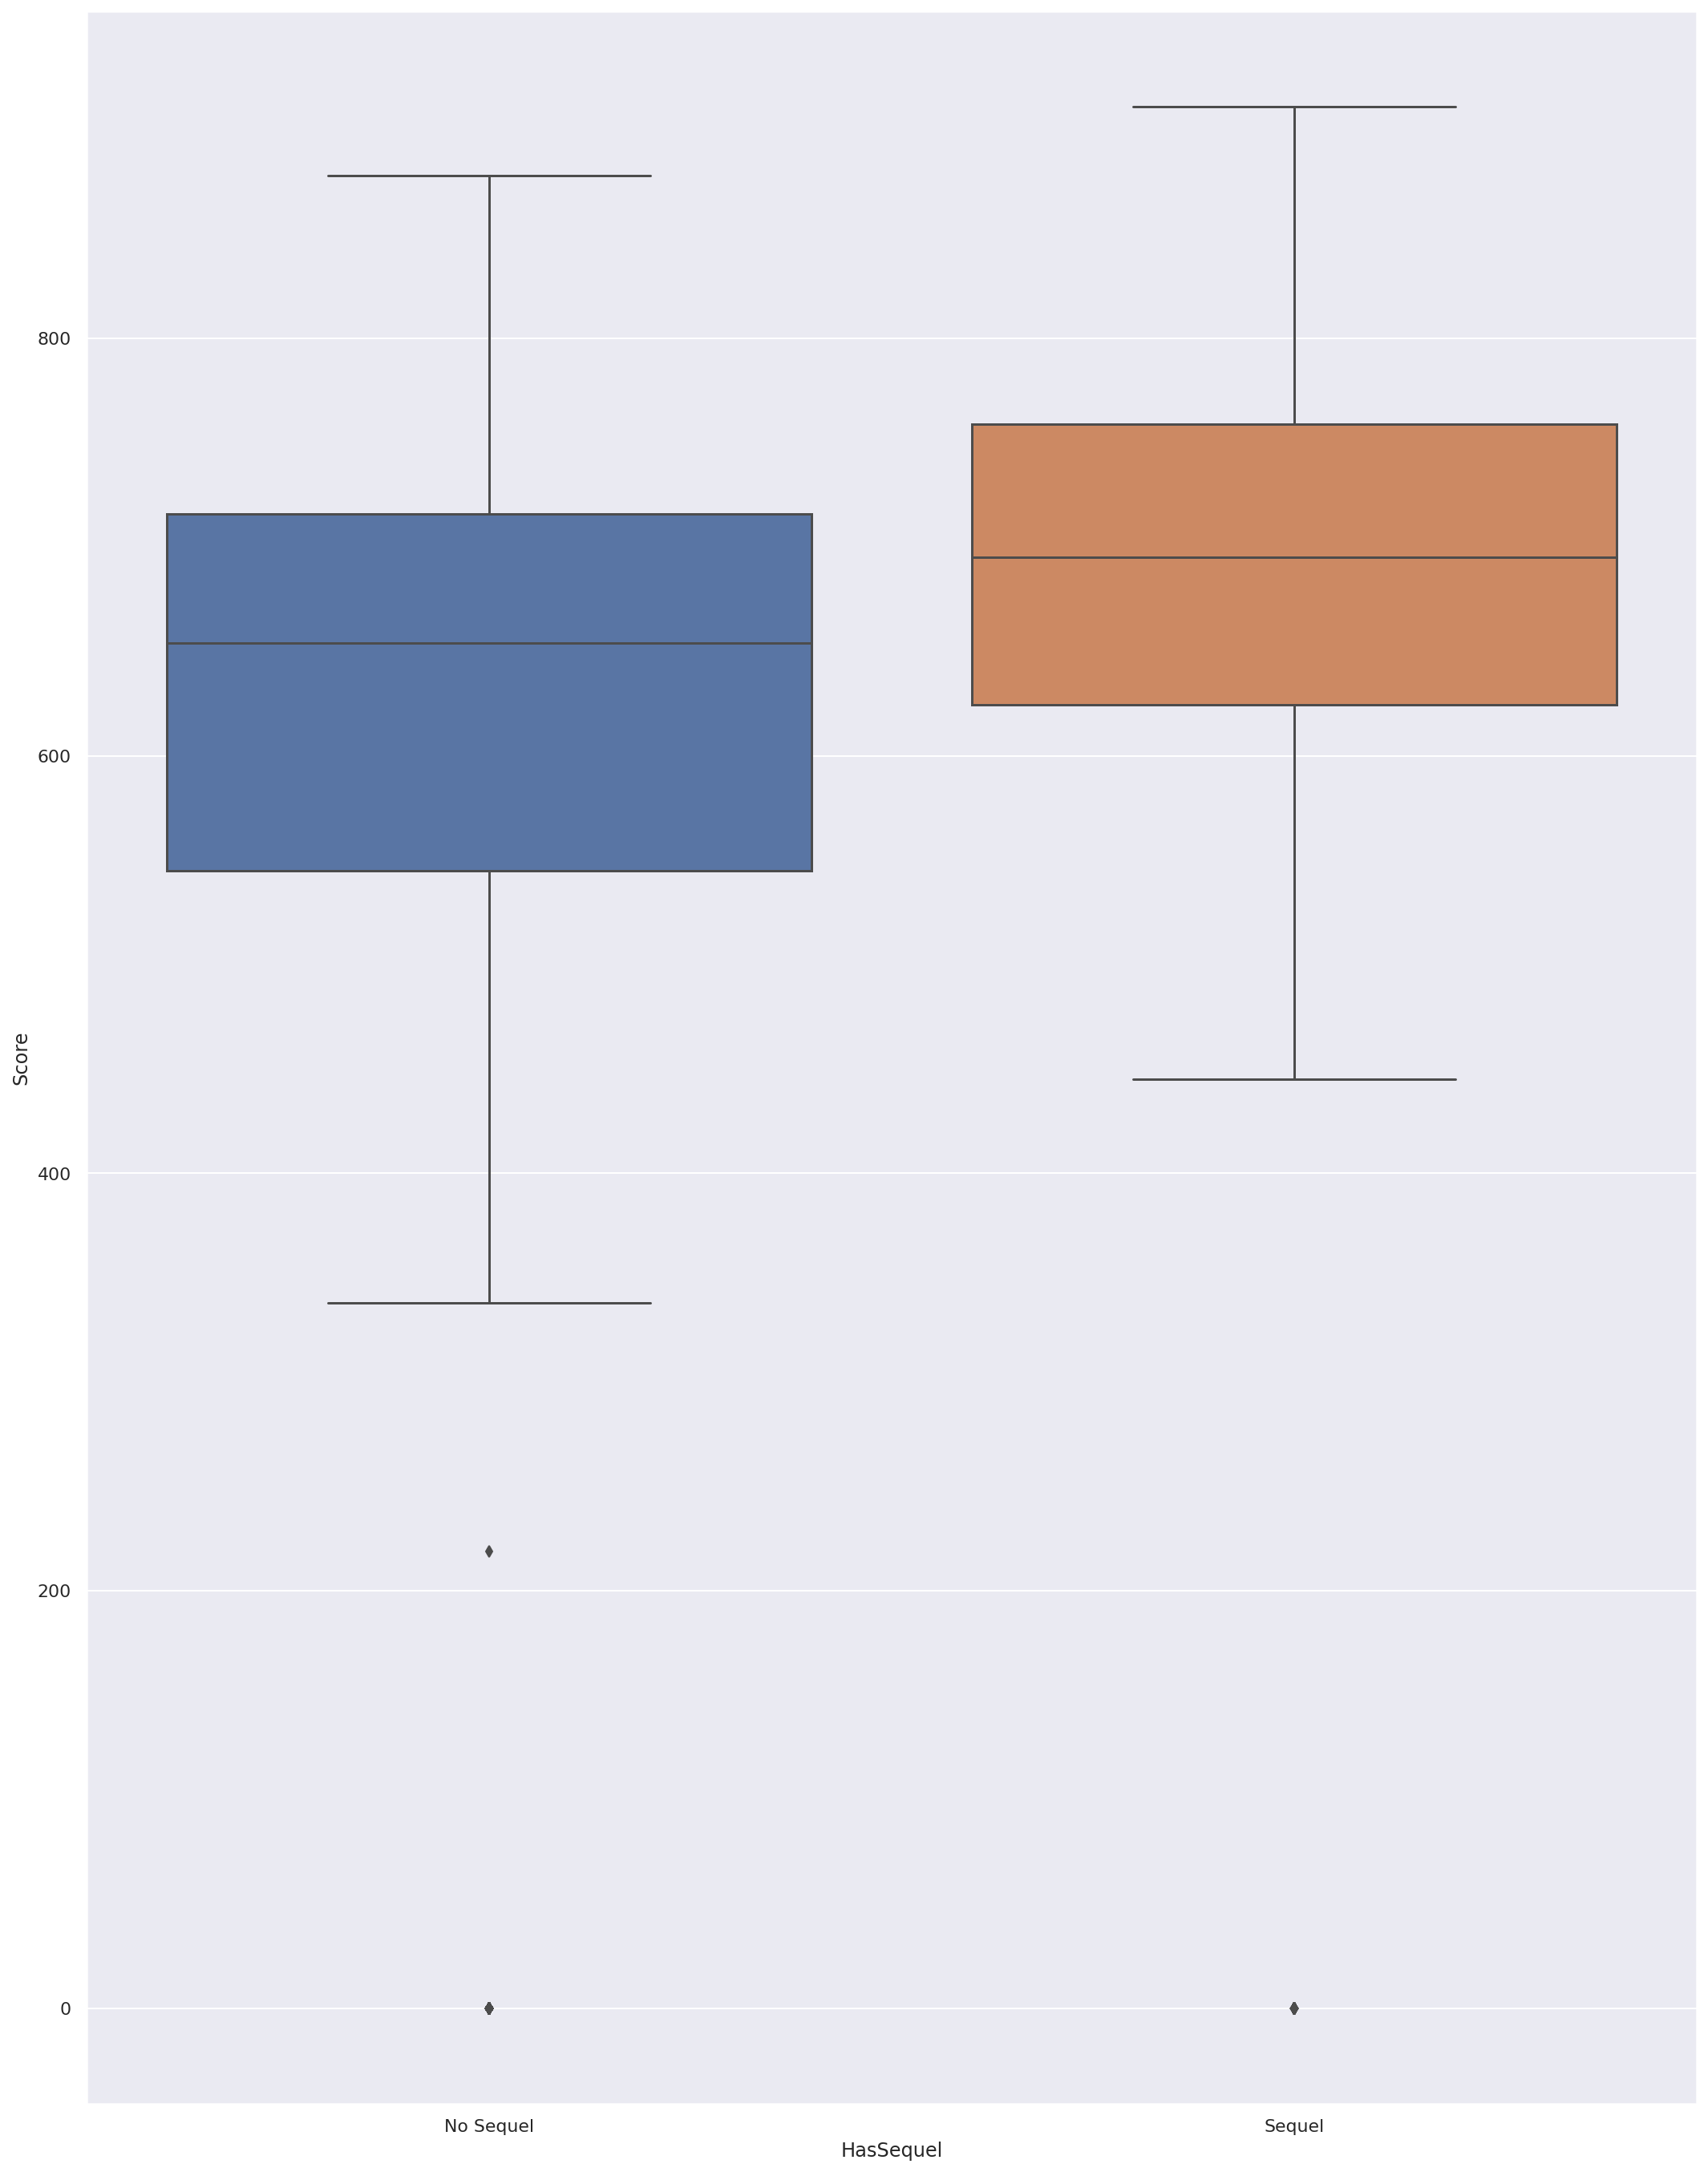

In [26]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Score', data = animedata, ax = axes)

## We can tell from the figure above that animes with sequels tend to have better scores with users. This is due to the box and whisker plots being narrower and being positioned closer to the max score. It also has a lower Q1 score and a higher mean score.



<AxesSubplot:xlabel='HasSequel', ylabel='Members'>

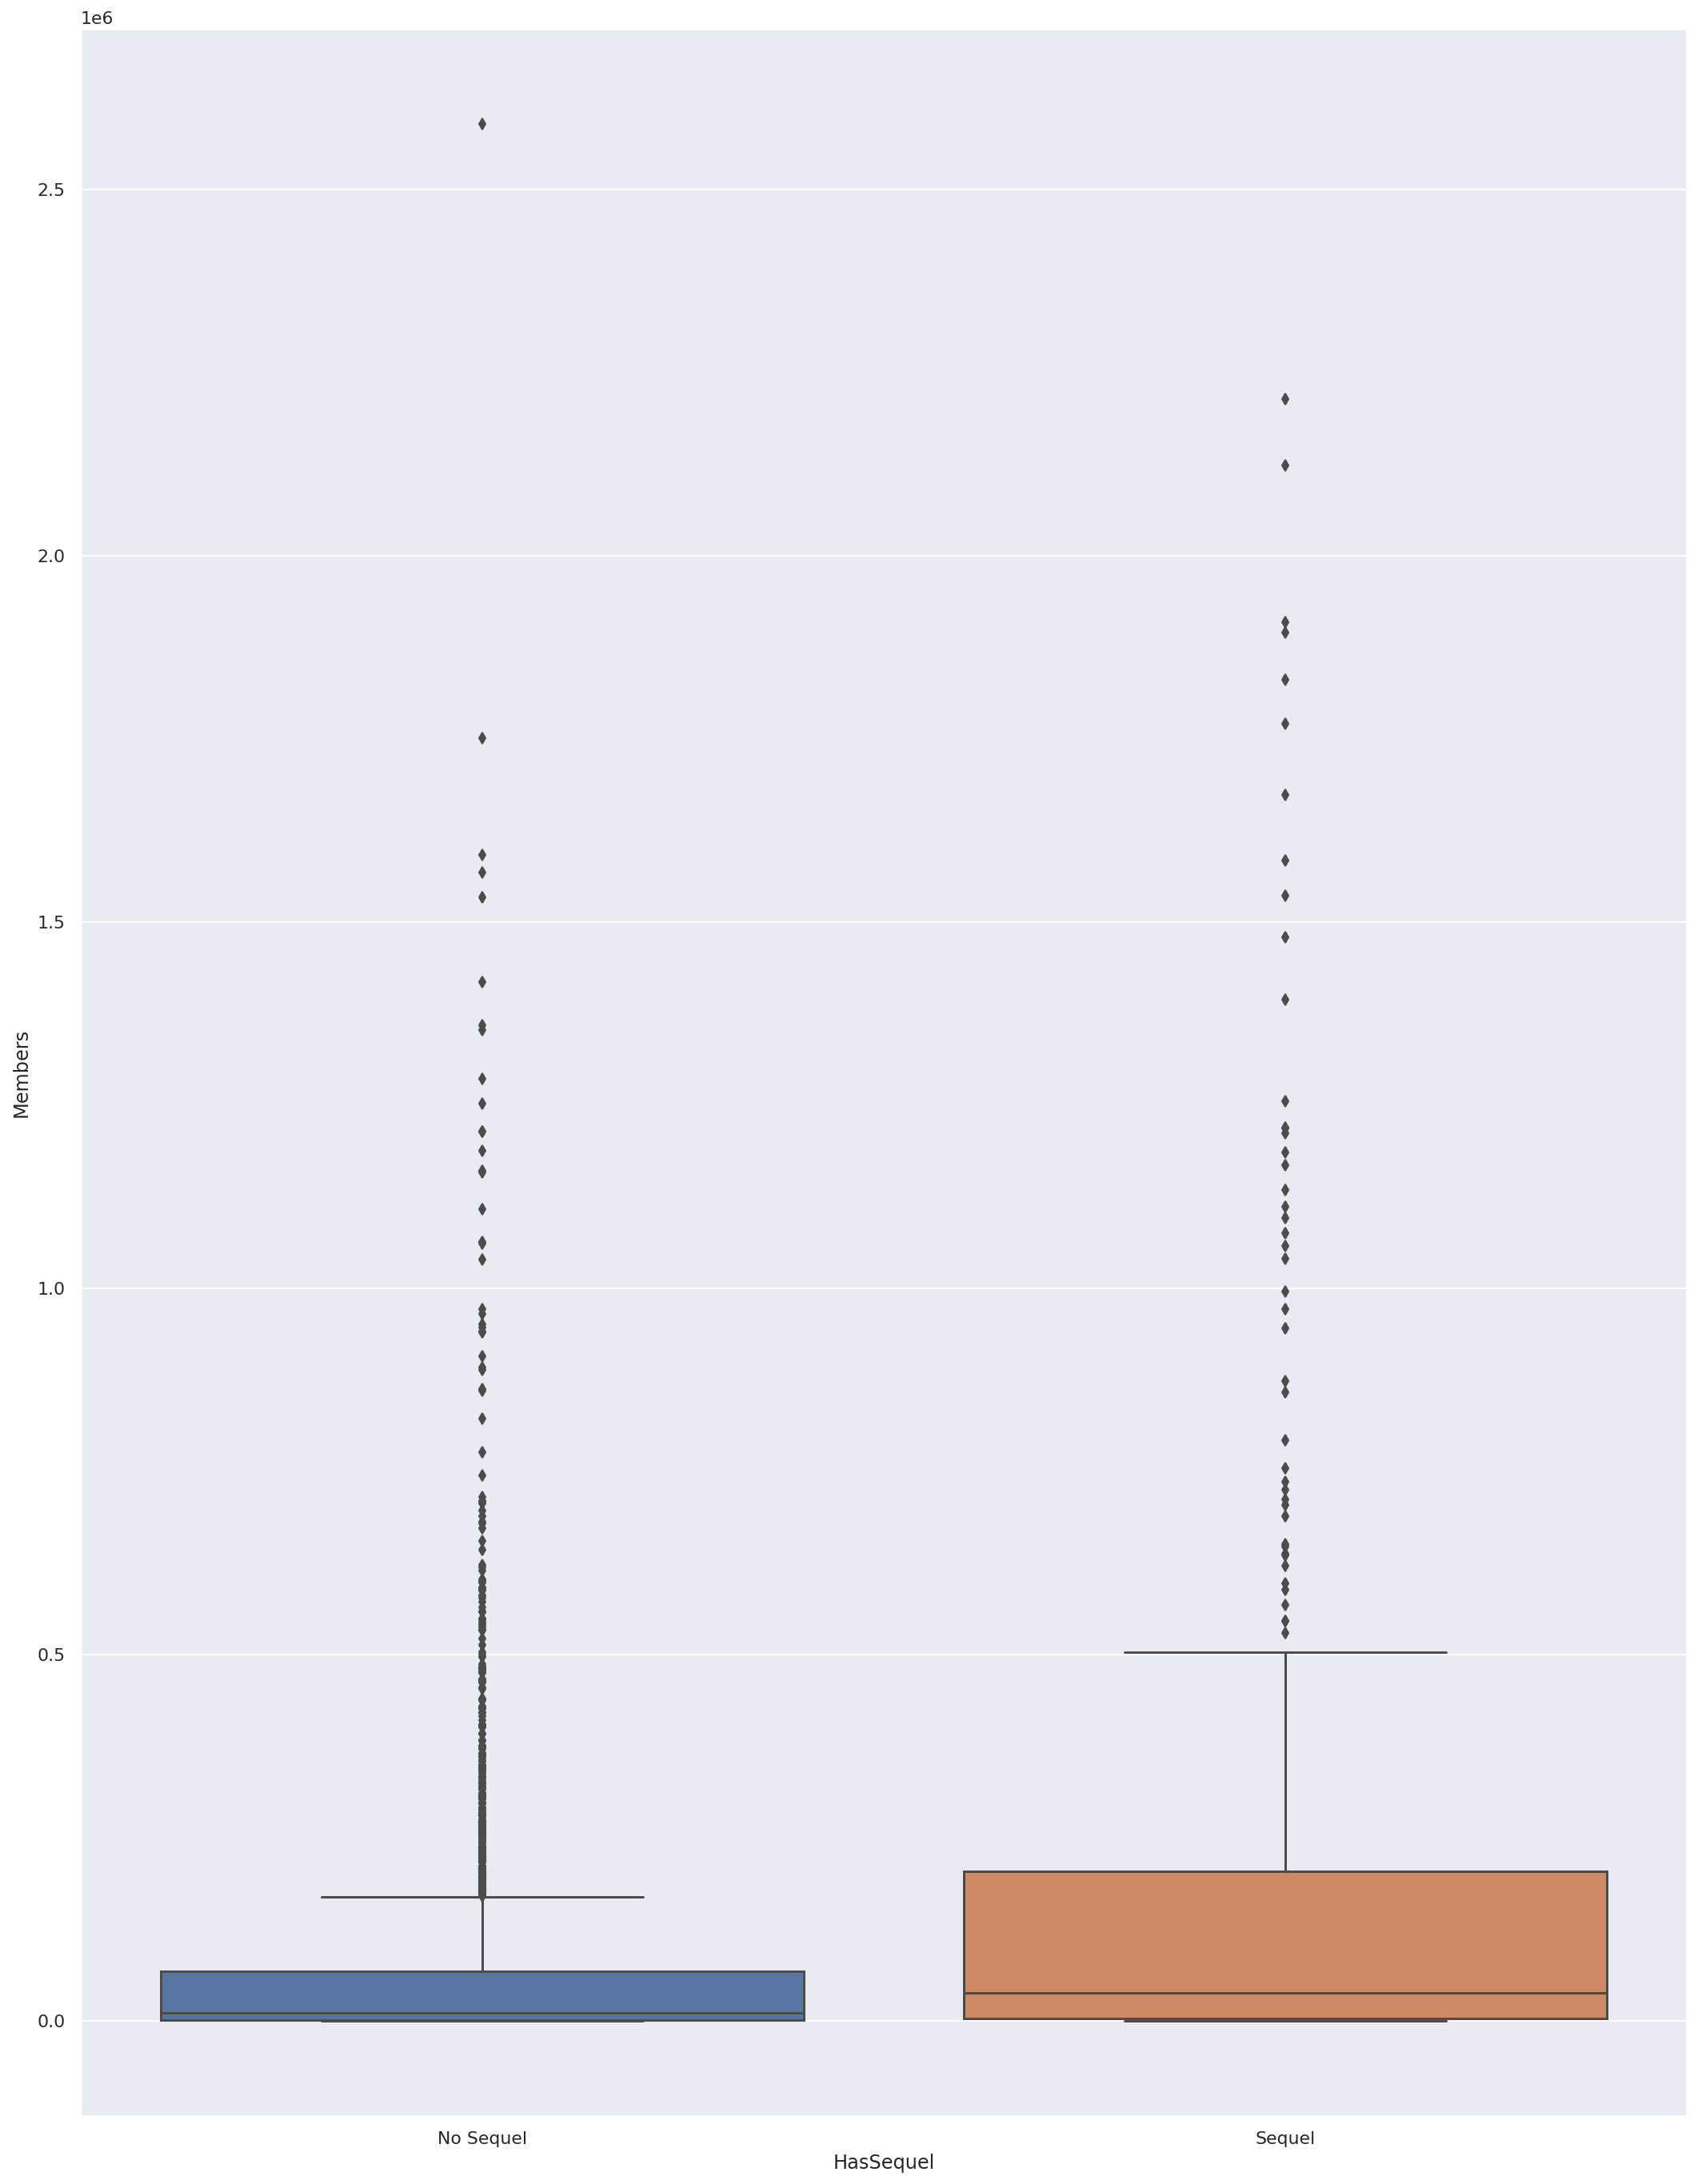

In [27]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Members', data = animedata, ax = axes)

### We can tell that animes with sequels also have more members, showing the retention rate that sequels bring with them. The data above is represented by 10^6.



In [28]:
#f, axes = plt.subplots(1, 1, figsize=(18, 24))
#sb.boxplot(x = 'HasSequel', y = 'Popularity', data = animedata, ax = axes)

In [29]:
#animedata["SourceEncoded"].value_counts()
#sb.catplot(y = 'Source', hue='HasSequel', data = animedata, kind = 'count', height = 20)

<AxesSubplot:xlabel='HasSequel', ylabel='Favorites'>

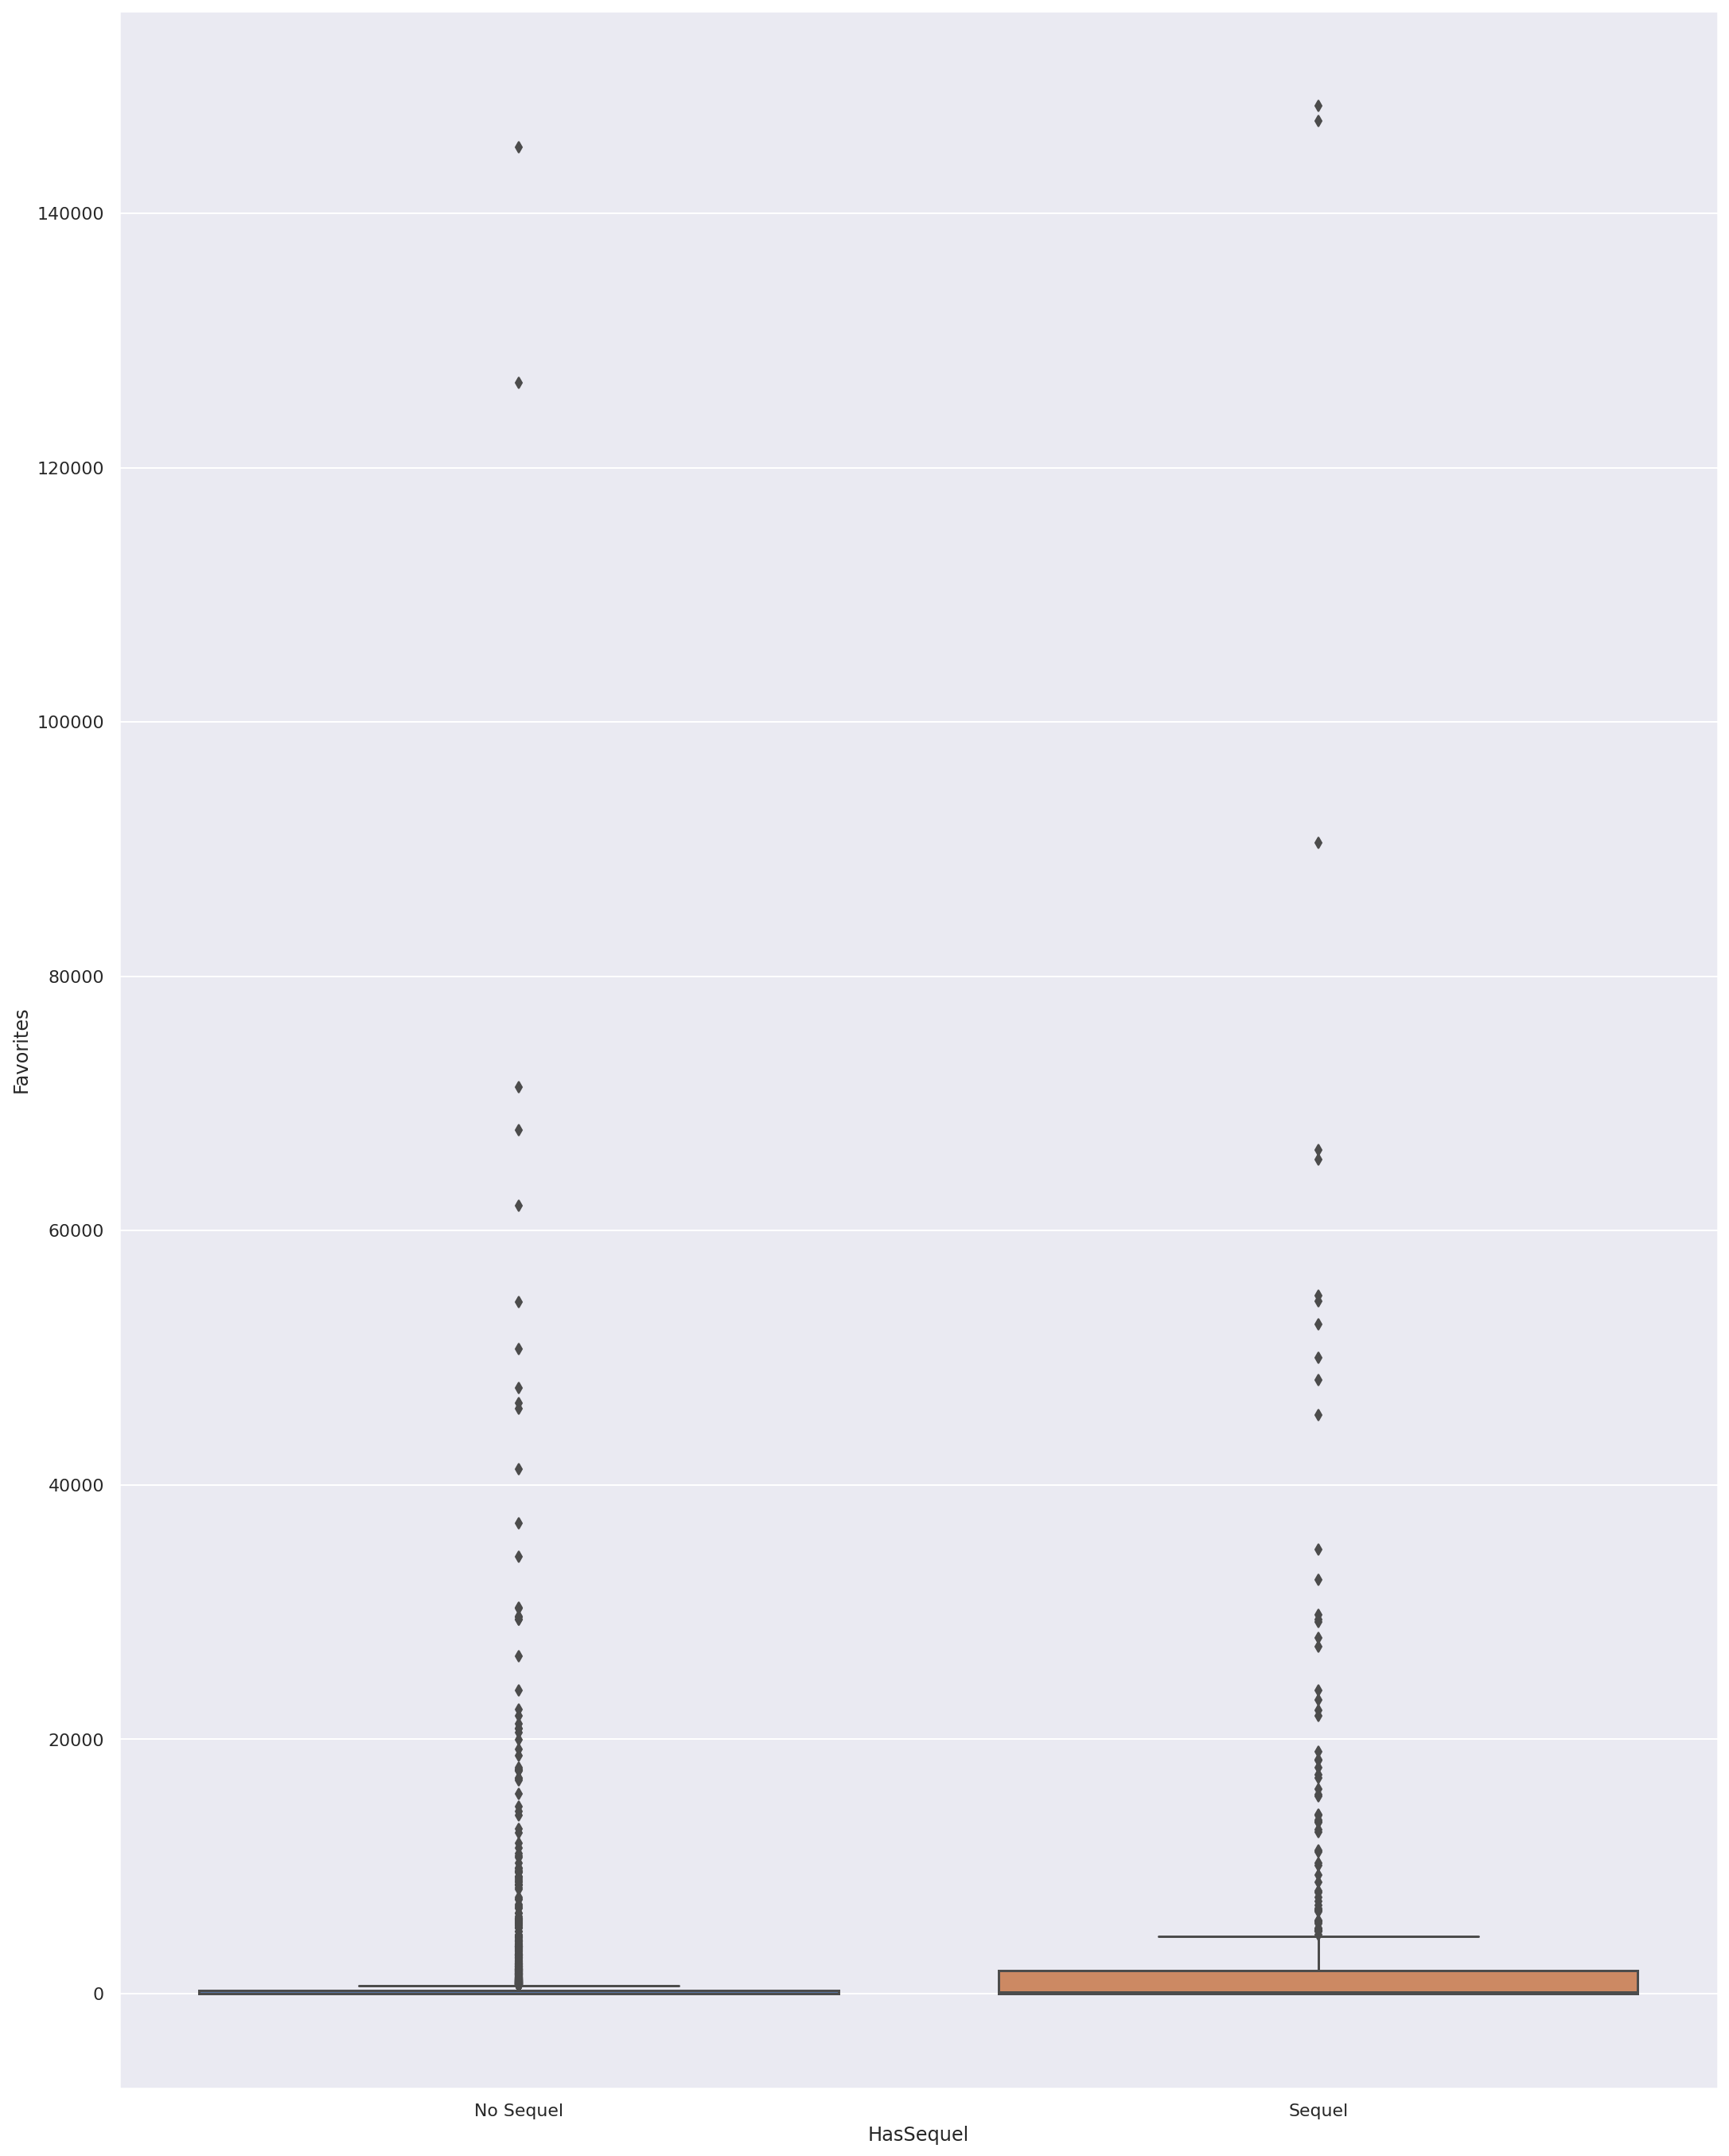

In [30]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Favorites', data = animedata, ax = axes)

<AxesSubplot:xlabel='HasSequel', ylabel='Ranked'>

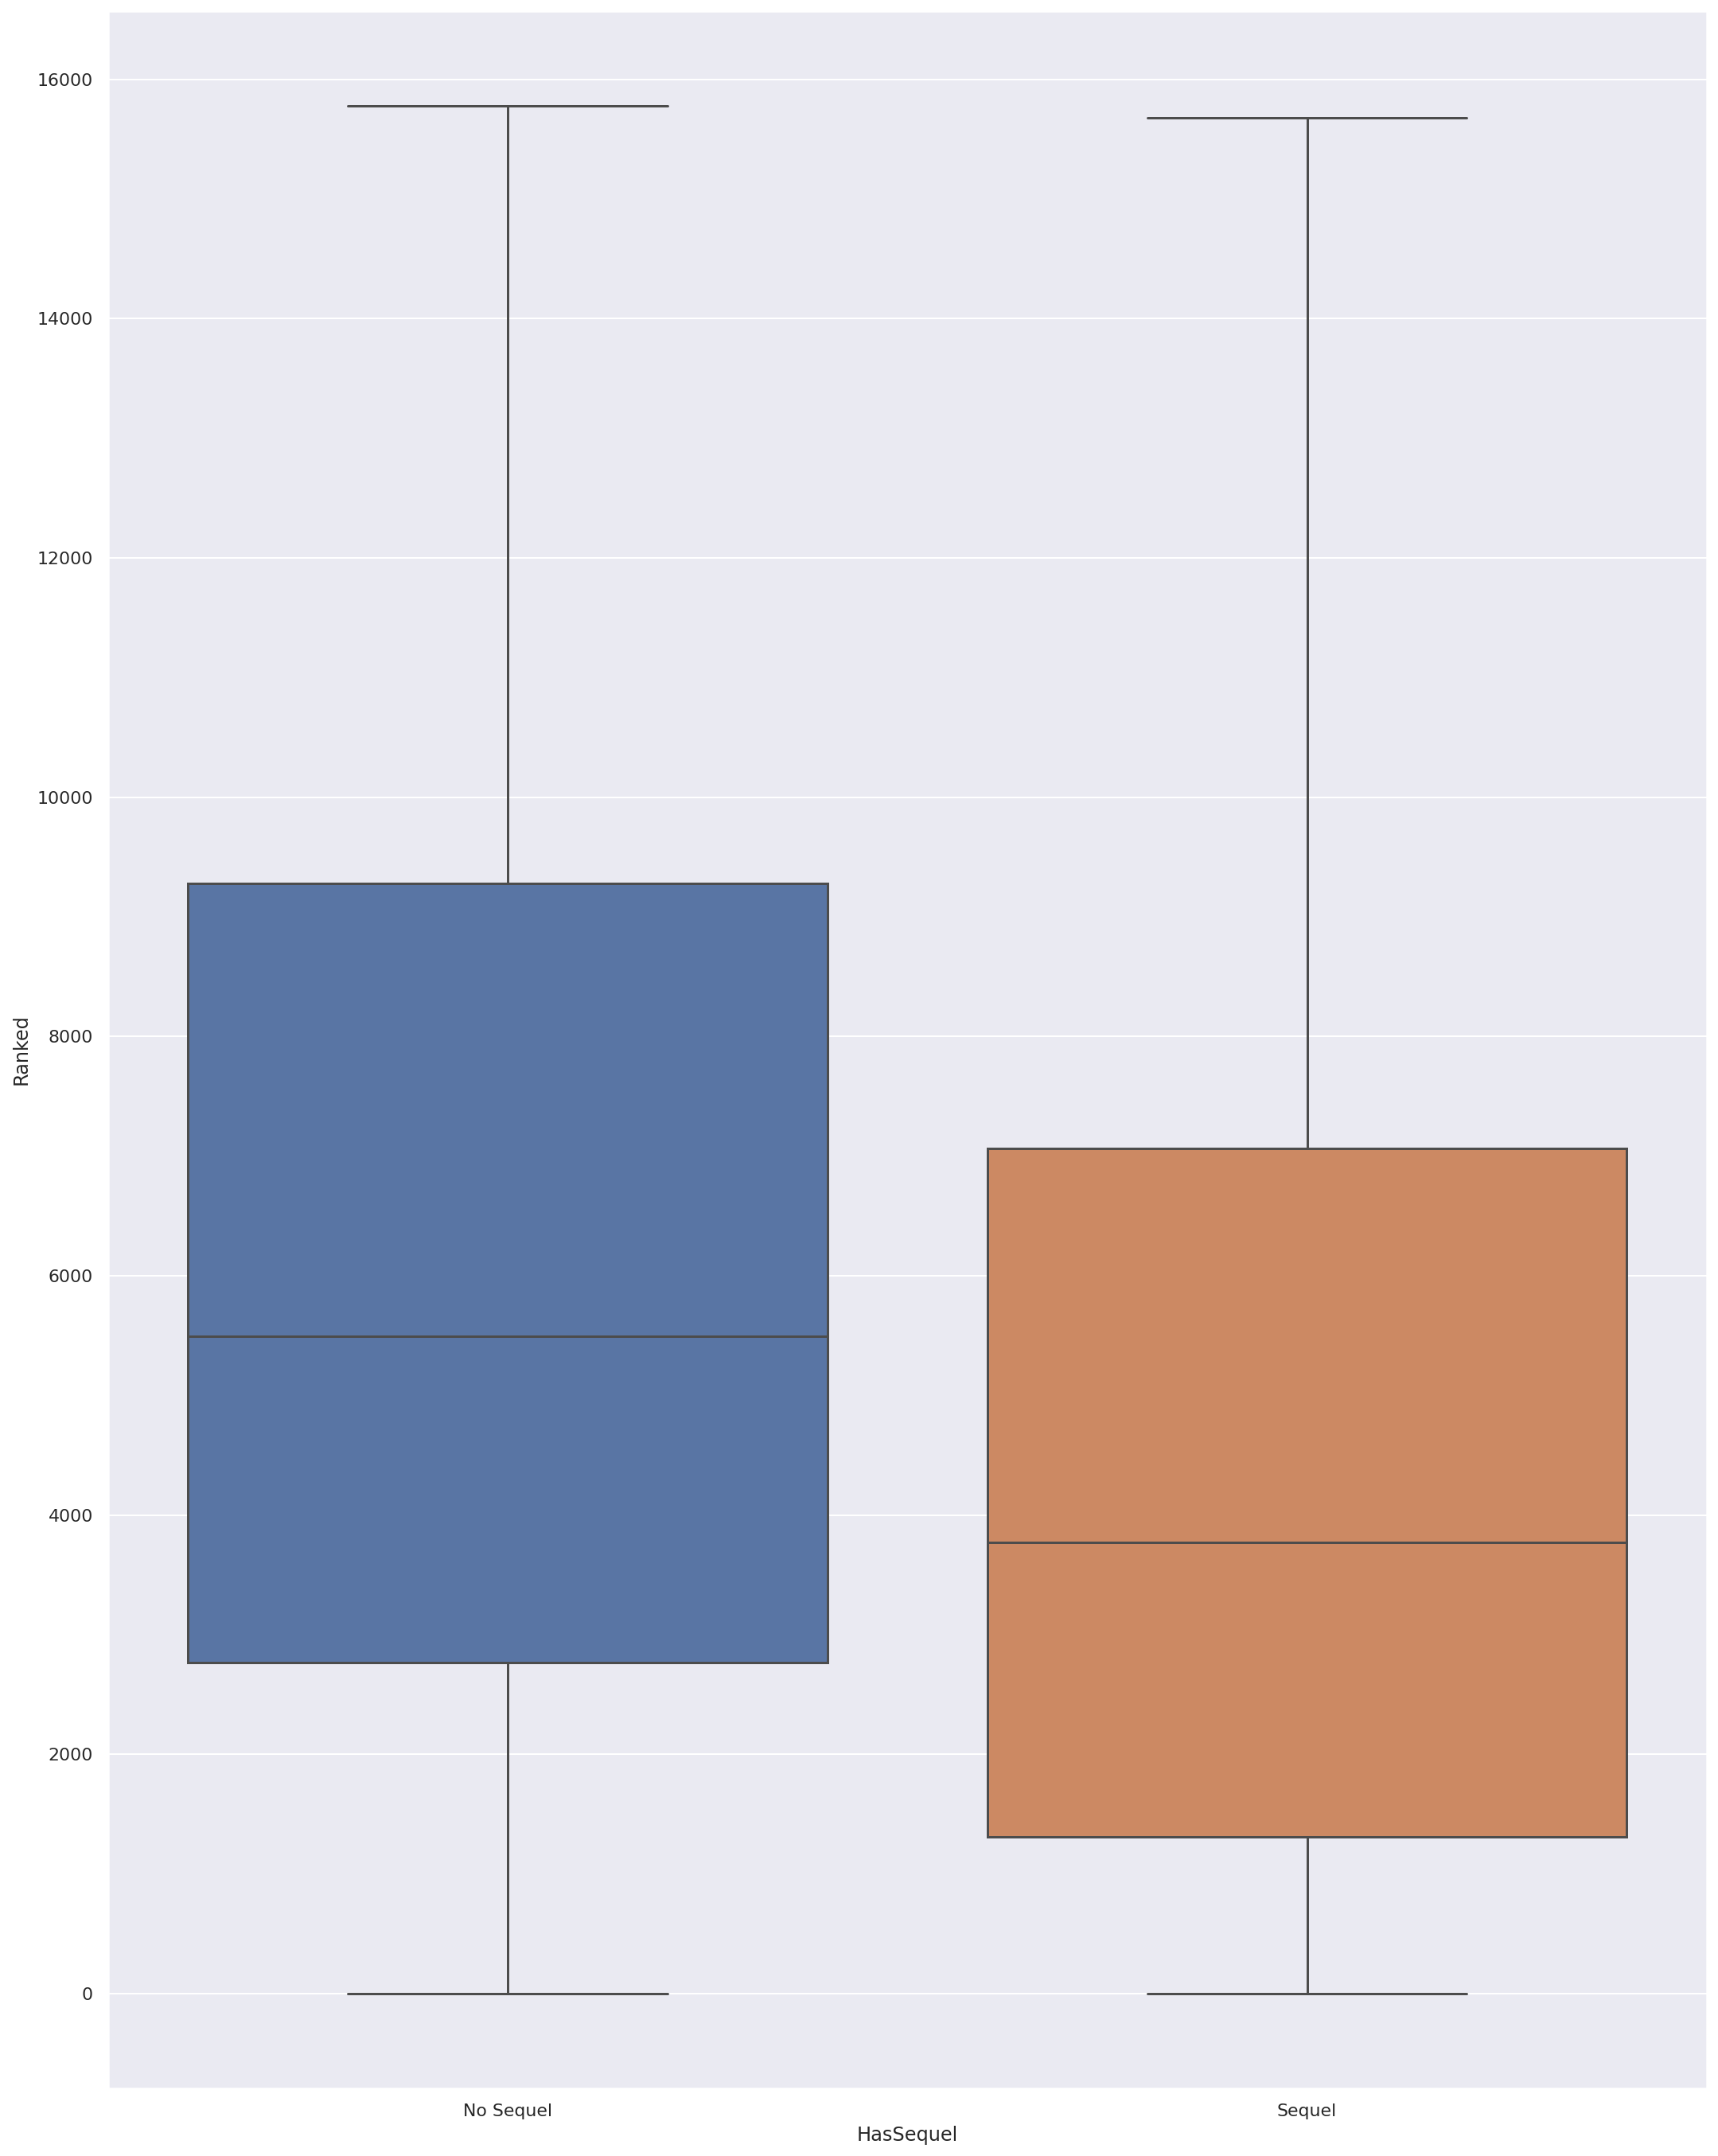

In [31]:
def haha(x):
    result = 0;
    try:
        result = float(x)
    except:
        result = 0
    return math.ceil(result)
animedata["Ranked"] = animedata["Ranked"].apply(haha)
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Ranked', data = animedata, ax = axes)

In [32]:
#f, axes = plt.subplots(1, 1, figsize=(18, 24))
#sb.boxplot(x = 'HasSequel', y = 'Dropped', data = animedata, ax = axes)

## Let's try to remove some outliers, namely for Members & Favourites

In [33]:
def RemoveOutliers(data, col1, col2):
    dataQ1 = data[col1].quantile(0.25)
    dataQ3 = data[col1].quantile(0.75)

    data2Q1 = data[col2].quantile(0.25)
    data2Q3 = data[col2].quantile(0.75)


    ''' Detection '''
    dataIQR = dataQ3 - dataQ1
    data2IQR = data2Q3 - data2Q1

    print("Old Shape: ", data.shape)

    # Upper bound
    data1upper = np.where(data[col1] >= (dataQ3+1.5*dataIQR))
    # Lower bound
    data1lower = np.where(data[col1] <= (dataQ1-1.5*dataIQR))

    # Upper bound
    data2upper = np.where(data[col2] >= (data2Q3+1.5*data2IQR))
    # Lower bound
    data2lower = np.where(data[col2] <= (data2Q1-1.5*data2IQR))

    #Get intersection of both column outliers
    dataupper = np.intersect1d(data1upper[0], data2upper[0])
    datalower = np.intersect1d(data1lower[0], data2lower[0])

    #dataupper = pd.merge(data1upperDF, data2upperDF, how='inner')
    #datalower = pd.merge(data1lowerDF, data2lowerDF, how='inner')

    ''' Removing the Outliers '''
    data = data.drop(dataupper, inplace = False, errors='ignore')
    data = data.drop(datalower, inplace = False, errors='ignore')


    print("New Shape: ", data.shape)
    return data

In [34]:
animedata_noOutliers = RemoveOutliers(animedata, "Members", "Favorites")
print("Anime Shape: ", animedata.shape)
print("Anime Copy Shape: ", animedata_noOutliers.shape)
#RemoveOutliers(animedata, "Members", "Favorites")

Old Shape:  (2810, 54)
New Shape:  (2484, 54)
Anime Shape:  (2810, 54)
Anime Copy Shape:  (2484, 54)


<AxesSubplot:xlabel='HasSequel', ylabel='Members'>

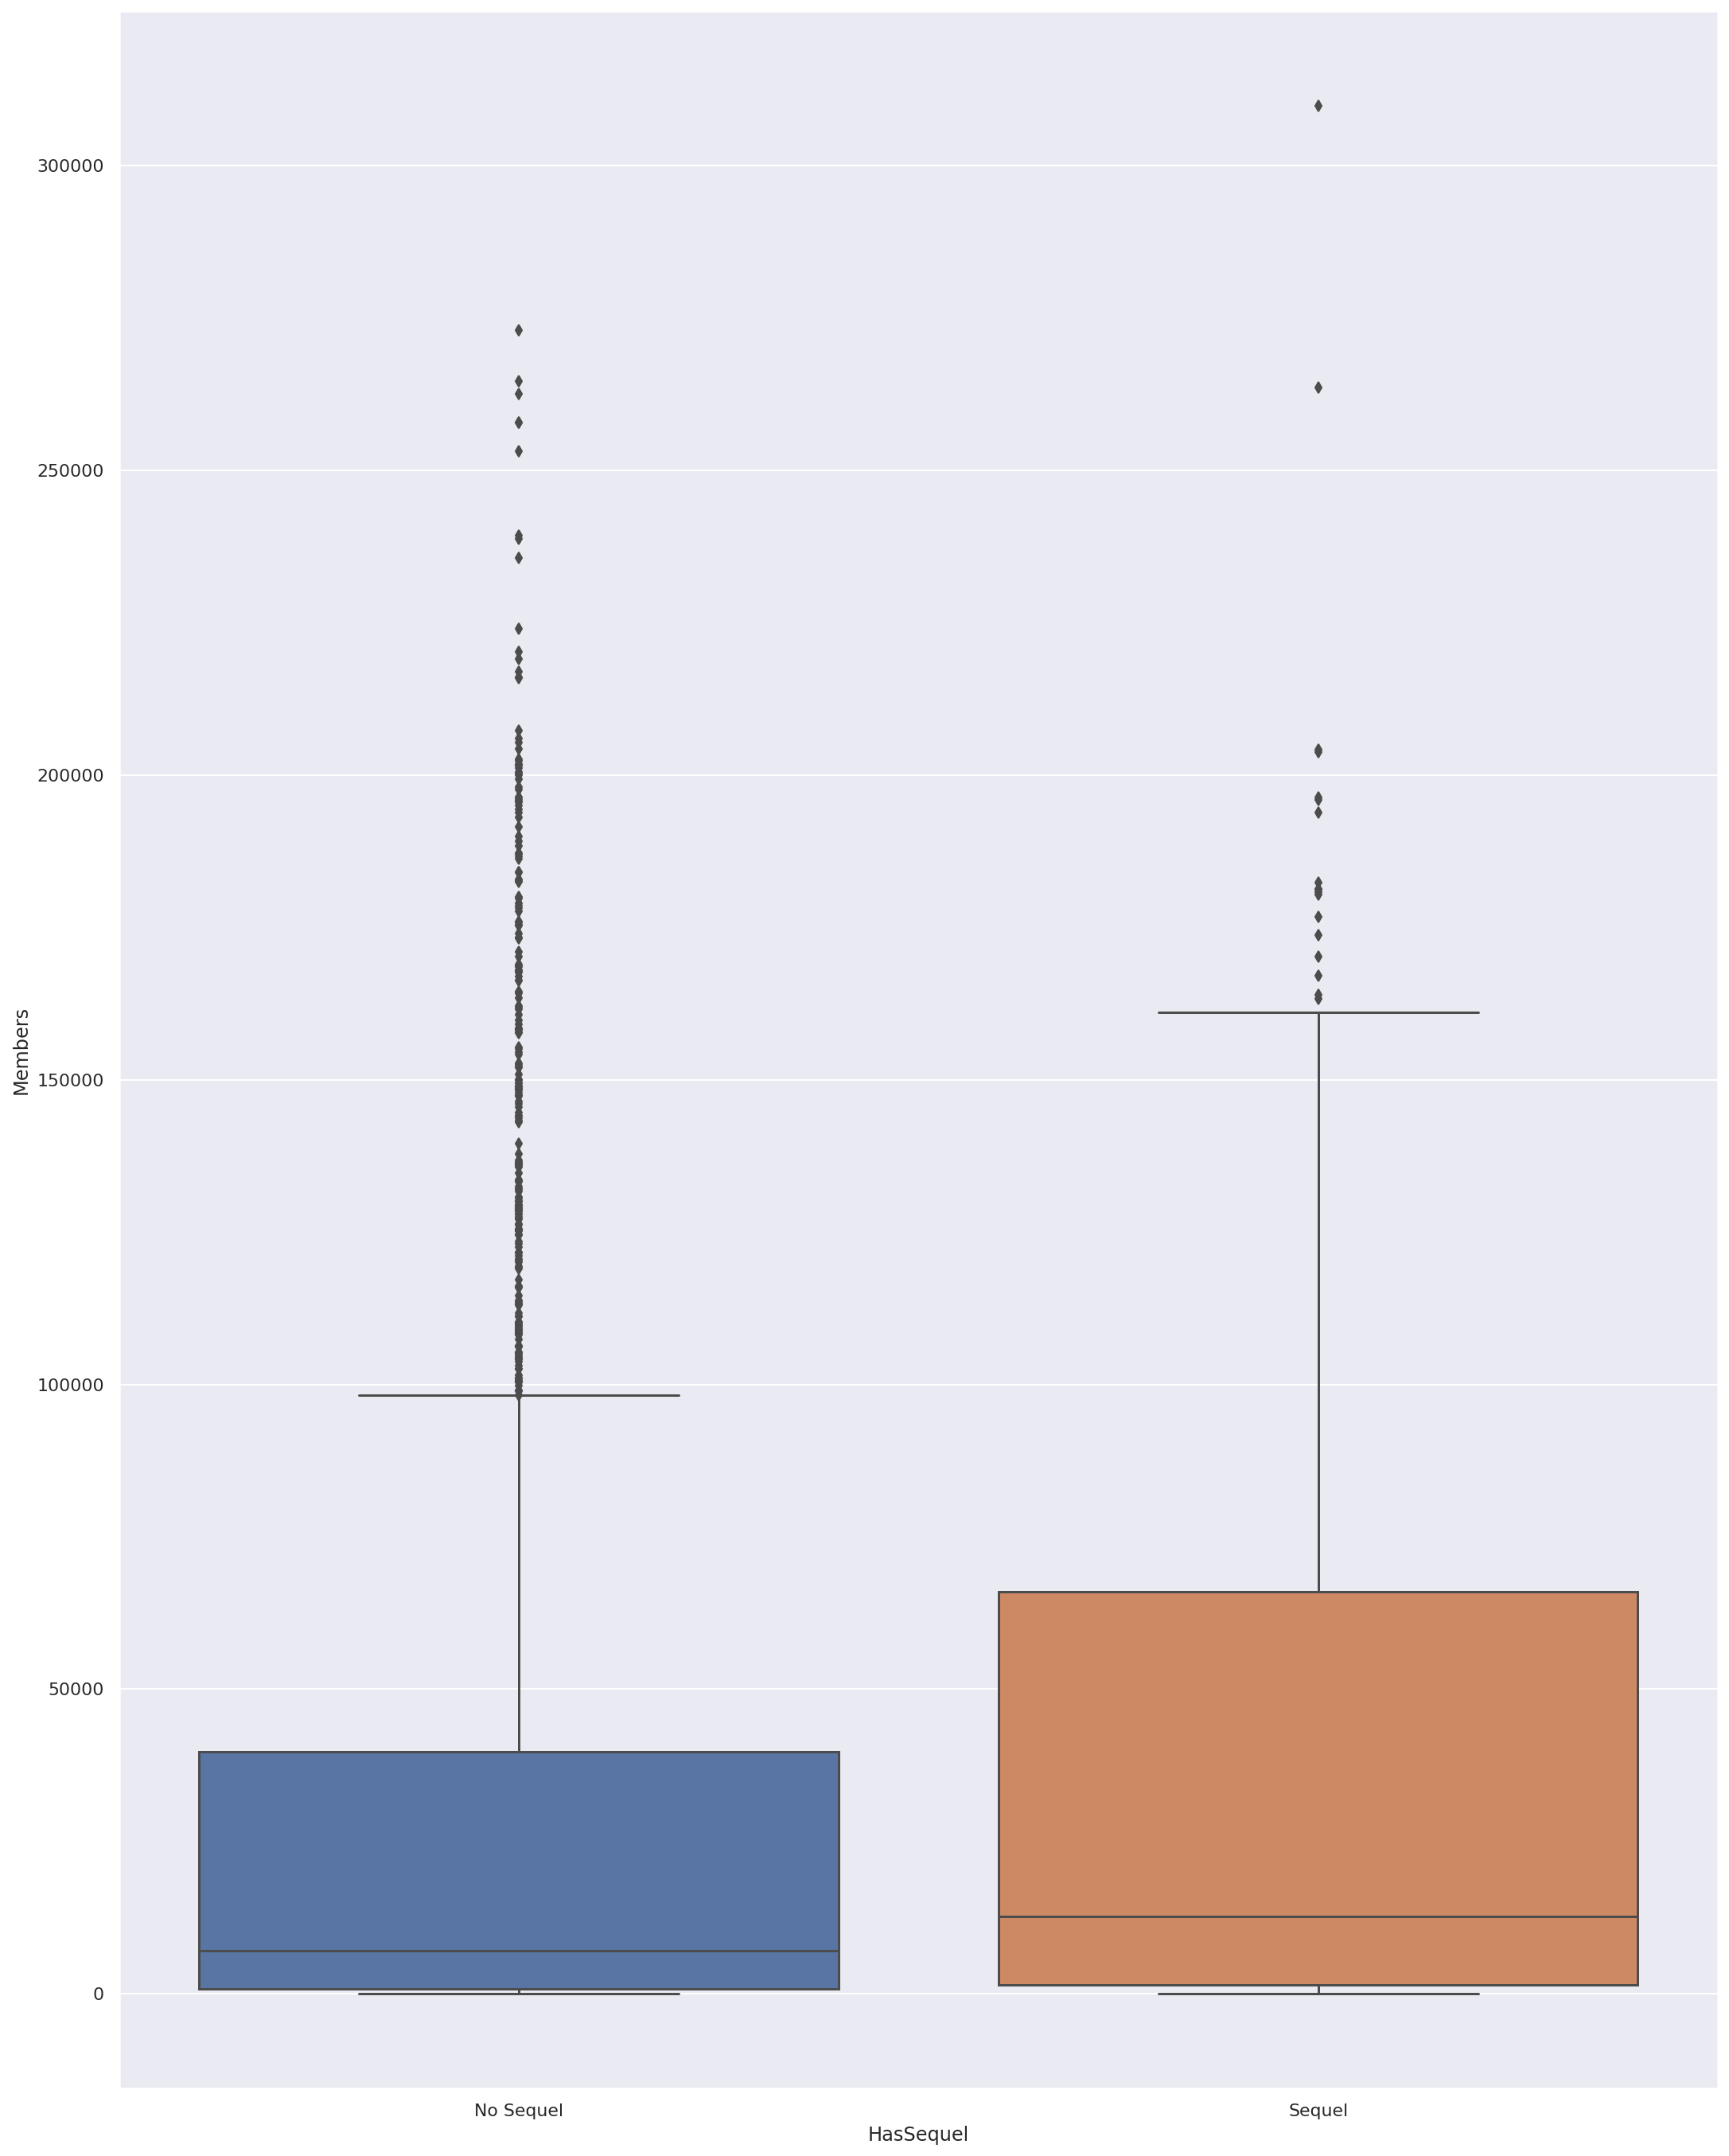

In [35]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Members', data = animedata_noOutliers, ax = axes)

<AxesSubplot:xlabel='HasSequel', ylabel='Favorites'>

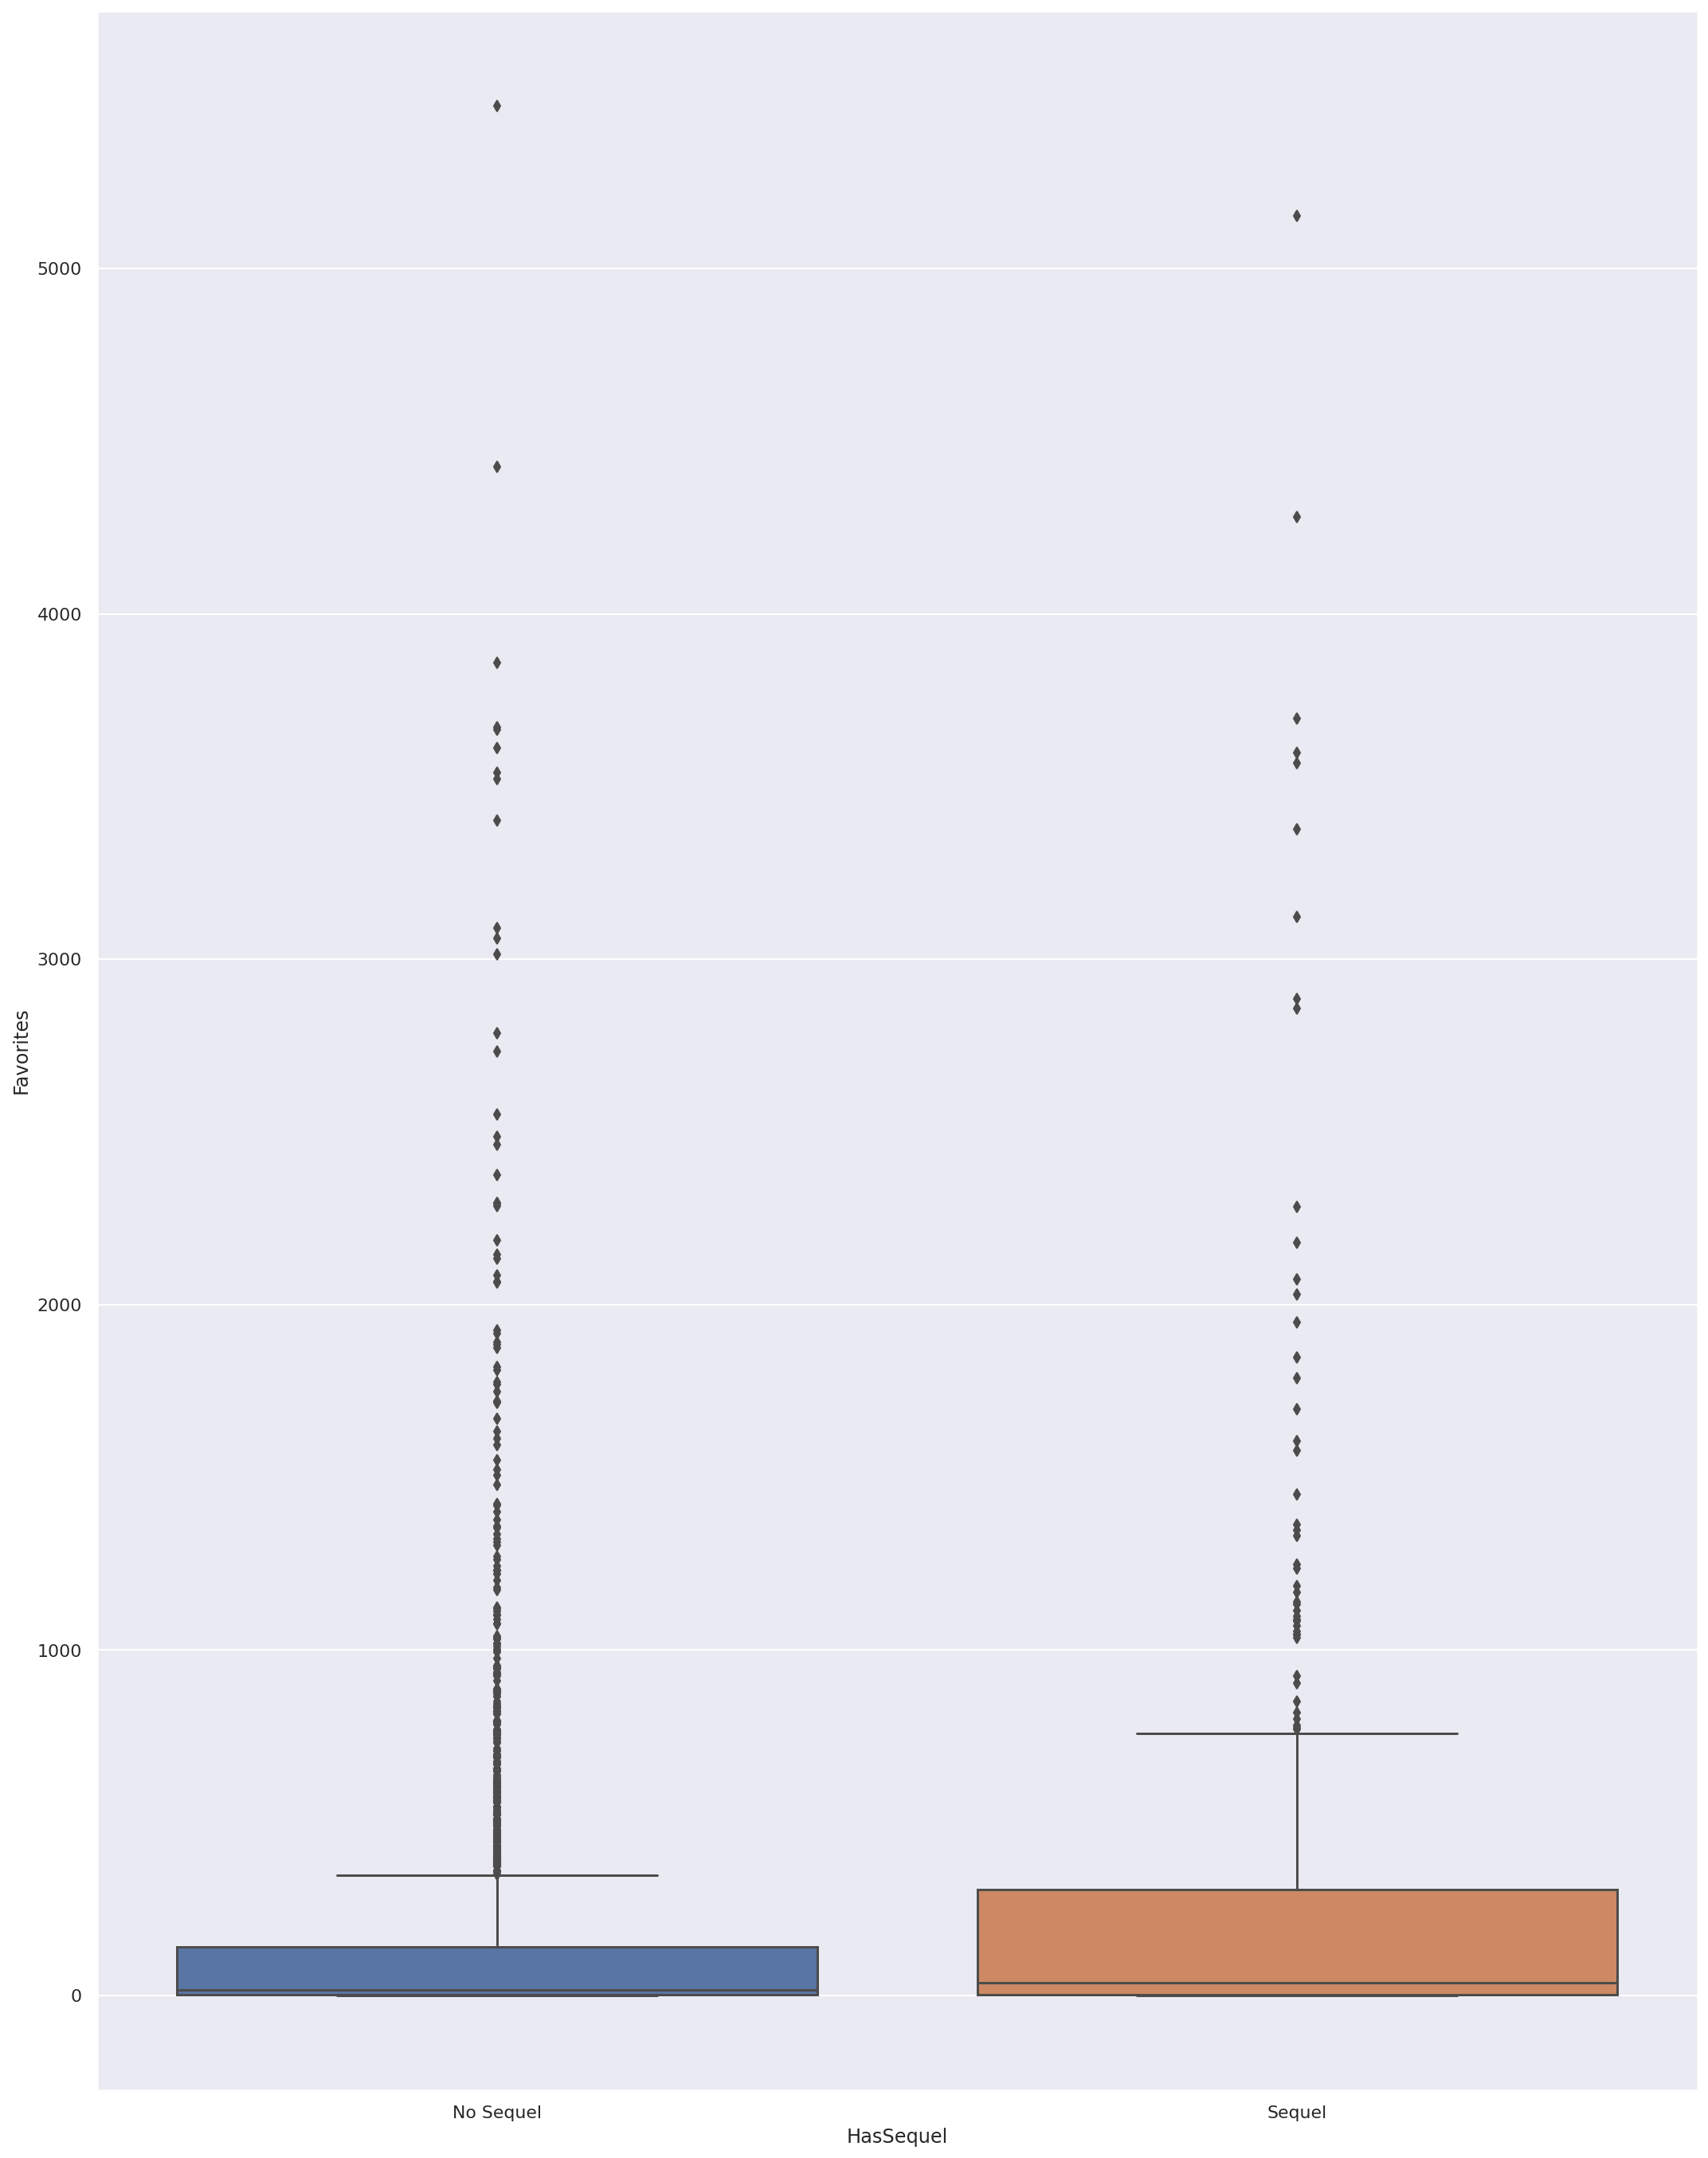

In [36]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Favorites', data = animedata_noOutliers, ax = axes)

# Machine Learning



In [37]:
hassequel = animedata[animedata['HasSequel'].str.contains("No Sequel", case=False) == False]
animedata = animedata.drop(animedata[animedata.HasSequel == 'Sequel'].index)
animedata.head(n=-1)

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
0,0,1,Cowboy Bebop,878,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",...,0,0,0,1,0,0,0,0,0,0
1,2,6,Trigun,824,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",...,1,0,0,0,0,0,0,0,0,0
2,3,7,Witch Hunter Robin,727,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",...,0,0,0,1,0,0,0,0,0,0
4,5,15,Eyeshield 21,795,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",...,1,0,0,0,0,0,0,0,0,0
6,7,17,Hungry Heart: Wild Striker,759,"Slice of Life, Comedy, Sports, Shounen",Unknown,ハングリーハート Wild Striker,TV,52,"Sep 11, 2002 to Sep 10, 2003",...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,17561,48492,Scarlet Nexus,0,"Action, Fantasy",Unknown,SCARLET NEXUS,TV,Unknown,"Jul, 2021 to ?",...,0,0,0,0,0,0,0,0,0,0
2805,265,289,Comic Party,659,"Comedy, Drama",Comic Party,こみっくパーティー,TV,13,"Apr 2, 2001 to Jun 25, 2001",...,0,0,0,0,0,0,0,0,1,0
2806,651,706,Comic Party Revolution,652,"Comedy, Drama",Unknown,こみっくパーティー Revolution,TV,13,"Apr 4, 2005 to Jun 27, 2005",...,0,0,0,0,0,0,0,0,1,0
2807,3759,4657,Arad Senki: Slap Up Party,675,"Action, Adventure, Comedy, Fantasy",Unknown,アラド戦記 ～スラップアップパーティー～,TV,26,"Apr 4, 2009 to Sep 26, 2009",...,0,0,0,0,0,0,0,0,0,0


In [38]:
hassequel.head(n=-1)

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
3,4,8,Bouken Ou Beet,698,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,1,0,0,0,0,0,0,0,0,0
5,6,16,Hachimitsu to Clover,806,"Comedy, Drama, Josei, Romance, Slice of Life",Honey and Clover,ハチミツとクローバー,TV,24,"Apr 15, 2005 to Sep 27, 2005",...,1,0,0,0,0,0,0,0,0,0
8,10,20,Naruto,791,"Action, Adventure, Comedy, Super Power, Martia...",Naruto,ナルト,TV,220,"Oct 3, 2002 to Feb 8, 2007",...,1,0,0,0,0,0,0,0,0,0
10,12,22,Tennis no Ouji-sama,790,"Action, Comedy, Sports, School, Shounen",The Prince of Tennis,テニスの王子様,TV,178,"Oct 10, 2001 to Mar 23, 2005",...,1,0,0,0,0,0,0,0,0,0
11,14,24,School Rumble,794,"Comedy, Romance, School, Shounen",School Rumble,スクールランブル,TV,26,"Oct 5, 2004 to Mar 29, 2005",...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,16255,40608,Muv-Luv Alternative,0,"Action, Military, Sci-Fi, Drama, Mecha",Unknown,マブラヴ オルタネイティヴ,TV,Unknown,"Oct, 2021 to ?",...,0,0,0,0,0,0,0,0,1,0
2705,16434,40911,Yuukoku no Moriarty,797,"Mystery, Historical, Psychological, Shounen",Moriarty the Patriot,憂国のモリアーティ,TV,11,"Oct 11, 2020 to Dec 20, 2020",...,1,0,0,0,0,0,0,0,0,0
2709,16452,40953,Lalalacoco,0,"Slice of Life, Comedy, Kids",Unknown,LALALACOCO,TV,13,"Jan 7, 2020 to Mar 31, 2020",...,0,0,0,0,1,0,0,0,0,0
2726,16625,41380,100-man no Inochi no Ue ni Ore wa Tatteiru,645,"Action, Game, Drama, Fantasy, Shounen","I'm standing on 1,000,000 lives.",100万の命の上に俺は立っている,TV,12,"Oct 2, 2020 to Dec 18, 2020",...,1,0,0,0,0,0,0,0,0,0


In [39]:
animedata = animedata.sample(frac =.2)
animedata.head(n=-1)

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
325,769,852,Gokinjo Monogatari,747,"Slice of Life, Comedy, Drama, Romance, Shoujo",Neighborhood Stories,ご近所物語,TV,50,"Sep 10, 1995 to Sep 1, 1996",...,1,0,0,0,0,0,0,0,0,0
2697,16359,40783,"Shachou, Battle no Jikan Desu!",587,"Action, Adventure, Fantasy","Shachibato! President, It's Time for Battle!","社長, バトルの時間です!",TV,12,"Apr 5, 2020 to Jun 28, 2020",...,0,0,0,0,0,0,0,0,0,0
1708,8148,19815,No Game No Life,820,"Game, Adventure, Comedy, Supernatural, Ecchi, ...","No Game, No Life",ノーゲーム・ノーライフ,TV,12,"Apr 9, 2014 to Jun 25, 2014",...,0,0,0,0,0,0,0,0,0,0
1595,7337,15873,Pyun Pyun Maru,0,"Comedy, Martial Arts",Unknown,ピュンピュン丸,TV,26,"Jul 3, 1967 to Mar 30, 1969",...,0,0,0,0,0,0,0,1,0,0
2735,16659,41456,"Sentouin, Hakenshimasu!",0,"Action, Comedy, Fantasy",Combatants Will Be Dispatched!,戦闘員、派遣します！,TV,Unknown,"Apr, 2021 to ?",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,390,417,Ragnarök The Animation,647,"Action, Magic, Fantasy",Ragnarok the Animation,RAGNARÖK THE ANIMATION,TV,26,"Apr 7, 2004 to Sep 29, 2004",...,0,0,0,0,0,0,0,0,0,0
686,2335,2548,Ai no Wakakusa Monogatari,743,"Drama, Historical, Slice of Life",Tales of Little Women,愛の若草物語,TV,48,"Jan 11, 1987 to Dec 27, 1987",...,0,0,1,0,0,0,0,0,0,0
1424,6242,10506,Shiawase Haitatsu Taneko,0,Comedy,Unknown,しあわせ配達おみくじタネコ,TV,Unknown,"Mar 26, 2011 to ?",...,0,0,0,1,0,0,0,0,0,0
1573,7200,14989,Chousoku Henkei Gyrozetter,642,"Action, Cars, Mecha, Shounen",Unknown,超速変形ジャイロゼッター,TV,51,"Oct 2, 2012 to Sep 24, 2013",...,0,0,0,0,0,0,0,0,0,0


In [40]:
animedata = animedata.append(hassequel)
animedata.head(n=-1)

/tmp/ipykernel_2263/1388735740.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  animedata = animedata.append(hassequel)


,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
325,769,852,Gokinjo Monogatari,747,"Slice of Life, Comedy, Drama, Romance, Shoujo",Neighborhood Stories,ご近所物語,TV,50,"Sep 10, 1995 to Sep 1, 1996",...,1,0,0,0,0,0,0,0,0,0
2697,16359,40783,"Shachou, Battle no Jikan Desu!",587,"Action, Adventure, Fantasy","Shachibato! President, It's Time for Battle!","社長, バトルの時間です!",TV,12,"Apr 5, 2020 to Jun 28, 2020",...,0,0,0,0,0,0,0,0,0,0
1708,8148,19815,No Game No Life,820,"Game, Adventure, Comedy, Supernatural, Ecchi, ...","No Game, No Life",ノーゲーム・ノーライフ,TV,12,"Apr 9, 2014 to Jun 25, 2014",...,0,0,0,0,0,0,0,0,0,0
1595,7337,15873,Pyun Pyun Maru,0,"Comedy, Martial Arts",Unknown,ピュンピュン丸,TV,26,"Jul 3, 1967 to Mar 30, 1969",...,0,0,0,0,0,0,0,1,0,0
2735,16659,41456,"Sentouin, Hakenshimasu!",0,"Action, Comedy, Fantasy",Combatants Will Be Dispatched!,戦闘員、派遣します！,TV,Unknown,"Apr, 2021 to ?",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,16255,40608,Muv-Luv Alternative,0,"Action, Military, Sci-Fi, Drama, Mecha",Unknown,マブラヴ オルタネイティヴ,TV,Unknown,"Oct, 2021 to ?",...,0,0,0,0,0,0,0,0,1,0
2705,16434,40911,Yuukoku no Moriarty,797,"Mystery, Historical, Psychological, Shounen",Moriarty the Patriot,憂国のモリアーティ,TV,11,"Oct 11, 2020 to Dec 20, 2020",...,1,0,0,0,0,0,0,0,0,0
2709,16452,40953,Lalalacoco,0,"Slice of Life, Comedy, Kids",Unknown,LALALACOCO,TV,13,"Jan 7, 2020 to Mar 31, 2020",...,0,0,0,0,1,0,0,0,0,0
2726,16625,41380,100-man no Inochi no Ue ni Ore wa Tatteiru,645,"Action, Game, Drama, Fantasy, Shounen","I'm standing on 1,000,000 lives.",100万の命の上に俺は立っている,TV,12,"Oct 2, 2020 to Dec 18, 2020",...,1,0,0,0,0,0,0,0,0,0


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7726027397260274

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5245901639344263



Accuracy 	Train Dataset
True Positive Rate 	: 59.64912280701754
False Positive Rate 	: 7.216494845360824
Accuracy 	Test Dataset
True Positive Rate 	: 35.051546391752574
False Positive Rate 	: 27.906976744186046
ACCURACY OF THE MODEL:  0.5245901639344263


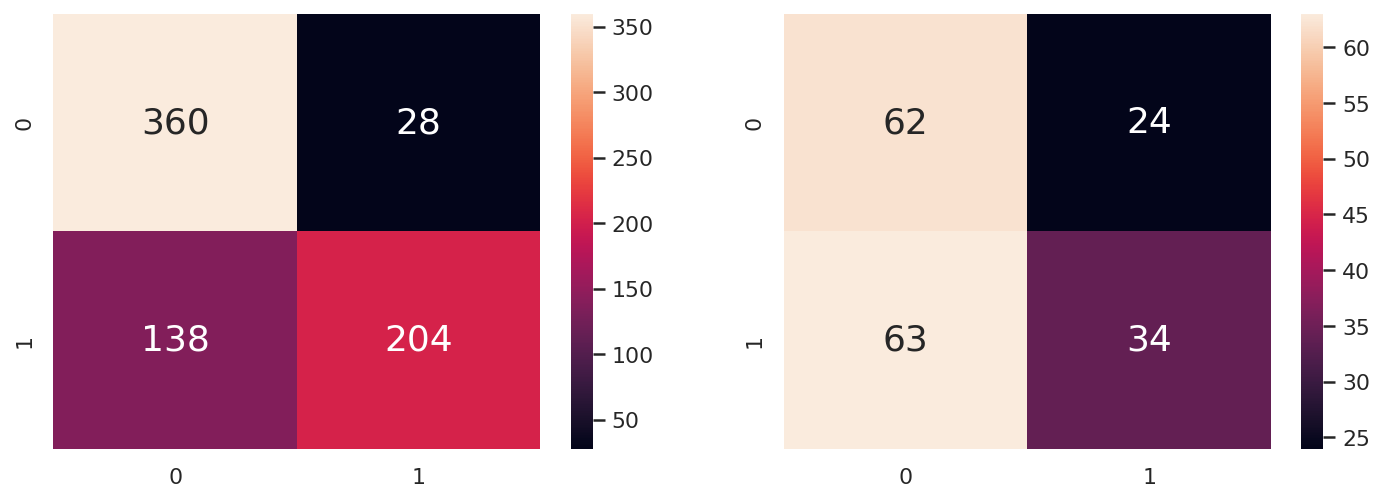

In [41]:
#Import essential models and functions from sklearn
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
SP = pd.DataFrame(animedata[["Score", "Ranked", "Completed"]])  # Predictors

HS = pd.DataFrame(animedata['HasSequel'])    # Response

X_train, X_test, y_train, y_test = train_test_split(SP, HS, test_size = 0.20, train_size = 0.80)
# Check the sample sizes
#print("Train Set :", y_train.shape, X_train.shape)
#print("Test Set  :", y_test.shape, X_test.shape)

# creating a GB classifier
clf = GradientBoostingClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train.values, y_train.values.ravel())

# performing predictions on the test dataset
y_pred = clf.predict(X_test.values)

# metrics are used to find accuracy or error
from sklearn import metrics
#print()

y_train_pred = clf.predict(X_train.values)
y_test_pred = clf.predict(X_test.values)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train.values, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf.score(X_test.values, y_test))
print()

from sklearn.metrics import confusion_matrix

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

cm = metrics.confusion_matrix(y_train, y_train_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTrain Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

cm = metrics.confusion_matrix(y_test, y_test_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTest Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

# using metrics module for accuracy calculation
x = metrics.accuracy_score(y_test, y_pred)

print("ACCURACY OF THE MODEL: ", x)

In [42]:
#y_train["HasSequel"].value_counts()

In [43]:
#y_test["HasSequel"].value_counts()

In [44]:
#y_test.head(n=-1)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5972602739726027

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5737704918032787



Accuracy 	Train Dataset
True Positive Rate 	: 23.36182336182336
False Positive Rate 	: 6.596306068601583
Accuracy 	Test Dataset
True Positive Rate 	: 15.909090909090908
False Positive Rate 	: 4.2105263157894735


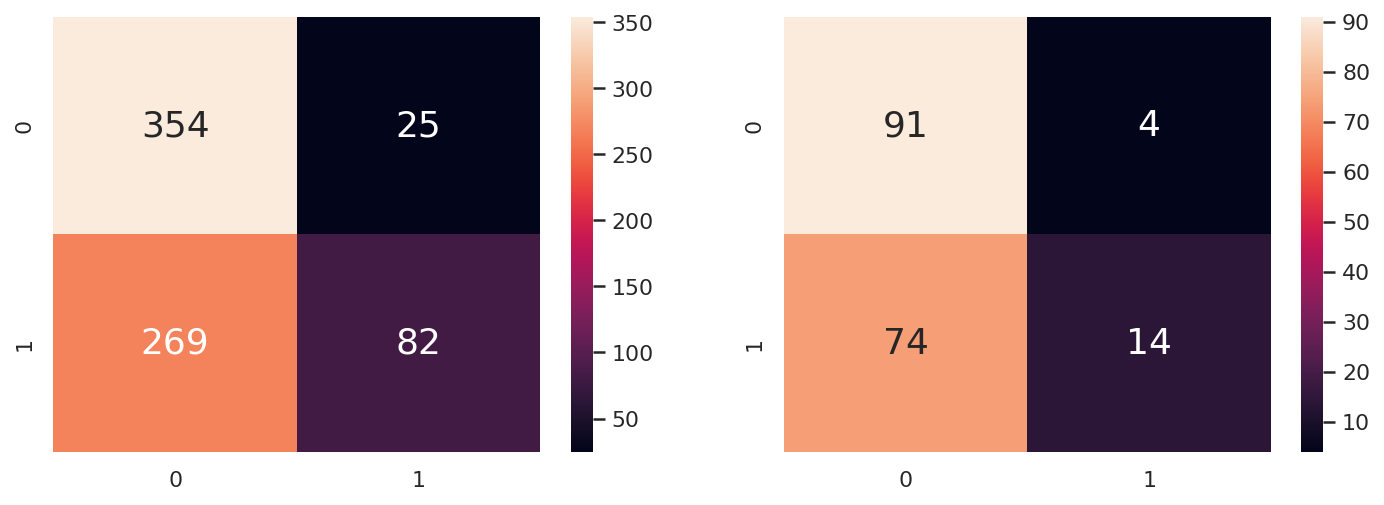

In [45]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
SP = pd.DataFrame(animedata[["Score", "Ranked", "Completed"]])   # Predictors
HS = pd.DataFrame(animedata['HasSequel'])    # Response

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SP, HS, test_size = 0.20, train_size = 0.80)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

cm = metrics.confusion_matrix(y_train, y_train_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTrain Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

cm = metrics.confusion_matrix(y_test, y_test_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTest Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

ACCURACY OF THE MODEL:  0.5355191256830601
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5628415300546448



Accuracy 	Train Dataset
True Positive Rate 	: 14.327485380116958
False Positive Rate 	: 14.948453608247423
Accuracy 	Test Dataset
True Positive Rate 	: 9.278350515463918
False Positive Rate 	: 10.465116279069768


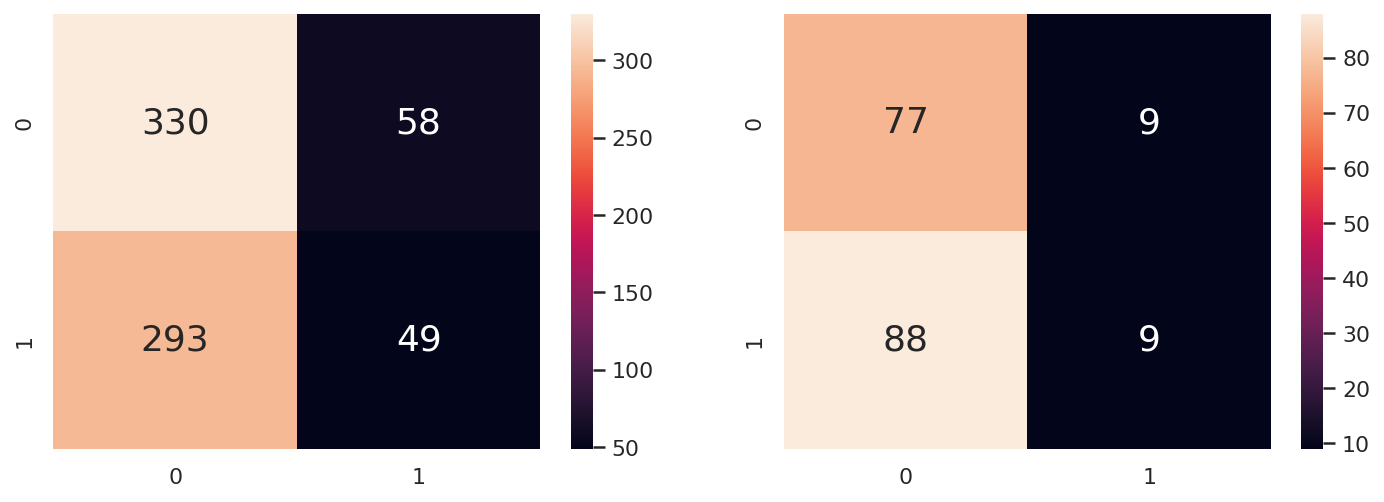

In [46]:
#Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
SP = pd.DataFrame(animedata[["Score", "Ranked", "Completed"]])   # Predictors
HS = pd.DataFrame(animedata['HasSequel'])    # Response

X_train, X_test, y_train, y_test = train_test_split(SP, HS, test_size = 0.20, train_size = 0.80)
# Check the sample sizes
#print("Train Set :", y_train.shape, X_train.shape)
#print("Test Set  :", y_test.shape, X_test.shape)

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train.values, y_train.values.ravel())

# performing predictions on the test dataset
y_pred = clf.predict(X_test.values)

# metrics are used to find accuracy or error
from sklearn import metrics
#print()

# using metrics module for accuracy calculation
x = metrics.accuracy_score(y_test, y_pred)

print("ACCURACY OF THE MODEL: ", x)

from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


cm = metrics.confusion_matrix(y_train, y_train_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTrain Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

cm = metrics.confusion_matrix(y_test, y_test_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTest Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

In [47]:
#predicting if NyanPire the Animation has a sequel
#clf.predict([[6.68, 5009.0, 24592, 86, 16455]])

In [48]:
#predicting if Aldnoah.zero has a sequel
#clf.predict([[7.44, 1755.0, 432548, 4050, 306310]])